<a href="https://colab.research.google.com/github/shawntharoo/GoogleColabProjects/blob/main/Copy_of_MBA509_Lesson_2_Predictive_Analytics_Automated_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook will build a Model that can predict whether a customer will default or not-default on their loan(s).

## The steps required to create predictive models:
* DataFrames: Data Pre-Processing
* Machine Learning DataFrames: One-hot-Encoding & Numerical Data Scaling 
* Search for best model using EvalML: decision trees, random forest etc...
* Model Understanding: features importances, SHAP values
* Identify best features for data model

* Dataset: Lending Club Loans
* Machine Learning: Automated with EvalML (Non-Neural Networks))




**Installation & Importation of Libraries**

In [ ]:
# !pip install "featuretools[complete]"
# !pip install composeml
!pip install utils
%pip install evalml
!pip install dask[complete] distributed --upgrade
%pip install -U tornado
!pip install woodwork
!pip install scikit-multilearn

     |████████████████████████████████| 6.4 MB 4.9 MB/s 
     |████████████████████████████████| 76.6 MB 1.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 11.2 MB 31.1 MB/s 
     |████████████████████████████████| 6.6 MB 38.3 MB/s 
     |████████████████████████████████| 564 kB 39.6 MB/s 
     |████████████████████████████████| 1.1 MB 40.2 MB/s 
     |████████████████████████████████| 1.6 MB 37.4 MB/s 
     |████████████████████████████████| 275 kB 46.2 MB/s 
     |████████████████████████████████| 100 kB 9.1 MB/s 
     |████████████████████████████████| 1.4 MB 38.0 MB/s 
     |████████████████████████████████| 2.0 MB 34.8 MB/s 
     |████████████████████████████████| 351 kB 36.4 MB/s 
     |████████████████████████████████| 9.8 MB 23.1 MB/s 
     |████████████████████████████████| 2.7 MB 41.2 MB/s 
     |████████████████████████████████| 195 kB 44.0 MB/s 
     |████████████████████████████████| 79.9 MB 129 kB/s 
     |█████████

     |████████████████████████████████| 428 kB 5.4 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.1 which is incompatible.


     |████████████████████████████████| 89 kB 3.9 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import utils
import os
os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"

In [ ]:
import pandas as pd
import numpy as np

### EvalML

In [ ]:
!pip install tornado==6.0.3 

     |████████████████████████████████| 482 kB 5.5 MB/s 
  Created wheel for tornado: filename=tornado-6.0.3-cp37-cp37m-linux_x86_64.whl size=424179 sha256=c72fb3be2633960a292dc22139089a1f89afe713b08f7d1004901c48884d5d1f
  Stored in directory: /root/.cache/pip/wheels/d0/31/2c/9406ed59f0dcdce0c453a8664124d738551590e74fc087f604
Successfully built tornado
  Attempting uninstall: tornado
    Found existing installation: tornado 6.1
    Uninstalling tornado-6.1:
      Successfully uninstalled tornado-6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.0.3 which is incompatible.


In [ ]:
# featuretools and compose-ML
# import composeml as cp
# import featuretools as ft
import woodwork as ww

import evalml
from evalml import AutoMLSearch
from evalml.utils import infer_feature_types
from evalml.preprocessing import split_data



from evalml import AutoMLSearch
from evalml.objectives import FraudCost
from evalml.objectives import CostBenefitMatrix


from evalml import AutoMLSearch
evalml.problem_types.problem_types.ProblemTypes.all_problem_types

/usr/local/lib/python3.7/dist-packages/woodwork/__init__.py:23: FutureWarning: Woodwork may not support Python 3.7 in next non-bugfix release.
  "Woodwork may not support Python 3.7 in next non-bugfix release.", FutureWarning
Featuretools may not support Python 3.7 in next non-bugfix release.


[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

### http://scikit.ml/

In [ ]:
from skmultilearn.model_selection import iterative_train_test_split

### Scikit-Learn: https://scikit-learn.org/stable/

In [ ]:
# basic machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score, r2_score

# model selection
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#  STEP 1  - DATA PREPROCESSING
* remove missing data
* remove highly correlated data
* transform time data
* remove data that do not vary
* remove some categorical features e.g. URLs

# Load Dataset - The Lending  Club Dataset


In [ ]:
df = pd.read_csv('https://s3.ap-northeast-1.wasabisys.com/pubdatasets/lending_club_loans.csv', low_memory=False)

### Lending club dataset DATAFRAME (df)

In [ ]:
df

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0        1077501    1296599       5000         5000           4975.0   
1        1077430    1314167       2500         2500           2500.0   
2        1077175    1313524       2400         2400           2400.0   
3        1076863    1277178      10000        10000          10000.0   
4        1075358    1311748       3000         3000           3000.0   
...          ...        ...        ...          ...              ...   
887374  36371250   39102635      10000        10000          10000.0   
887375  36441262   39152692      24000        24000          24000.0   
887376  36271333   38982739      13000        13000          13000.0   
887377  36490806   39222577      12000        12000          12000.0   
887378  36271262   38982659      20000        20000          20000.0   

              term  int_rate  installment grade sub_grade  ... total_bal_il  \
0        36 months     10.65       162.87     B        B2  ...          NaN   
1        60 months     15.27        59.83     C        C4  ...          NaN   
2        36 months     15.96        84.33     C        C5  ...          NaN   
3        36 months     13.49       339.31     C        C1  ...          NaN   
4        60 months     12.69        67.79     B        B5  ...          NaN   
...            ...       ...          ...   ...       ...  ...          ...   
887374   36 months     11.99       332.10     B        B5  ...          NaN   
887375   36 months     11.99       797.03     B        B5  ...          NaN   
887376   60 months     15.99       316.07     D        D2  ...          NaN   
887377   60 months     19.99       317.86     E        E3  ...          NaN   
887378   36 months     11.99       664.20     B        B5  ...          NaN   

       il_util open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim  \
0          NaN         NaN          NaN        NaN      NaN              NaN   
1          NaN         NaN          NaN        NaN      NaN              NaN   
2          NaN         NaN          NaN        NaN      NaN              NaN   
3          NaN         NaN          NaN        NaN      NaN              NaN   
4          NaN         NaN          NaN        NaN      NaN              NaN   
...        ...         ...          ...        ...      ...              ...   
887374     NaN         NaN          NaN        NaN      NaN          17100.0   
887375     NaN         NaN          NaN        NaN      NaN          10200.0   
887376     NaN         NaN          NaN        NaN      NaN          18000.0   
887377     NaN         NaN          NaN        NaN      NaN          27000.0   
887378     NaN         NaN          NaN        NaN      NaN          41700.0   

       inq_fi total_cu_tl inq_last_12m  
0         NaN         NaN          NaN  
1         NaN         NaN          NaN  
2         NaN         NaN          NaN  
3         NaN         NaN          NaN  
4         NaN         NaN          NaN  
...       ...         ...          ...  
887374    NaN         NaN          NaN  
887375    NaN         NaN          NaN  
887376    NaN         NaN          NaN  
887377    NaN         NaN          NaN  
887378    NaN         NaN          NaN  

[887379 rows x 74 columns]

In [ ]:
raw = df.columns

In [ ]:
raw

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

## Original columns of data

In [ ]:
len(raw)

74

# Check for missing data

In [ ]:
# function to find missing values
# inputs: dataframe df
# outputs: columns of data
def null_values(df):

        # calculate missing values
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # prints columns and the values
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # return columns of data
        return mis_val_table_ren_columns

In [ ]:
miss_values = null_values(df)
miss_values

Dataframe has 74 columns.
There are 40 columns that have missing values.


Missing Values  % of Total Values
dti_joint                            886870               99.9
annual_inc_joint                     886868               99.9
verification_status_joint            886868               99.9
il_util                              868762               97.9
mths_since_rcnt_il                   866569               97.7
total_cu_tl                          866007               97.6
inq_fi                               866007               97.6
all_util                             866007               97.6
max_bal_bc                           866007               97.6
open_rv_24m                          866007               97.6
open_rv_12m                          866007               97.6
total_bal_il                         866007               97.6
open_il_24m                          866007               97.6
open_il_12m                          866007               97.6
open_il_6m                           866007               97.6
open_acc_6m                          866007               97.6
inq_last_12m                         866007               97.6
desc                                 761351               85.8
mths_since_last_record               750326               84.6
mths_since_last_major_derog          665676               75.0
mths_since_last_delinq               454312               51.2
next_pymnt_d                         252971               28.5
total_rev_hi_lim                      70276                7.9
tot_coll_amt                          70276                7.9
tot_cur_bal                           70276                7.9
emp_title                             51462                5.8
emp_length                            44825                5.1
last_pymnt_d                          17659                2.0
revol_util                              502                0.1
title                                   152                0.0
collections_12_mths_ex_med              145                0.0
last_credit_pull_d                       53                0.0
open_acc                                 29                0.0
inq_last_6mths                           29                0.0
earliest_cr_line                         29                0.0
delinq_2yrs                              29                0.0
total_acc                                29                0.0
acc_now_delinq                           29                0.0
pub_rec                                  29                0.0
annual_inc                                4                0.0

In [ ]:
##Finding the the count and percentage of values that are missing in the dataframe.
df_null = pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100*df.isnull().sum()/len(df)})

##printing columns with null count more than 0
df_null[df_null['Count'] > 0] 

Count    Percent
emp_title                     51462   5.799326
emp_length                    44825   5.051393
annual_inc                        4   0.000451
desc                         761351  85.797726
title                           152   0.017129
delinq_2yrs                      29   0.003268
earliest_cr_line                 29   0.003268
inq_last_6mths                   29   0.003268
mths_since_last_delinq       454312  51.197065
mths_since_last_record       750326  84.555303
open_acc                         29   0.003268
pub_rec                          29   0.003268
revol_util                      502   0.056571
total_acc                        29   0.003268
last_pymnt_d                  17659   1.990018
next_pymnt_d                 252971  28.507661
last_credit_pull_d               53   0.005973
collections_12_mths_ex_med      145   0.016340
mths_since_last_major_derog  665676  75.015974
annual_inc_joint             886868  99.942415
dti_joint                    886870  99.942640
verification_status_joint    886868  99.942415
acc_now_delinq                   29   0.003268
tot_coll_amt                  70276   7.919502
tot_cur_bal                   70276   7.919502
open_acc_6m                  866007  97.591559
open_il_6m                   866007  97.591559
open_il_12m                  866007  97.591559
open_il_24m                  866007  97.591559
mths_since_rcnt_il           866569  97.654892
total_bal_il                 866007  97.591559
il_util                      868762  97.902024
open_rv_12m                  866007  97.591559
open_rv_24m                  866007  97.591559
max_bal_bc                   866007  97.591559
all_util                     866007  97.591559
total_rev_hi_lim              70276   7.919502
inq_fi                       866007  97.591559
total_cu_tl                  866007  97.591559
inq_last_12m                 866007  97.591559

# Remove  column  features  with greater than 85% misssing data

In [ ]:
thresh  = 0.85
df_thresh_85pct = df.dropna(axis=1, thresh=int(thresh *  len(df)))

In [ ]:
df_thresh_85pct

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0        1077501    1296599       5000         5000           4975.0   
1        1077430    1314167       2500         2500           2500.0   
2        1077175    1313524       2400         2400           2400.0   
3        1076863    1277178      10000        10000          10000.0   
4        1075358    1311748       3000         3000           3000.0   
...          ...        ...        ...          ...              ...   
887374  36371250   39102635      10000        10000          10000.0   
887375  36441262   39152692      24000        24000          24000.0   
887376  36271333   38982739      13000        13000          13000.0   
887377  36490806   39222577      12000        12000          12000.0   
887378  36271262   38982659      20000        20000          20000.0   

              term  int_rate  installment grade sub_grade  ... last_pymnt_d  \
0        36 months     10.65       162.87     B        B2  ...       Jan-15   
1        60 months     15.27        59.83     C        C4  ...       Apr-13   
2        36 months     15.96        84.33     C        C5  ...       Jun-14   
3        36 months     13.49       339.31     C        C1  ...       Jan-15   
4        60 months     12.69        67.79     B        B5  ...       Jan-16   
...            ...       ...          ...   ...       ...  ...          ...   
887374   36 months     11.99       332.10     B        B5  ...       Jan-16   
887375   36 months     11.99       797.03     B        B5  ...       Jan-16   
887376   60 months     15.99       316.07     D        D2  ...       Jan-16   
887377   60 months     19.99       317.86     E        E3  ...       Jan-16   
887378   36 months     11.99       664.20     B        B5  ...       Jan-16   

       last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  \
0               171.62             Jan-16                         0.0   
1               119.66             Sep-13                         0.0   
2               649.91             Jan-16                         0.0   
3               357.48             Jan-15                         0.0   
4                67.79             Jan-16                         0.0   
...                ...                ...                         ...   
887374          332.10             Jan-16                         0.0   
887375          797.03             Jan-16                         0.0   
887376          316.07             Jan-16                         0.0   
887377          317.86             Jan-16                         1.0   
887378          664.20             Jan-16                         0.0   

       policy_code application_type acc_now_delinq tot_coll_amt tot_cur_bal  \
0                1       INDIVIDUAL            0.0          NaN         NaN   
1                1       INDIVIDUAL            0.0          NaN         NaN   
2                1       INDIVIDUAL            0.0          NaN         NaN   
3                1       INDIVIDUAL            0.0          NaN         NaN   
4                1       INDIVIDUAL            0.0          NaN         NaN   
...            ...              ...            ...          ...         ...   
887374           1       INDIVIDUAL            0.0          0.0     25274.0   
887375           1       INDIVIDUAL            0.0          0.0    140285.0   
887376           1       INDIVIDUAL            0.0          0.0     34178.0   
887377           1       INDIVIDUAL            0.0          0.0     58418.0   
887378           1       INDIVIDUAL            0.0          0.0     33307.0   

       total_rev_hi_lim  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
...                 ...  
887374          17100.0  
887375          10200.0  
887376          18000.0  
887377          27000.0  
887378          41700.0  

[887379 rows x 52 columns]

## Updated dataframe

In [ ]:
df =  df_thresh_85pct.copy(deep=True)
df

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0        1077501    1296599       5000         5000           4975.0   
1        1077430    1314167       2500         2500           2500.0   
2        1077175    1313524       2400         2400           2400.0   
3        1076863    1277178      10000        10000          10000.0   
4        1075358    1311748       3000         3000           3000.0   
...          ...        ...        ...          ...              ...   
887374  36371250   39102635      10000        10000          10000.0   
887375  36441262   39152692      24000        24000          24000.0   
887376  36271333   38982739      13000        13000          13000.0   
887377  36490806   39222577      12000        12000          12000.0   
887378  36271262   38982659      20000        20000          20000.0   

              term  int_rate  installment grade sub_grade  ... last_pymnt_d  \
0        36 months     10.65       162.87     B        B2  ...       Jan-15   
1        60 months     15.27        59.83     C        C4  ...       Apr-13   
2        36 months     15.96        84.33     C        C5  ...       Jun-14   
3        36 months     13.49       339.31     C        C1  ...       Jan-15   
4        60 months     12.69        67.79     B        B5  ...       Jan-16   
...            ...       ...          ...   ...       ...  ...          ...   
887374   36 months     11.99       332.10     B        B5  ...       Jan-16   
887375   36 months     11.99       797.03     B        B5  ...       Jan-16   
887376   60 months     15.99       316.07     D        D2  ...       Jan-16   
887377   60 months     19.99       317.86     E        E3  ...       Jan-16   
887378   36 months     11.99       664.20     B        B5  ...       Jan-16   

       last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  \
0               171.62             Jan-16                         0.0   
1               119.66             Sep-13                         0.0   
2               649.91             Jan-16                         0.0   
3               357.48             Jan-15                         0.0   
4                67.79             Jan-16                         0.0   
...                ...                ...                         ...   
887374          332.10             Jan-16                         0.0   
887375          797.03             Jan-16                         0.0   
887376          316.07             Jan-16                         0.0   
887377          317.86             Jan-16                         1.0   
887378          664.20             Jan-16                         0.0   

       policy_code application_type acc_now_delinq tot_coll_amt tot_cur_bal  \
0                1       INDIVIDUAL            0.0          NaN         NaN   
1                1       INDIVIDUAL            0.0          NaN         NaN   
2                1       INDIVIDUAL            0.0          NaN         NaN   
3                1       INDIVIDUAL            0.0          NaN         NaN   
4                1       INDIVIDUAL            0.0          NaN         NaN   
...            ...              ...            ...          ...         ...   
887374           1       INDIVIDUAL            0.0          0.0     25274.0   
887375           1       INDIVIDUAL            0.0          0.0    140285.0   
887376           1       INDIVIDUAL            0.0          0.0     34178.0   
887377           1       INDIVIDUAL            0.0          0.0     58418.0   
887378           1       INDIVIDUAL            0.0          0.0     33307.0   

       total_rev_hi_lim  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
...                 ...  
887374          17100.0  
887375          10200.0  
887376          18000.0  
887377          27000.0  
887378          41700.0  

[887379 rows x 52 columns]

# More missing data thresholds

In [ ]:
df.shape

(887379, 52)

In [ ]:
raw_shape  = df.shape

In [ ]:
num_raw_rows = raw_shape[0]

In [ ]:
threshold_missing = 0.30

In [ ]:
temp = [i for i in df.count()  < num_raw_rows * threshold_missing]
df.drop(df.columns[temp],axis=1,inplace=True)

In [ ]:
df

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0        1077501    1296599       5000         5000           4975.0   
1        1077430    1314167       2500         2500           2500.0   
2        1077175    1313524       2400         2400           2400.0   
3        1076863    1277178      10000        10000          10000.0   
4        1075358    1311748       3000         3000           3000.0   
...          ...        ...        ...          ...              ...   
887374  36371250   39102635      10000        10000          10000.0   
887375  36441262   39152692      24000        24000          24000.0   
887376  36271333   38982739      13000        13000          13000.0   
887377  36490806   39222577      12000        12000          12000.0   
887378  36271262   38982659      20000        20000          20000.0   

              term  int_rate  installment grade sub_grade  ... last_pymnt_d  \
0        36 months     10.65       162.87     B        B2  ...       Jan-15   
1        60 months     15.27        59.83     C        C4  ...       Apr-13   
2        36 months     15.96        84.33     C        C5  ...       Jun-14   
3        36 months     13.49       339.31     C        C1  ...       Jan-15   
4        60 months     12.69        67.79     B        B5  ...       Jan-16   
...            ...       ...          ...   ...       ...  ...          ...   
887374   36 months     11.99       332.10     B        B5  ...       Jan-16   
887375   36 months     11.99       797.03     B        B5  ...       Jan-16   
887376   60 months     15.99       316.07     D        D2  ...       Jan-16   
887377   60 months     19.99       317.86     E        E3  ...       Jan-16   
887378   36 months     11.99       664.20     B        B5  ...       Jan-16   

       last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  \
0               171.62             Jan-16                         0.0   
1               119.66             Sep-13                         0.0   
2               649.91             Jan-16                         0.0   
3               357.48             Jan-15                         0.0   
4                67.79             Jan-16                         0.0   
...                ...                ...                         ...   
887374          332.10             Jan-16                         0.0   
887375          797.03             Jan-16                         0.0   
887376          316.07             Jan-16                         0.0   
887377          317.86             Jan-16                         1.0   
887378          664.20             Jan-16                         0.0   

       policy_code application_type acc_now_delinq tot_coll_amt tot_cur_bal  \
0                1       INDIVIDUAL            0.0          NaN         NaN   
1                1       INDIVIDUAL            0.0          NaN         NaN   
2                1       INDIVIDUAL            0.0          NaN         NaN   
3                1       INDIVIDUAL            0.0          NaN         NaN   
4                1       INDIVIDUAL            0.0          NaN         NaN   
...            ...              ...            ...          ...         ...   
887374           1       INDIVIDUAL            0.0          0.0     25274.0   
887375           1       INDIVIDUAL            0.0          0.0    140285.0   
887376           1       INDIVIDUAL            0.0          0.0     34178.0   
887377           1       INDIVIDUAL            0.0          0.0     58418.0   
887378           1       INDIVIDUAL            0.0          0.0     33307.0   

       total_rev_hi_lim  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
...                 ...  
887374          17100.0  
887375          10200.0  
887376          18000.0  
887377          27000.0  
887378          41700.0  

[887379 rows x 52 columns]

## Data: 52 columns after removing missing data 85%

In [ ]:
df.to_csv('lending_club_v2.csv', index=False)

In [ ]:
df  =  pd.read_csv('lending_club_v2.csv')

In [ ]:
df.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

# Any missing data?

In [ ]:
df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     51462
emp_length                    44825
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
purpose                           0
title                           152
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                    

## Loan status

In [ ]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

# If Default, then 1 (True), otherwise: 0 (False)   - create new TARGET column  (the outcome to predict)

In [ ]:
target_list = [1 if idx == 'Default' else 0 for idx in df['loan_status']]

df['TARGET'] = target_list
df['TARGET'].value_counts()

0    886160
1      1219
Name: TARGET, dtype: int64

In [ ]:
sns.set(rc = {'figure.figsize':(30,10)})

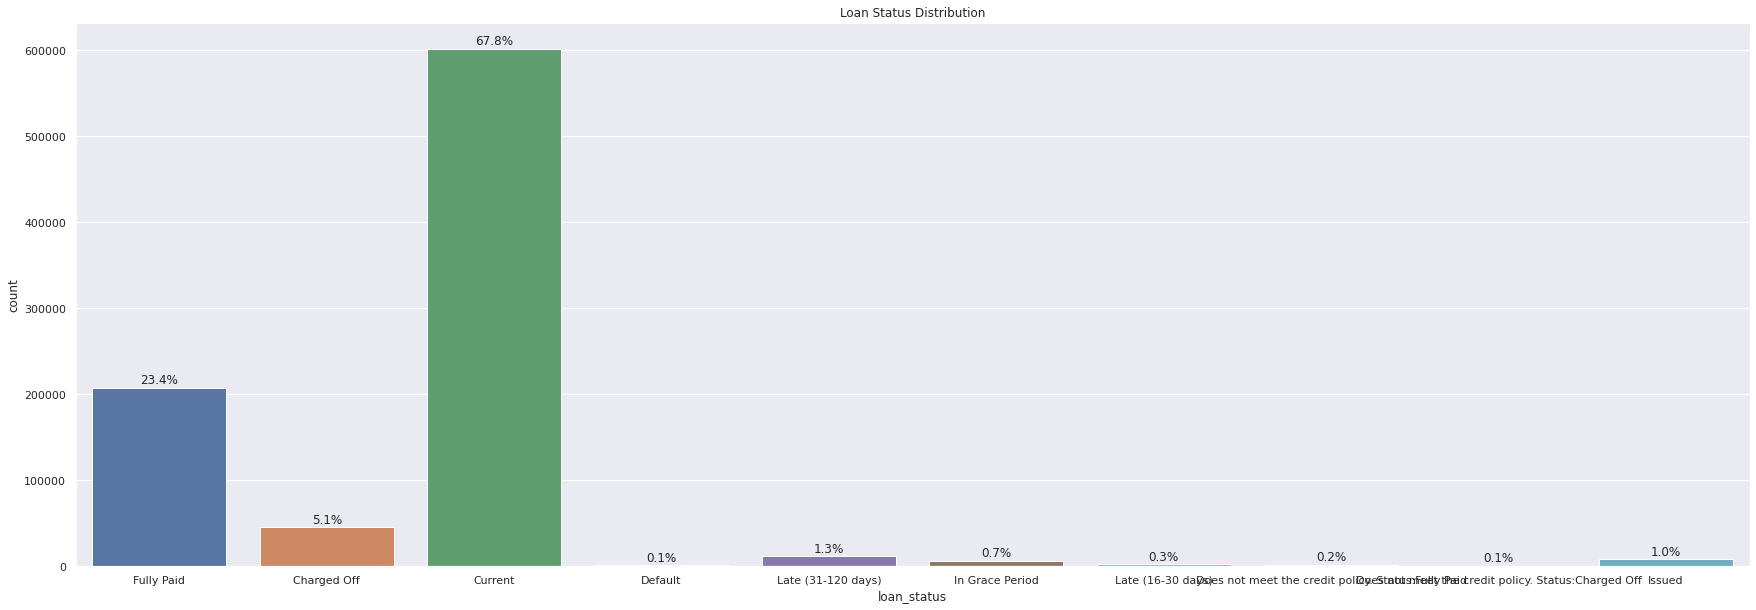

In [ ]:
ax = sns.countplot(data = df, x = 'loan_status')
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.title('Loan Status Distribution')
plt.show()

## can drop  loan_status since there is a TARGET column - this is the credit default to predict

In [ ]:
#df.drop('loan_status',axis=1,inplace=True)

In [ ]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'TARGET'],
      dtype='object')

Text(0.5, 1.0, 'Loan amount distribution')

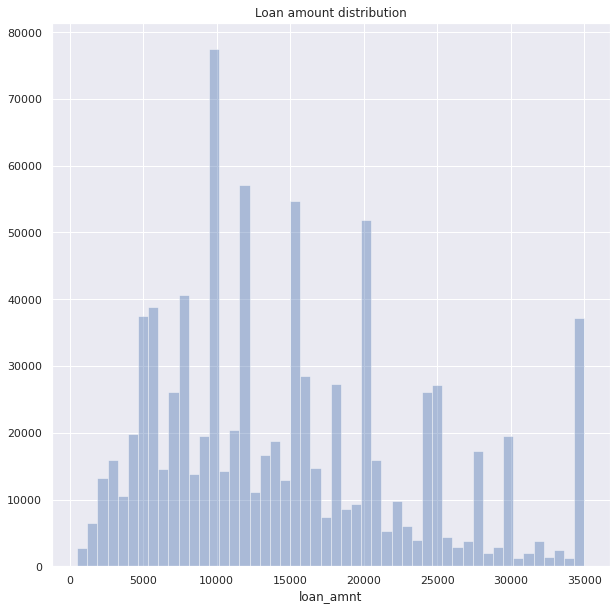

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(df.loan_amnt, kde=False, bins=50)
plt.title('Loan amount distribution')

# Correlation Analysis

Text(0.5, 1.0, 'Feature Correlation')

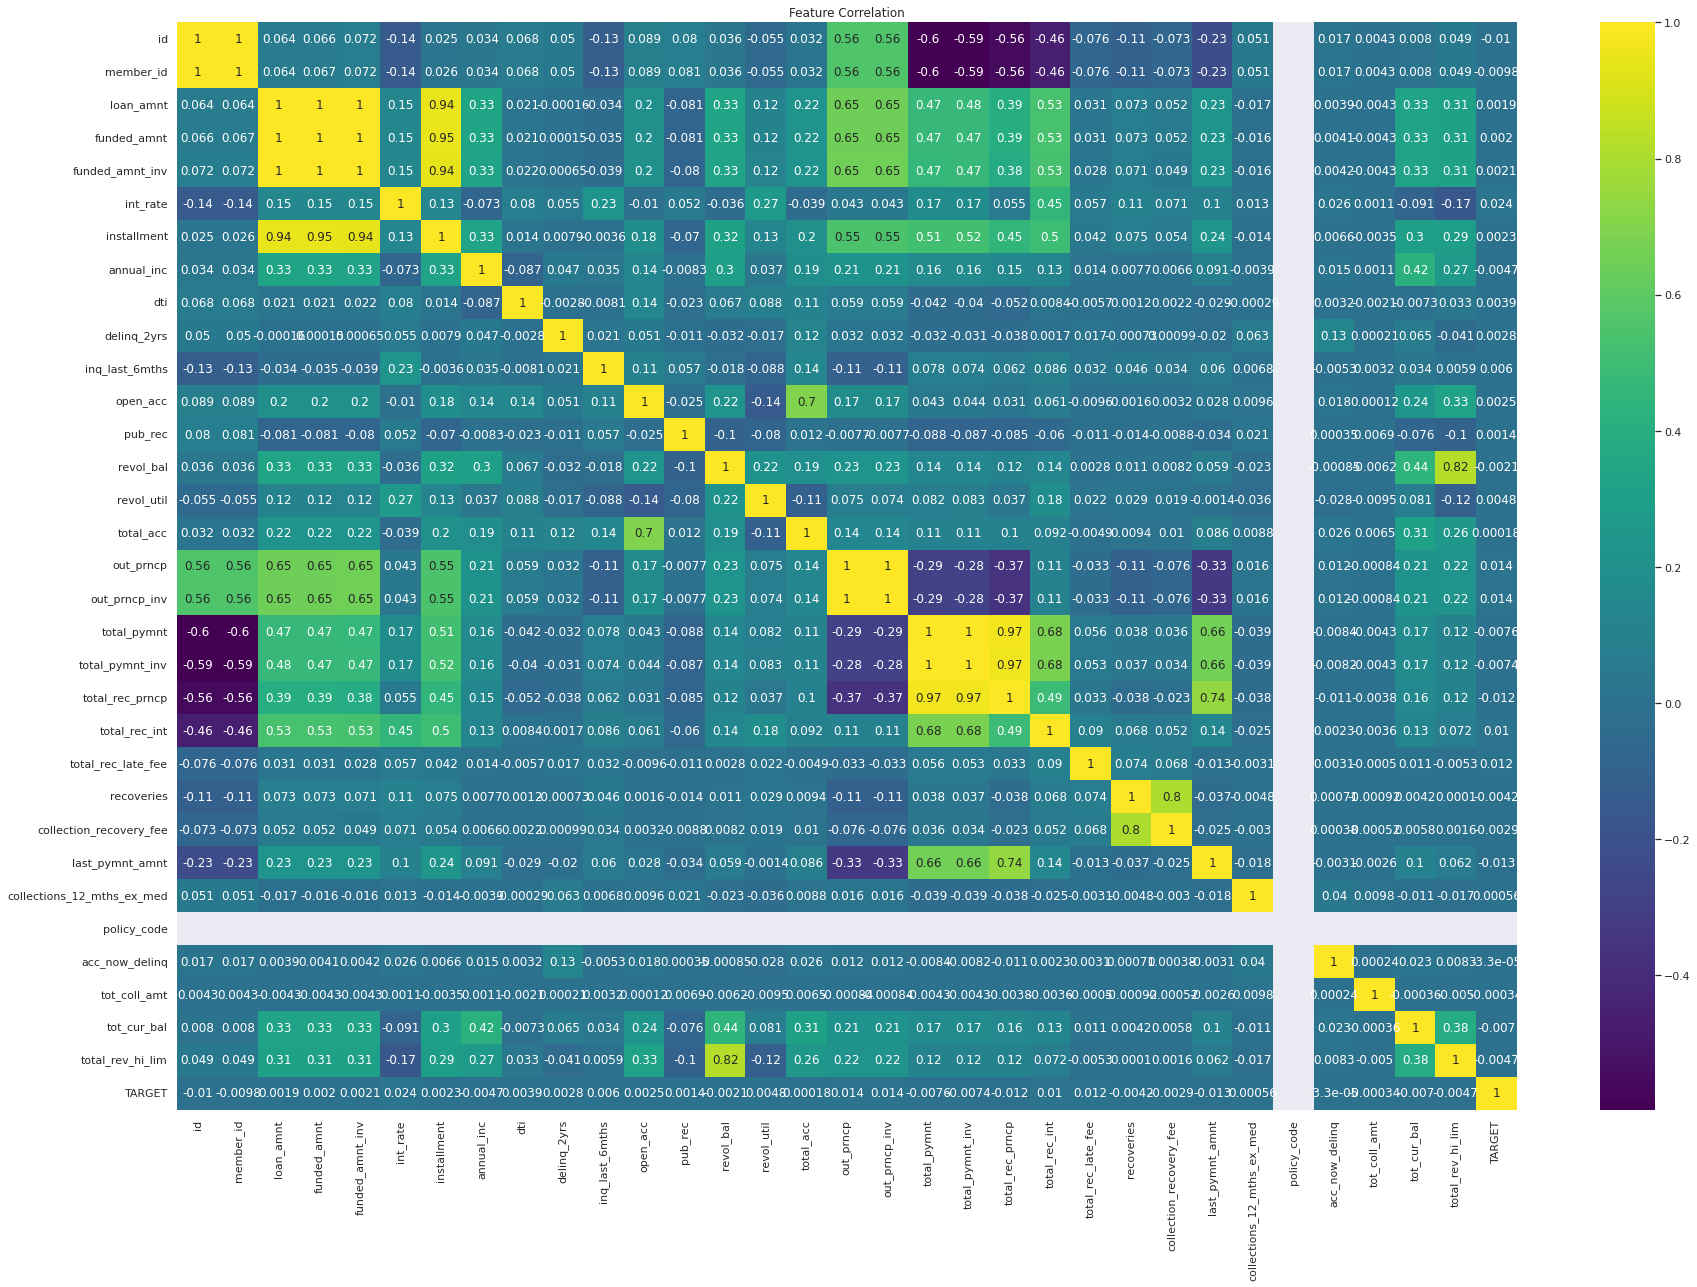

In [ ]:
plt.figure(figsize=(30,20))
df_corr = df.corr()
sns.heatmap(df_corr, annot=True, cmap='viridis')
plt.title('Feature Correlation')

# Strongly correlated features

In [ ]:
cor_matrix = df.corr().abs()
cor_matrix

id  member_id  loan_amnt  funded_amnt  \
id                          1.000000   0.999443   0.063803     0.066058   
member_id                   0.999443   1.000000   0.064461     0.066754   
loan_amnt                   0.063803   0.064461   1.000000     0.999263   
funded_amnt                 0.066058   0.066754   0.999263     1.000000   
funded_amnt_inv             0.071502   0.072308   0.997115     0.998025   
int_rate                    0.142963   0.142205   0.145023     0.145160   
installment                 0.025347   0.026036   0.944977     0.946005   
annual_inc                  0.033990   0.034146   0.332698     0.332466   
dti                         0.067781   0.067824   0.020675     0.021075   
delinq_2yrs                 0.049648   0.049904   0.000159     0.000151   
inq_last_6mths              0.126950   0.127257   0.034168     0.034711   
open_acc                    0.088720   0.088838   0.198906     0.199387   
pub_rec                     0.080126   0.080788   0.081177     0.080836   
revol_bal                   0.036457   0.036416   0.333580     0.333435   
revol_util                  0.055153   0.054873   0.119565     0.120061   
total_acc                   0.031519   0.031692   0.222639     0.222575   
out_prncp                   0.558686   0.559138   0.646897     0.648838   
out_prncp_inv               0.558651   0.559103   0.646898     0.648839   
total_pymnt                 0.597261   0.596768   0.474626     0.473286   
total_pymnt_inv             0.592687   0.592071   0.475655     0.474502   
total_rec_prncp             0.556328   0.556028   0.390473     0.389242   
total_rec_int               0.462019   0.461098   0.533916     0.532864   
total_rec_late_fee          0.076043   0.076388   0.031395     0.031075   
recoveries                  0.114386   0.114473   0.073150     0.072687   
collection_recovery_fee     0.072821   0.072818   0.052205     0.051955   
last_pymnt_amnt             0.228875   0.228369   0.229244     0.228772   
collections_12_mths_ex_med  0.051334   0.051445   0.016650     0.016491   
policy_code                      NaN        NaN        NaN          NaN   
acc_now_delinq              0.016855   0.016961   0.003947     0.004051   
tot_coll_amt                0.004260   0.004292   0.004275     0.004275   
tot_cur_bal                 0.007973   0.007997   0.328782     0.328781   
total_rev_hi_lim            0.048724   0.048660   0.312439     0.312439   
TARGET                      0.010041   0.009836   0.001928     0.001989   

                            funded_amnt_inv  int_rate  installment  \
id                                 0.071502  0.142963     0.025347   
member_id                          0.072308  0.142205     0.026036   
loan_amnt                          0.997115  0.145023     0.944977   
funded_amnt                        0.998025  0.145160     0.946005   
funded_amnt_inv                    1.000000  0.145205     0.943632   
int_rate                           0.145205  1.000000     0.133075   
installment                        0.943632  0.133075     1.000000   
annual_inc                         0.331420  0.072786     0.326182   
dti                                0.022185  0.079903     0.014333   
delinq_2yrs                        0.000648  0.055178     0.007876   
inq_last_6mths                     0.038880  0.227650     0.003623   
open_acc                           0.200004  0.010381     0.183868   
pub_rec                            0.079790  0.052156     0.069967   
revol_bal                          0.331736  0.035708     0.316588   
revol_util                         0.120759  0.269139     0.131798   
total_acc                          0.222793  0.038618     0.200409   
out_prncp                          0.651545  0.042671     0.548159   
out_prncp_inv                      0.651556  0.042529     0.548154   
total_pymnt                        0.468848  0.170506     0.514954   
total_pymnt_inv                    0.474062  0.171479     0.515817   
total_rec_prn

In [ ]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
upper_tri

id  member_id  loan_amnt  funded_amnt  \
id                         NaN   0.999443   0.063803     0.066058   
member_id                  NaN        NaN   0.064461     0.066754   
loan_amnt                  NaN        NaN        NaN     0.999263   
funded_amnt                NaN        NaN        NaN          NaN   
funded_amnt_inv            NaN        NaN        NaN          NaN   
int_rate                   NaN        NaN        NaN          NaN   
installment                NaN        NaN        NaN          NaN   
annual_inc                 NaN        NaN        NaN          NaN   
dti                        NaN        NaN        NaN          NaN   
delinq_2yrs                NaN        NaN        NaN          NaN   
inq_last_6mths             NaN        NaN        NaN          NaN   
open_acc                   NaN        NaN        NaN          NaN   
pub_rec                    NaN        NaN        NaN          NaN   
revol_bal                  NaN        NaN        NaN          NaN   
revol_util                 NaN        NaN        NaN          NaN   
total_acc                  NaN        NaN        NaN          NaN   
out_prncp                  NaN        NaN        NaN          NaN   
out_prncp_inv              NaN        NaN        NaN          NaN   
total_pymnt                NaN        NaN        NaN          NaN   
total_pymnt_inv            NaN        NaN        NaN          NaN   
total_rec_prncp            NaN        NaN        NaN          NaN   
total_rec_int              NaN        NaN        NaN          NaN   
total_rec_late_fee         NaN        NaN        NaN          NaN   
recoveries                 NaN        NaN        NaN          NaN   
collection_recovery_fee    NaN        NaN        NaN          NaN   
last_pymnt_amnt            NaN        NaN        NaN          NaN   
collections_12_mths_ex_med NaN        NaN        NaN          NaN   
policy_code                NaN        NaN        NaN          NaN   
acc_now_delinq             NaN        NaN        NaN          NaN   
tot_coll_amt               NaN        NaN        NaN          NaN   
tot_cur_bal                NaN        NaN        NaN          NaN   
total_rev_hi_lim           NaN        NaN        NaN          NaN   
TARGET                     NaN        NaN        NaN          NaN   

                            funded_amnt_inv  int_rate  installment  \
id                                 0.071502  0.142963     0.025347   
member_id                          0.072308  0.142205     0.026036   
loan_amnt                          0.997115  0.145023     0.944977   
funded_amnt                        0.998025  0.145160     0.946005   
funded_amnt_inv                         NaN  0.145205     0.943632   
int_rate                                NaN       NaN     0.133075   
installment                             NaN       NaN          NaN   
annual_inc                              NaN       NaN          NaN   
dti                                     NaN       NaN          NaN   
delinq_2yrs                             NaN       NaN          NaN   
inq_last_6mths                          NaN       NaN          NaN   
open_acc                                NaN       NaN          NaN   
pub_rec                                 NaN       NaN          NaN   
revol_bal                               NaN       NaN          NaN   
revol_util                              NaN       NaN          NaN   
total_acc                               NaN       NaN          NaN   
out_prncp                               NaN       NaN          NaN   
out_prncp_inv                           NaN       NaN          NaN   
total_pymnt                             NaN       NaN          NaN   
total_pymnt_inv                         NaN       NaN          NaN   
total_rec_prncp                         NaN       NaN          NaN   
total_rec_int                           NaN       NaN          NaN   
total_rec_late_fee                      NaN       NaN          NaN   
r

In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
to_drop

['member_id',
 'funded_amnt',
 'funded_amnt_inv',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp']

Text(0.5, 1.0, 'fundeded amount / loan_amnt corr')

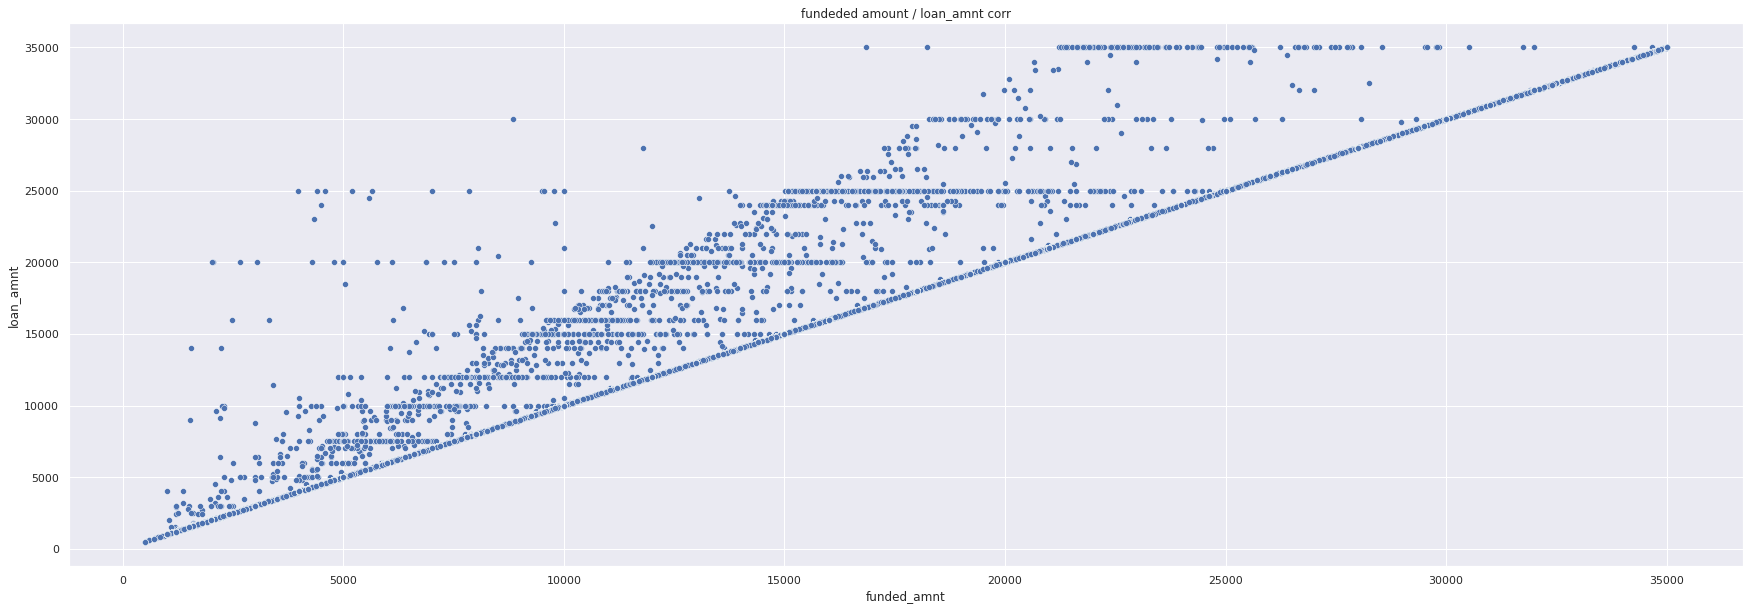

In [ ]:
sns.scatterplot(data = df, x = 'funded_amnt', y = 'loan_amnt')
plt.title('fundeded amount / loan_amnt corr')

Text(0.5, 1.0, 'out_prncp_inv / loan_amnt corr')

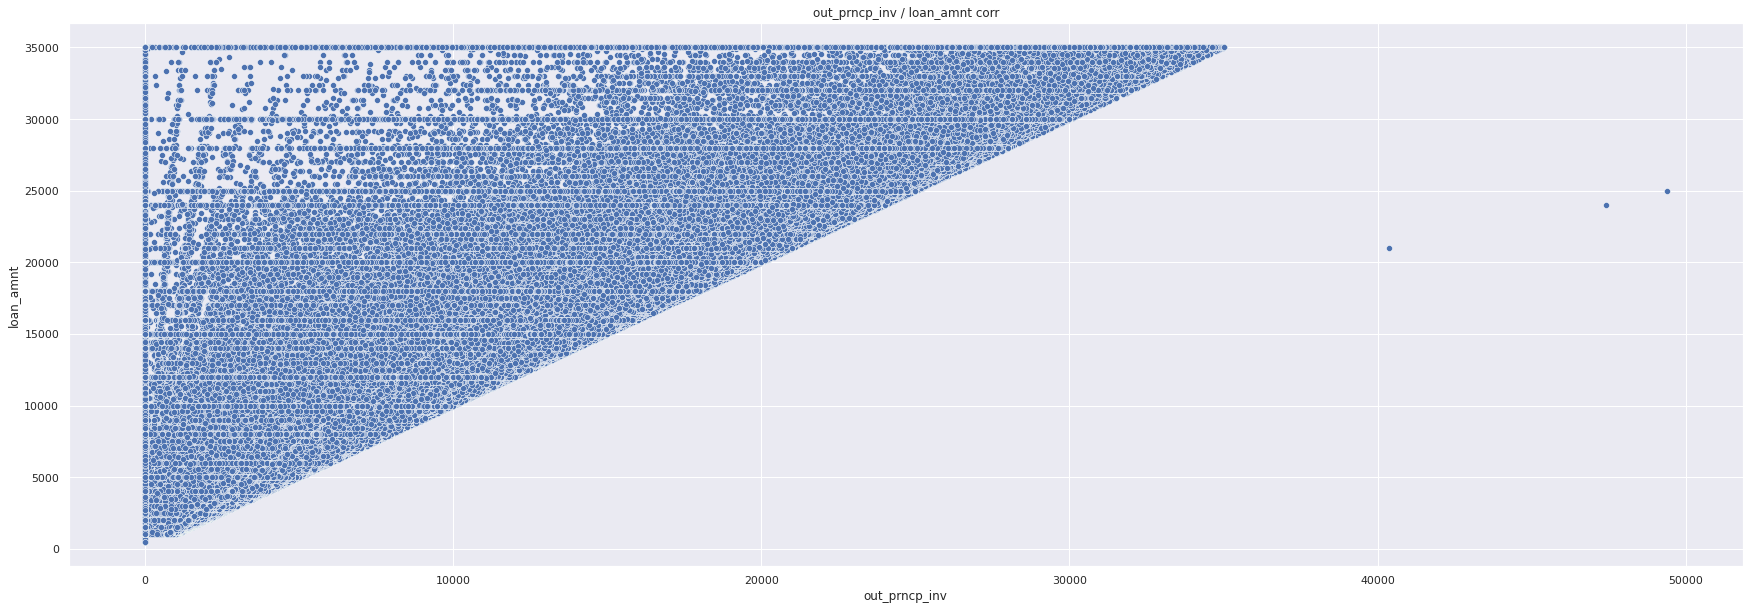

In [ ]:
sns.scatterplot(data = df, x = 'out_prncp_inv', y = 'loan_amnt')
plt.title('out_prncp_inv / loan_amnt corr')

## Keep or remove?

In [ ]:
to_drop

['member_id',
 'funded_amnt',
 'funded_amnt_inv',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp']

In [ ]:
drop_list = [
 'member_id',
 'funded_amnt_inv',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp']

In [ ]:
drop_list

['member_id',
 'funded_amnt_inv',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp']

In [ ]:
df_list = df.columns.to_list()

In [ ]:
differences =  set(df_list) - set(drop_list)
differences

{'TARGET',
 'acc_now_delinq',
 'addr_state',
 'annual_inc',
 'application_type',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'dti',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'funded_amnt',
 'grade',
 'home_ownership',
 'id',
 'initial_list_status',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'issue_d',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'loan_amnt',
 'loan_status',
 'open_acc',
 'out_prncp',
 'policy_code',
 'pub_rec',
 'purpose',
 'pymnt_plan',
 'recoveries',
 'revol_bal',
 'revol_util',
 'sub_grade',
 'term',
 'title',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_acc',
 'total_pymnt',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rev_hi_lim',
 'url',
 'verification_status',
 'zip_code'}

# update dataframe

In [ ]:
df  = df[differences]

In [ ]:
df

home_ownership last_pymnt_d  collection_recovery_fee  tot_coll_amt  \
0                RENT       Jan-15                     0.00           NaN   
1                RENT       Apr-13                     1.11           NaN   
2                RENT       Jun-14                     0.00           NaN   
3                RENT       Jan-15                     0.00           NaN   
4                RENT       Jan-16                     0.00           NaN   
...               ...          ...                      ...           ...   
887374           RENT       Jan-16                     0.00           0.0   
887375       MORTGAGE       Jan-16                     0.00           0.0   
887376           RENT       Jan-16                     0.00           0.0   
887377           RENT       Jan-16                     0.00           0.0   
887378           RENT       Jan-16                     0.00           0.0   

        inq_last_6mths     issue_d  revol_util  pub_rec  policy_code  \
0                  1.0  01-12-2011        83.7      0.0            1   
1                  5.0  01-12-2011         9.4      0.0            1   
2                  2.0  01-12-2011        98.5      0.0            1   
3                  1.0  01-12-2011        21.0      0.0            1   
4                  0.0  01-12-2011        53.9      0.0            1   
...                ...         ...         ...      ...          ...   
887374             0.0  01-01-2015        82.1      1.0            1   
887375             1.0  01-01-2015        84.5      0.0            1   
887376             0.0  01-01-2015        61.3      1.0            1   
887377             2.0  01-01-2015        30.6      0.0            1   
887378             1.0  01-01-2015        79.8      1.0            1   

       application_type  ... addr_state  funded_amnt  \
0            INDIVIDUAL  ...         AZ         5000   
1            INDIVIDUAL  ...         GA         2500   
2            INDIVIDUAL  ...         IL         2400   
3            INDIVIDUAL  ...         CA        10000   
4            INDIVIDUAL  ...         OR         3000   
...                 ...  ...        ...          ...   
887374       INDIVIDUAL  ...         CA        10000   
887375       INDIVIDUAL  ...         NJ        24000   
887376       INDIVIDUAL  ...         TN        13000   
887377       INDIVIDUAL  ...         MA        12000   
887378       INDIVIDUAL  ...         FL        20000   

                              emp_title acc_now_delinq  emp_length  \
0                                   NaN            0.0   10+ years   
1                                 Ryder            0.0    < 1 year   
2                                   NaN            0.0   10+ years   
3                   AIR RESOURCES BOARD            0.0   10+ years   
4              University Medical Group            0.0      1 year   
...                                 ...            ...         ...   
887374                 Office Assistant            0.0     8 years   
887375          Director of Maintenance            0.0   10+ years   
887376         Radiologist Technologist            0.0     5 years   
887377                          Painter            0.0      1 year   
887378  Manager Hotel Operations Oasis             0.0   10+ years   

       total_rev_hi_lim  last_pymnt_amnt verification_status  \
0                   NaN           171.62            Verified   
1                   NaN           119.66     Source Verified   
2                   NaN           649.91        Not Verified   
3                   NaN           357.48     Source Verified   
4                   NaN            67.79     Source Verified   
...                 ...              ...                 ...   
887374          17100.0           332.10            Verified   
887375          10200.0           797.03            Verified   
887376          18000.0           316.07            Verified   
887377          27000.0           317.86     Source Verified   

In [ ]:
df.drop(['url', 'emp_title'], axis=1, inplace=True)

In [ ]:
df

home_ownership last_pymnt_d  collection_recovery_fee  tot_coll_amt  \
0                RENT       Jan-15                     0.00           NaN   
1                RENT       Apr-13                     1.11           NaN   
2                RENT       Jun-14                     0.00           NaN   
3                RENT       Jan-15                     0.00           NaN   
4                RENT       Jan-16                     0.00           NaN   
...               ...          ...                      ...           ...   
887374           RENT       Jan-16                     0.00           0.0   
887375       MORTGAGE       Jan-16                     0.00           0.0   
887376           RENT       Jan-16                     0.00           0.0   
887377           RENT       Jan-16                     0.00           0.0   
887378           RENT       Jan-16                     0.00           0.0   

        inq_last_6mths     issue_d  revol_util  pub_rec  policy_code  \
0                  1.0  01-12-2011        83.7      0.0            1   
1                  5.0  01-12-2011         9.4      0.0            1   
2                  2.0  01-12-2011        98.5      0.0            1   
3                  1.0  01-12-2011        21.0      0.0            1   
4                  0.0  01-12-2011        53.9      0.0            1   
...                ...         ...         ...      ...          ...   
887374             0.0  01-01-2015        82.1      1.0            1   
887375             1.0  01-01-2015        84.5      0.0            1   
887376             0.0  01-01-2015        61.3      1.0            1   
887377             2.0  01-01-2015        30.6      0.0            1   
887378             1.0  01-01-2015        79.8      1.0            1   

       application_type  ...        id  addr_state funded_amnt acc_now_delinq  \
0            INDIVIDUAL  ...   1077501          AZ        5000            0.0   
1            INDIVIDUAL  ...   1077430          GA        2500            0.0   
2            INDIVIDUAL  ...   1077175          IL        2400            0.0   
3            INDIVIDUAL  ...   1076863          CA       10000            0.0   
4            INDIVIDUAL  ...   1075358          OR        3000            0.0   
...                 ...  ...       ...         ...         ...            ...   
887374       INDIVIDUAL  ...  36371250          CA       10000            0.0   
887375       INDIVIDUAL  ...  36441262          NJ       24000            0.0   
887376       INDIVIDUAL  ...  36271333          TN       13000            0.0   
887377       INDIVIDUAL  ...  36490806          MA       12000            0.0   
887378       INDIVIDUAL  ...  36271262          FL       20000            0.0   

        emp_length  total_rev_hi_lim last_pymnt_amnt verification_status  \
0        10+ years               NaN          171.62            Verified   
1         < 1 year               NaN          119.66     Source Verified   
2        10+ years               NaN          649.91        Not Verified   
3        10+ years               NaN          357.48     Source Verified   
4           1 year               NaN           67.79     Source Verified   
...            ...               ...             ...                 ...   
887374     8 years           17100.0          332.10            Verified   
887375   10+ years           10200.0          797.03            Verified   
887376     5 years           18000.0          316.07            Verified   
887377      1 year           27000.0          317.86     Source Verified   
887378   10+ years           41700.0          664.20            Verified   

        total_rec_late_fee  recoveries  
0                     0.00        0.00  
1                     0.00      117.08  
2                     0.00        0.00  
3                    16.97        0.00  
4                     0.00        0.00  
...                    ...         ...  
887374                0.00        0.00  
887

In [ ]:
df.columns

Index(['home_ownership', 'last_pymnt_d', 'collection_recovery_fee',
       'tot_coll_amt', 'inq_last_6mths', 'issue_d', 'revol_util', 'pub_rec',
       'policy_code', 'application_type', 'pymnt_plan', 'loan_amnt',
       'earliest_cr_line', 'loan_status', 'open_acc',
       'collections_12_mths_ex_med', 'purpose', 'grade', 'out_prncp',
       'int_rate', 'total_pymnt', 'annual_inc', 'initial_list_status',
       'sub_grade', 'TARGET', 'tot_cur_bal', 'installment', 'total_acc',
       'title', 'delinq_2yrs', 'revol_bal', 'total_rec_int', 'term', 'dti',
       'last_credit_pull_d', 'zip_code', 'id', 'addr_state', 'funded_amnt',
       'acc_now_delinq', 'emp_length', 'total_rev_hi_lim', 'last_pymnt_amnt',
       'verification_status', 'total_rec_late_fee', 'recoveries'],
      dtype='object')

# Re-order columns

In [ ]:
df  = df[['id',
 'TARGET',
 'loan_status',
 'loan_amnt', 
 'funded_amnt', 
 'installment', 
 'total_acc', 
 'open_acc',
 'purpose', 
 'last_credit_pull_d', 
 'term',
 'total_rev_hi_lim', 
 'zip_code', 
 'sub_grade', 
 'grade',
 'earliest_cr_line', 
 'initial_list_status', 
 'emp_length', 
 'title',
 'policy_code', 
 'addr_state', 
 'tot_coll_amt', 
 'revol_util', 
 'annual_inc', 
 'inq_last_6mths',
 'recoveries',
 'out_prncp', 
 'int_rate', 
 'revol_bal',
 'collection_recovery_fee', 
 'total_rec_int', 
 'application_type',
 'last_pymnt_amnt', 
 'verification_status',
 'dti', 
 'issue_d', 
 'acc_now_delinq', 
 'home_ownership', 
 'last_pymnt_d',
 'pymnt_plan', 
 'tot_cur_bal', 
 'pub_rec', 
 'total_pymnt',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'total_rec_late_fee']]

In [ ]:
df

id  TARGET  loan_status  loan_amnt  funded_amnt  installment  \
0        1077501       0   Fully Paid       5000         5000       162.87   
1        1077430       0  Charged Off       2500         2500        59.83   
2        1077175       0   Fully Paid       2400         2400        84.33   
3        1076863       0   Fully Paid      10000        10000       339.31   
4        1075358       0      Current       3000         3000        67.79   
...          ...     ...          ...        ...          ...          ...   
887374  36371250       0      Current      10000        10000       332.10   
887375  36441262       0      Current      24000        24000       797.03   
887376  36271333       0      Current      13000        13000       316.07   
887377  36490806       0      Current      12000        12000       317.86   
887378  36271262       0      Current      20000        20000       664.20   

        total_acc  open_acc             purpose last_credit_pull_d  ...  \
0             9.0       3.0         credit_card             Jan-16  ...   
1             4.0       3.0                 car             Sep-13  ...   
2            10.0       2.0      small_business             Jan-16  ...   
3            37.0      10.0               other             Jan-15  ...   
4            38.0      15.0               other             Jan-16  ...   
...           ...       ...                 ...                ...  ...   
887374       15.0       9.0  debt_consolidation             Jan-16  ...   
887375       23.0       5.0    home_improvement             Jan-16  ...   
887376       22.0       9.0  debt_consolidation             Jan-16  ...   
887377       20.0      17.0  debt_consolidation             Jan-16  ...   
887378       10.0       8.0         credit_card             Jan-16  ...   

       acc_now_delinq  home_ownership last_pymnt_d pymnt_plan tot_cur_bal  \
0                 0.0            RENT       Jan-15          n         NaN   
1                 0.0            RENT       Apr-13          n         NaN   
2                 0.0            RENT       Jun-14          n         NaN   
3                 0.0            RENT       Jan-15          n         NaN   
4                 0.0            RENT       Jan-16          n         NaN   
...               ...             ...          ...        ...         ...   
887374            0.0            RENT       Jan-16          n     25274.0   
887375            0.0        MORTGAGE       Jan-16          n    140285.0   
887376            0.0            RENT       Jan-16          n     34178.0   
887377            0.0            RENT       Jan-16          n     58418.0   
887378            0.0            RENT       Jan-16          n     33307.0   

       pub_rec   total_pymnt collections_12_mths_ex_med delinq_2yrs  \
0          0.0   5861.071414                        0.0         0.0   
1          0.0   1008.710000                        0.0         0.0   
2          0.0   3003.653644                        0.0         0.0   
3          0.0  12226.302210                        0.0         0.0   
4          0.0   3242.170000                        0.0         0.0   
...        ...           ...                        ...         ...   
887374     1.0   3971.880000                        0.0         0.0   
887375     0.0   9532.390000                        0.0         0.0   
887376     1.0   3769.740000                        0.0         0.0   
887377     0.0   3787.670000                        1.0         1.0   
887378     1.0   7943.760000                        0.0         0.0   

        total_rec_late_fee  
0                     0.00  
1                     0.00  
2                     0.00  
3                    16.97  
4                     0.00  
...                    ...  
887374                0.00  
887375                0.00  
887376                0.00  
887377                0.00  
887378                0.00  

[887379 rows x 46 columns]

# Save updated dataframe: 46 columns

In [ ]:
df.to_csv('lending_club_v3.csv', index=False)

In [ ]:
df  = pd.read_csv('lending_club_v3.csv')

In [ ]:
df

id  TARGET  loan_status  loan_amnt  funded_amnt  installment  \
0        1077501       0   Fully Paid       5000         5000       162.87   
1        1077430       0  Charged Off       2500         2500        59.83   
2        1077175       0   Fully Paid       2400         2400        84.33   
3        1076863       0   Fully Paid      10000        10000       339.31   
4        1075358       0      Current       3000         3000        67.79   
...          ...     ...          ...        ...          ...          ...   
887374  36371250       0      Current      10000        10000       332.10   
887375  36441262       0      Current      24000        24000       797.03   
887376  36271333       0      Current      13000        13000       316.07   
887377  36490806       0      Current      12000        12000       317.86   
887378  36271262       0      Current      20000        20000       664.20   

        total_acc  open_acc             purpose last_credit_pull_d  ...  \
0             9.0       3.0         credit_card             Jan-16  ...   
1             4.0       3.0                 car             Sep-13  ...   
2            10.0       2.0      small_business             Jan-16  ...   
3            37.0      10.0               other             Jan-15  ...   
4            38.0      15.0               other             Jan-16  ...   
...           ...       ...                 ...                ...  ...   
887374       15.0       9.0  debt_consolidation             Jan-16  ...   
887375       23.0       5.0    home_improvement             Jan-16  ...   
887376       22.0       9.0  debt_consolidation             Jan-16  ...   
887377       20.0      17.0  debt_consolidation             Jan-16  ...   
887378       10.0       8.0         credit_card             Jan-16  ...   

       acc_now_delinq  home_ownership last_pymnt_d pymnt_plan tot_cur_bal  \
0                 0.0            RENT       Jan-15          n         NaN   
1                 0.0            RENT       Apr-13          n         NaN   
2                 0.0            RENT       Jun-14          n         NaN   
3                 0.0            RENT       Jan-15          n         NaN   
4                 0.0            RENT       Jan-16          n         NaN   
...               ...             ...          ...        ...         ...   
887374            0.0            RENT       Jan-16          n     25274.0   
887375            0.0        MORTGAGE       Jan-16          n    140285.0   
887376            0.0            RENT       Jan-16          n     34178.0   
887377            0.0            RENT       Jan-16          n     58418.0   
887378            0.0            RENT       Jan-16          n     33307.0   

       pub_rec   total_pymnt collections_12_mths_ex_med delinq_2yrs  \
0          0.0   5861.071414                        0.0         0.0   
1          0.0   1008.710000                        0.0         0.0   
2          0.0   3003.653644                        0.0         0.0   
3          0.0  12226.302210                        0.0         0.0   
4          0.0   3242.170000                        0.0         0.0   
...        ...           ...                        ...         ...   
887374     1.0   3971.880000                        0.0         0.0   
887375     0.0   9532.390000                        0.0         0.0   
887376     1.0   3769.740000                        0.0         0.0   
887377     0.0   3787.670000                        1.0         1.0   
887378     1.0   7943.760000                        0.0         0.0   

        total_rec_late_fee  
0                     0.00  
1                     0.00  
2                     0.00  
3                    16.97  
4                     0.00  
...                    ...  
887374                0.00  
887375                0.00  
887376                0.00  
887377                0.00  
887378                0.00  

[887379 rows x 46 columns]

In [ ]:
df['emp_title'].value_counts().head()

KeyError: ignored

**Woodwork is used here to examine the datatypes**

*  https://woodwork.alteryx.com/en/stable/


In [ ]:
df.ww.init(name="lending_club_loans")

In [ ]:
df.ww

In [ ]:
plt.figure(figsize=(10, 7))
sns.distplot(df.loan_amnt, kde=False, bins=50)
plt.title('Loan amount distribution')

In [ ]:
plt.figure(figsize=(20,20))
df_corr = df.corr()
sns.heatmap(df_corr, annot=True, cmap='viridis')
plt.title('Feature Correlation')

In [ ]:
sns.scatterplot(data = df, x = 'installment', y = 'loan_amnt')
plt.title('installment / loan_amnt corr')

In [ ]:
df.columns

Index(['id', 'TARGET', 'loan_status', 'loan_amnt', 'funded_amnt',
       'installment', 'total_acc', 'open_acc', 'purpose', 'last_credit_pull_d',
       'term', 'total_rev_hi_lim', 'zip_code', 'sub_grade', 'grade',
       'earliest_cr_line', 'initial_list_status', 'emp_length', 'title',
       'policy_code', 'addr_state', 'tot_coll_amt', 'revol_util', 'annual_inc',
       'inq_last_6mths', 'recoveries', 'out_prncp', 'int_rate', 'revol_bal',
       'collection_recovery_fee', 'total_rec_int', 'application_type',
       'last_pymnt_amnt', 'verification_status', 'dti', 'issue_d',
       'acc_now_delinq', 'home_ownership', 'last_pymnt_d', 'pymnt_plan',
       'tot_cur_bal', 'pub_rec', 'total_pymnt', 'collections_12_mths_ex_med',
       'delinq_2yrs', 'total_rec_late_fee'],
      dtype='object')

In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
to_drop

['member_id',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp',
 'collection_recovery_fee',
 'total_rev_hi_lim']

In [ ]:
drop_list  = ['member_id',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp',
 'collection_recovery_fee',
 'total_rev_hi_lim']

In [ ]:
df = df[set(df.columns) - set(drop_list)]

In [ ]:
df

home_ownership  tot_coll_amt last_pymnt_d  inq_last_6mths  revol_util  \
0                RENT           NaN       Jan-15             1.0        83.7   
1                RENT           NaN       Apr-13             5.0         9.4   
2                RENT           NaN       Jun-14             2.0        98.5   
3                RENT           NaN       Jan-15             1.0        21.0   
4                RENT           NaN       Jan-16             0.0        53.9   
...               ...           ...          ...             ...         ...   
887374           RENT           0.0       Jan-16             0.0        82.1   
887375       MORTGAGE           0.0       Jan-16             1.0        84.5   
887376           RENT           0.0       Jan-16             0.0        61.3   
887377           RENT           0.0       Jan-16             2.0        30.6   
887378           RENT           0.0       Jan-16             1.0        79.8   

           issue_d  pub_rec  policy_code application_type pymnt_plan  ...  \
0       01-12-2011      0.0            1       INDIVIDUAL          n  ...   
1       01-12-2011      0.0            1       INDIVIDUAL          n  ...   
2       01-12-2011      0.0            1       INDIVIDUAL          n  ...   
3       01-12-2011      0.0            1       INDIVIDUAL          n  ...   
4       01-12-2011      0.0            1       INDIVIDUAL          n  ...   
...            ...      ...          ...              ...        ...  ...   
887374  01-01-2015      1.0            1       INDIVIDUAL          n  ...   
887375  01-01-2015      0.0            1       INDIVIDUAL          n  ...   
887376  01-01-2015      1.0            1       INDIVIDUAL          n  ...   
887377  01-01-2015      0.0            1       INDIVIDUAL          n  ...   
887378  01-01-2015      1.0            1       INDIVIDUAL          n  ...   

        last_credit_pull_d zip_code        id  addr_state  acc_now_delinq  \
0                   Jan-16    860xx   1077501          AZ             0.0   
1                   Sep-13    309xx   1077430          GA             0.0   
2                   Jan-16    606xx   1077175          IL             0.0   
3                   Jan-15    917xx   1076863          CA             0.0   
4                   Jan-16    972xx   1075358          OR             0.0   
...                    ...      ...       ...         ...             ...   
887374              Jan-16    905xx  36371250          CA             0.0   
887375              Jan-16    072xx  36441262          NJ             0.0   
887376              Jan-16    378xx  36271333          TN             0.0   
887377              Jan-16    010xx  36490806          MA             0.0   
887378              Jan-16    331xx  36271262          FL             0.0   

       emp_length last_pymnt_amnt  verification_status  total_rec_late_fee  \
0       10+ years          171.62             Verified                0.00   
1        < 1 year          119.66      Source Verified                0.00   
2       10+ years          649.91         Not Verified                0.00   
3       10+ years          357.48      Source Verified               16.97   
4          1 year           67.79      Source Verified                0.00   
...           ...             ...                  ...                 ...   
887374    8 years          332.10             Verified                0.00   
887375  10+ years          797.03             Verified                0.00   
887376    5 years          316.07             Verified                0.00   
887377     1 year          317.86      Source Verified                0.00   
887378  10+ years          664.20             Verified                0.00   

        recoveries  
0             0.00  
1           117.08  
2             0.00  
3             0.00  
4             0.00  
...            ...  
887374        0.00  
887375        0.00  
887376        0.00  
887377        0.00  
887378        0.00  

[88737

# Update dataframe

In [ ]:
df.to_csv('lending_club_v4.csv', index=False)

In [ ]:
df = pd.read_csv('lending_club_v4.csv')

In [ ]:
df

home_ownership  tot_coll_amt last_pymnt_d  inq_last_6mths  revol_util  \
0                RENT           NaN       Jan-15             1.0        83.7   
1                RENT           NaN       Apr-13             5.0         9.4   
2                RENT           NaN       Jun-14             2.0        98.5   
3                RENT           NaN       Jan-15             1.0        21.0   
4                RENT           NaN       Jan-16             0.0        53.9   
...               ...           ...          ...             ...         ...   
887374           RENT           0.0       Jan-16             0.0        82.1   
887375       MORTGAGE           0.0       Jan-16             1.0        84.5   
887376           RENT           0.0       Jan-16             0.0        61.3   
887377           RENT           0.0       Jan-16             2.0        30.6   
887378           RENT           0.0       Jan-16             1.0        79.8   

           issue_d  pub_rec  policy_code application_type pymnt_plan  ...  \
0       01-12-2011      0.0            1       INDIVIDUAL          n  ...   
1       01-12-2011      0.0            1       INDIVIDUAL          n  ...   
2       01-12-2011      0.0            1       INDIVIDUAL          n  ...   
3       01-12-2011      0.0            1       INDIVIDUAL          n  ...   
4       01-12-2011      0.0            1       INDIVIDUAL          n  ...   
...            ...      ...          ...              ...        ...  ...   
887374  01-01-2015      1.0            1       INDIVIDUAL          n  ...   
887375  01-01-2015      0.0            1       INDIVIDUAL          n  ...   
887376  01-01-2015      1.0            1       INDIVIDUAL          n  ...   
887377  01-01-2015      0.0            1       INDIVIDUAL          n  ...   
887378  01-01-2015      1.0            1       INDIVIDUAL          n  ...   

        last_credit_pull_d zip_code        id  addr_state  acc_now_delinq  \
0                   Jan-16    860xx   1077501          AZ             0.0   
1                   Sep-13    309xx   1077430          GA             0.0   
2                   Jan-16    606xx   1077175          IL             0.0   
3                   Jan-15    917xx   1076863          CA             0.0   
4                   Jan-16    972xx   1075358          OR             0.0   
...                    ...      ...       ...         ...             ...   
887374              Jan-16    905xx  36371250          CA             0.0   
887375              Jan-16    072xx  36441262          NJ             0.0   
887376              Jan-16    378xx  36271333          TN             0.0   
887377              Jan-16    010xx  36490806          MA             0.0   
887378              Jan-16    331xx  36271262          FL             0.0   

       emp_length last_pymnt_amnt  verification_status  total_rec_late_fee  \
0       10+ years          171.62             Verified                0.00   
1        < 1 year          119.66      Source Verified                0.00   
2       10+ years          649.91         Not Verified                0.00   
3       10+ years          357.48      Source Verified               16.97   
4          1 year           67.79      Source Verified                0.00   
...           ...             ...                  ...                 ...   
887374    8 years          332.10             Verified                0.00   
887375  10+ years          797.03             Verified                0.00   
887376    5 years          316.07             Verified                0.00   
887377     1 year          317.86      Source Verified                0.00   
887378  10+ years          664.20             Verified                0.00   

        recoveries  
0             0.00  
1           117.08  
2             0.00  
3             0.00  
4             0.00  
...            ...  
887374        0.00  
887375        0.00  
887376        0.00  
887377        0.00  
887378        0.00  

[88737

Text(0.5, 1.0, 'Boxplot TARGET (Default 1 or 0) / Loan Amount')

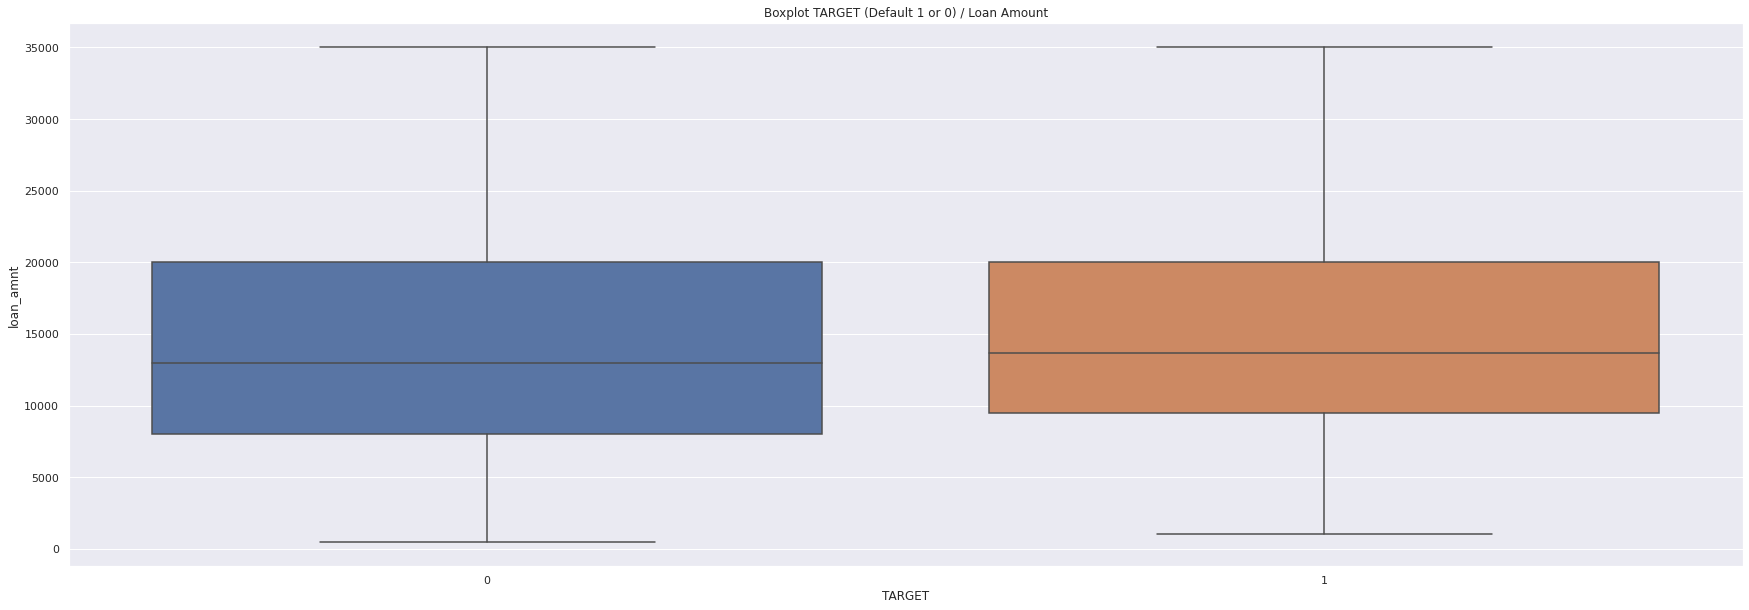

In [ ]:
sns.boxplot(data = df, x = 'TARGET', y = 'loan_amnt')
plt.title('Boxplot TARGET (Default 1 or 0) / Loan Amount')

In [ ]:
df.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

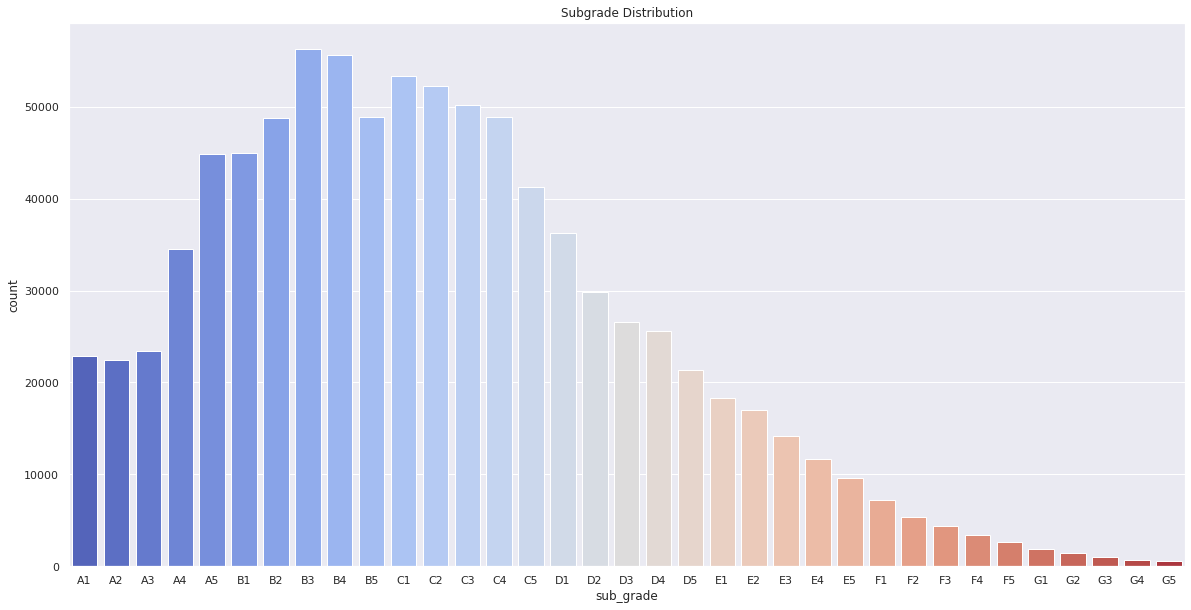

In [ ]:
plt.figure(figsize=(20,10))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm')
plt.title('Subgrade Distribution');

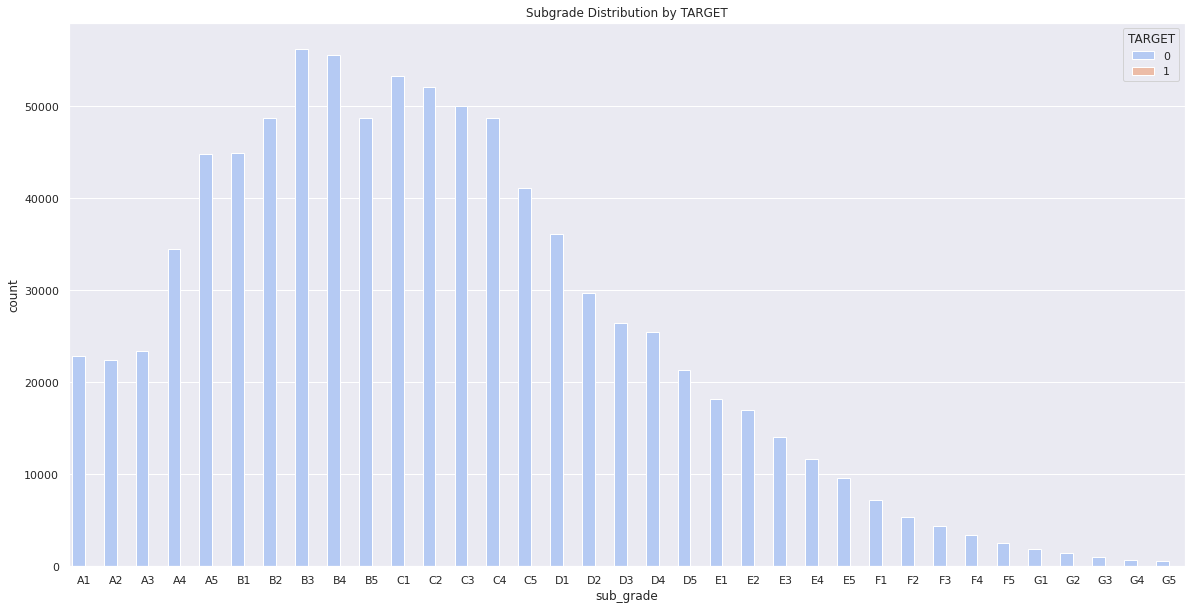

In [ ]:
plt.figure(figsize=(20,10))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm', hue='TARGET' )
plt.title('Subgrade Distribution by TARGET');

## Data still missing (some columns)

In [ ]:
df.isnull().sum()/len(df)*100

home_ownership                0.000000
tot_coll_amt                  7.919502
last_pymnt_d                  1.990018
inq_last_6mths                0.003268
revol_util                    0.056571
issue_d                       0.000000
pub_rec                       0.003268
policy_code                   0.000000
application_type              0.000000
pymnt_plan                    0.000000
loan_amnt                     0.000000
earliest_cr_line              0.003268
loan_status                   0.000000
open_acc                      0.003268
collections_12_mths_ex_med    0.016340
purpose                       0.000000
grade                         0.000000
out_prncp                     0.000000
int_rate                      0.000000
total_pymnt                   0.000000
annual_inc                    0.000451
initial_list_status           0.000000
sub_grade                     0.000000
TARGET                        0.000000
tot_cur_bal                   7.919502
total_acc                

# Anomaly Detection: check for any anomalies on the data we might have. Possible data anamolies are often found in columns dealing with time, like years of employment. Let's quickly go through them.

## Too many title class

In [ ]:
titles  = df.title.unique()
print(titles)
len(titles)

['Computer' 'bike' 'real estate business' ... 'new kitchen for momma!'
 'New Baby and New House (CC Consolidate)' 'Credit Card/Auto Repair']


63107

In [ ]:
df.drop(['title'],  axis=1, inplace=True)

In [ ]:
sorted(df.emp_length.dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [ ]:
length_order = ['< 1 year', '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

Text(0.5, 1.0, 'employee length Distribution')

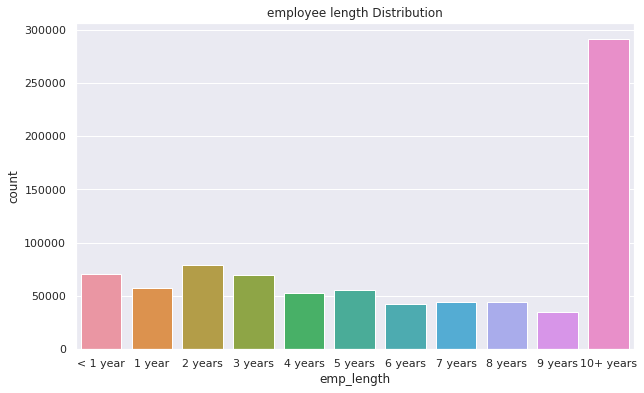

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'emp_length', order=length_order)
plt.title('employee length Distribution')

Text(0.5, 1.0, 'employee length by Loan status')

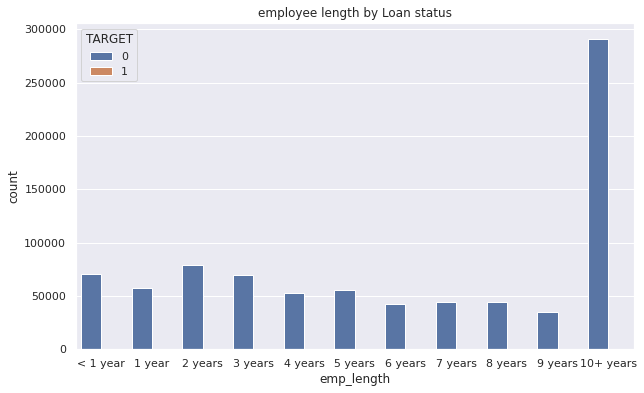

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'emp_length', hue='TARGET', order=length_order)
plt.title('employee length by Loan status')

In [ ]:
temp1 = df[df.TARGET == 0].groupby('emp_length').TARGET.count()
temp2 = df[df.TARGET == 1].groupby('emp_length').TARGET.count()

Text(0.5, 1.0, 'Emp.Length Fully Paid/ Default Ratio')

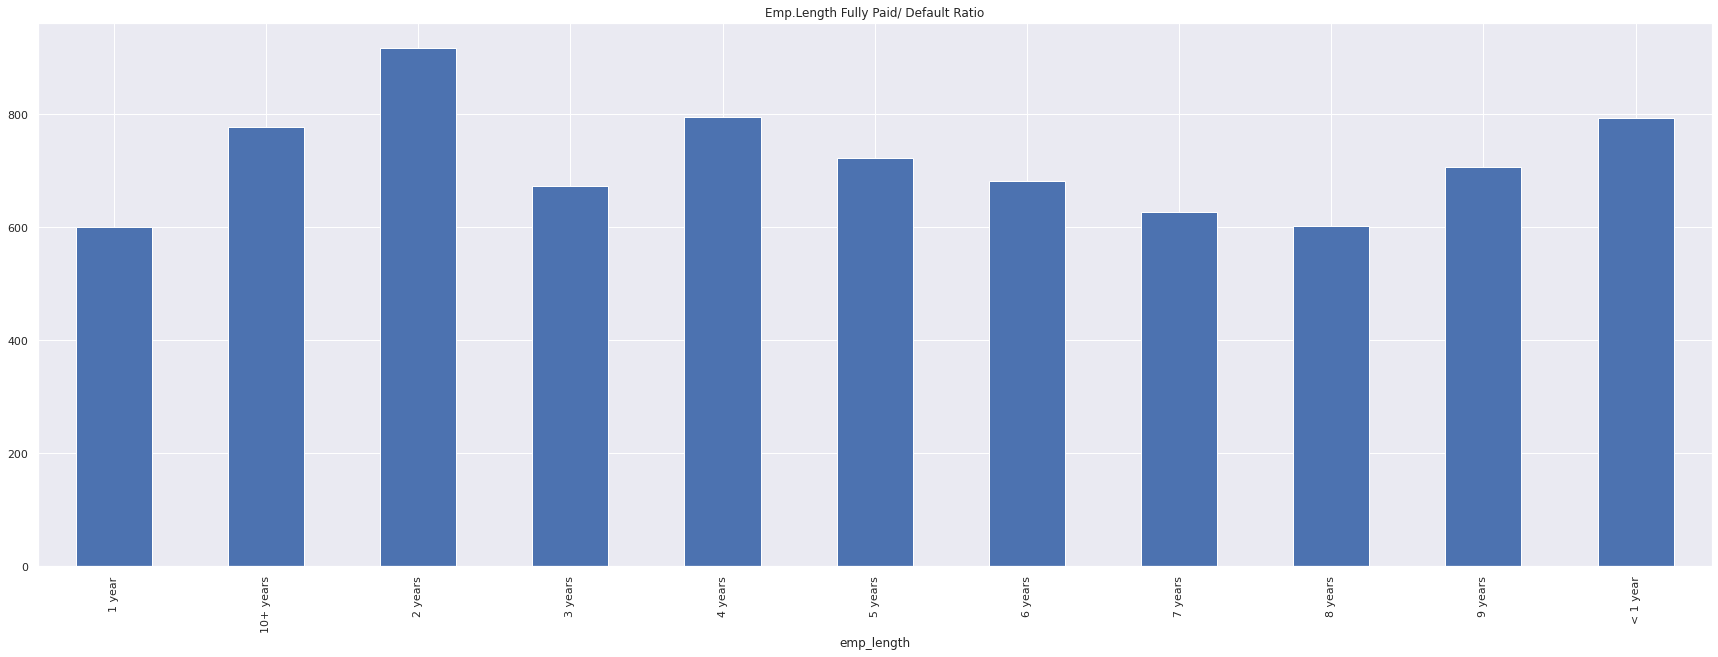

In [ ]:
(temp1/temp2).plot(kind='bar')
plt.title('Emp.Length Fully Paid/ Default Ratio')

In [ ]:
df.drop('emp_length', axis=1, inplace=True)

In [ ]:
df

home_ownership  tot_coll_amt last_pymnt_d  inq_last_6mths  revol_util  \
0                RENT           NaN       Jan-15             1.0        83.7   
1                RENT           NaN       Apr-13             5.0         9.4   
2                RENT           NaN       Jun-14             2.0        98.5   
3                RENT           NaN       Jan-15             1.0        21.0   
4                RENT           NaN       Jan-16             0.0        53.9   
...               ...           ...          ...             ...         ...   
887374           RENT           0.0       Jan-16             0.0        82.1   
887375       MORTGAGE           0.0       Jan-16             1.0        84.5   
887376           RENT           0.0       Jan-16             0.0        61.3   
887377           RENT           0.0       Jan-16             2.0        30.6   
887378           RENT           0.0       Jan-16             1.0        79.8   

           issue_d  pub_rec  policy_code application_type pymnt_plan  ...  \
0       01-12-2011      0.0            1       INDIVIDUAL          n  ...   
1       01-12-2011      0.0            1       INDIVIDUAL          n  ...   
2       01-12-2011      0.0            1       INDIVIDUAL          n  ...   
3       01-12-2011      0.0            1       INDIVIDUAL          n  ...   
4       01-12-2011      0.0            1       INDIVIDUAL          n  ...   
...            ...      ...          ...              ...        ...  ...   
887374  01-01-2015      1.0            1       INDIVIDUAL          n  ...   
887375  01-01-2015      0.0            1       INDIVIDUAL          n  ...   
887376  01-01-2015      1.0            1       INDIVIDUAL          n  ...   
887377  01-01-2015      0.0            1       INDIVIDUAL          n  ...   
887378  01-01-2015      1.0            1       INDIVIDUAL          n  ...   

          dti last_credit_pull_d zip_code        id  addr_state  \
0       27.65             Jan-16    860xx   1077501          AZ   
1        1.00             Sep-13    309xx   1077430          GA   
2        8.72             Jan-16    606xx   1077175          IL   
3       20.00             Jan-15    917xx   1076863          CA   
4       17.94             Jan-16    972xx   1075358          OR   
...       ...                ...      ...       ...         ...   
887374  28.69             Jan-16    905xx  36371250          CA   
887375   3.90             Jan-16    072xx  36441262          NJ   
887376  30.90             Jan-16    378xx  36271333          TN   
887377  27.19             Jan-16    010xx  36490806          MA   
887378  10.83             Jan-16    331xx  36271262          FL   

       acc_now_delinq last_pymnt_amnt  verification_status  \
0                 0.0          171.62             Verified   
1                 0.0          119.66      Source Verified   
2                 0.0          649.91         Not Verified   
3                 0.0          357.48      Source Verified   
4                 0.0           67.79      Source Verified   
...               ...             ...                  ...   
887374            0.0          332.10             Verified   
887375            0.0          797.03             Verified   
887376            0.0          316.07             Verified   
887377            0.0          317.86      Source Verified   
887378            0.0          664.20             Verified   

        total_rec_late_fee  recoveries  
0                     0.00        0.00  
1                     0.00      117.08  
2                     0.00        0.00  
3                    16.97        0.00  
4                     0.00        0.00  
...                    ...         ...  
887374                0.00        0.00  
887375                0.00        0.00  
887376                0.00        0.00  
887377                0.00        0.00  
887378                0.00        0.00  

[887379 rows x 40 columns]

In [ ]:
round(df.isnull().sum()/len(df),2)

home_ownership                0.00
tot_coll_amt                  0.08
last_pymnt_d                  0.02
inq_last_6mths                0.00
revol_util                    0.00
issue_d                       0.00
pub_rec                       0.00
policy_code                   0.00
application_type              0.00
pymnt_plan                    0.00
loan_amnt                     0.00
earliest_cr_line              0.00
loan_status                   0.00
open_acc                      0.00
collections_12_mths_ex_med    0.00
purpose                       0.00
grade                         0.00
out_prncp                     0.00
int_rate                      0.00
total_pymnt                   0.00
annual_inc                    0.00
initial_list_status           0.00
sub_grade                     0.00
TARGET                        0.00
tot_cur_bal                   0.08
total_acc                     0.00
revol_bal                     0.00
delinq_2yrs                   0.00
total_rec_int       

## Drop any with missing data

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

home_ownership  tot_coll_amt last_pymnt_d  inq_last_6mths  revol_util  \
42535             OWN           0.0       Jan-16             0.0        61.2   
42536            RENT           0.0       Jan-16             0.0        52.8   
42537        MORTGAGE           0.0       Jan-16             1.0        21.6   
42538            RENT       15386.0       Sep-15             0.0        68.8   
42539        MORTGAGE        1514.0       Jan-16             0.0        74.2   
...               ...           ...          ...             ...         ...   
887374           RENT           0.0       Jan-16             0.0        82.1   
887375       MORTGAGE           0.0       Jan-16             1.0        84.5   
887376           RENT           0.0       Jan-16             0.0        61.3   
887377           RENT           0.0       Jan-16             2.0        30.6   
887378           RENT           0.0       Jan-16             1.0        79.8   

           issue_d  pub_rec  policy_code application_type pymnt_plan  ...  \
42535   01-12-2013      0.0            1       INDIVIDUAL          n  ...   
42536   01-12-2013      0.0            1       INDIVIDUAL          n  ...   
42537   01-12-2013      0.0            1       INDIVIDUAL          n  ...   
42538   01-12-2013      2.0            1       INDIVIDUAL          n  ...   
42539   01-12-2013      0.0            1       INDIVIDUAL          n  ...   
...            ...      ...          ...              ...        ...  ...   
887374  01-01-2015      1.0            1       INDIVIDUAL          n  ...   
887375  01-01-2015      0.0            1       INDIVIDUAL          n  ...   
887376  01-01-2015      1.0            1       INDIVIDUAL          n  ...   
887377  01-01-2015      0.0            1       INDIVIDUAL          n  ...   
887378  01-01-2015      1.0            1       INDIVIDUAL          n  ...   

          dti last_credit_pull_d zip_code        id  addr_state  \
42535   22.87             Dec-15    481xx  10149342          MI   
42536   25.12             Jan-16    927xx  10159584          CA   
42537   14.05             Jan-16    060xx  10159498          CT   
42538   16.94             Jan-16    871xx  10139658          NM   
42539   16.51             Jan-16    334xx  10159548          FL   
...       ...                ...      ...       ...         ...   
887374  28.69             Jan-16    905xx  36371250          CA   
887375   3.90             Jan-16    072xx  36441262          NJ   
887376  30.90             Jan-16    378xx  36271333          TN   
887377  27.19             Jan-16    010xx  36490806          MA   
887378  10.83             Jan-16    331xx  36271262          FL   

       acc_now_delinq last_pymnt_amnt  verification_status  \
42535             0.0          885.46             Verified   
42536             0.0          333.14         Not Verified   
42537             0.0          368.45         Not Verified   
42538             0.0          119.17      Source Verified   
42539             0.0          476.30         Not Verified   
...               ...             ...                  ...   
887374            0.0          332.10             Verified   
887375            0.0          797.03             Verified   
887376            0.0          316.07             Verified   
887377            0.0          317.86      Source Verified   
887378            0.0          664.20             Verified   

        total_rec_late_fee  recoveries  
42535                  0.0         0.0  
42536                  0.0         0.0  
42537                  0.0         0.0  
42538                  0.0         0.0  
42539                  0.0         0.0  
...                    ...         ...  
887374                 0.0         0.0  
887375                 0.0         0.0  
887376                 0.0         0.0  
887377                 0.0         0.0  
887378                 0.0         0.0  

[799139 rows x 40 columns]

# Update dataframe

In [ ]:
df.to_csv('lending_club_v5.csv', index=False)

In [ ]:
df = pd.read_csv('lending_club_v5.csv')

In [ ]:
print("Missing values: ",df.isnull().sum().sum())

Missing values:  0


In [ ]:
df.purpose.value_counts()

debt_consolidation    479111
credit_card           191172
home_improvement       45894
other                  35627
major_purchase         13732
small_business          7220
medical                 7217
car                     6501
moving                  4431
vacation                4018
house                   2921
wedding                  872
renewable_energy         422
educational                1
Name: purpose, dtype: int64

Text(0.5, 1.0, 'Loan purpose distribution')

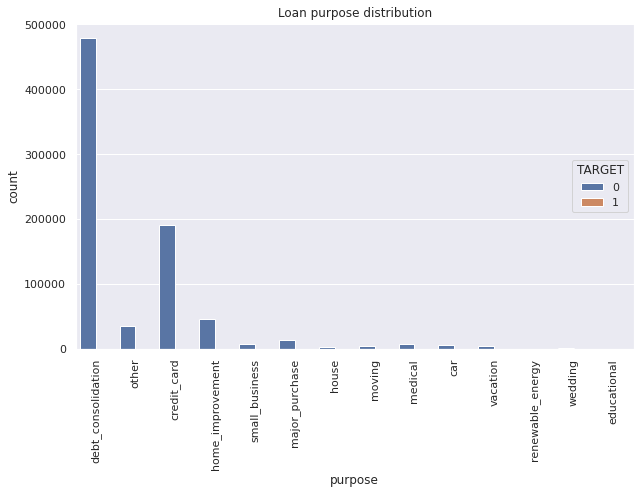

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'purpose', hue='TARGET')
plt.xticks(rotation=90)
plt.legend(loc=5, title='TARGET')
plt.title('Loan purpose distribution')

In [ ]:
df.term

0          36 months
1          36 months
2          36 months
3          36 months
4          36 months
             ...    
799134     36 months
799135     36 months
799136     60 months
799137     60 months
799138     36 months
Name: term, Length: 799139, dtype: object

In [ ]:
df.issue_d

0         01-12-2013
1         01-12-2013
2         01-12-2013
3         01-12-2013
4         01-12-2013
             ...    
799134    01-01-2015
799135    01-01-2015
799136    01-01-2015
799137    01-01-2015
799138    01-01-2015
Name: issue_d, Length: 799139, dtype: object

In [ ]:
df.issue_d = df.issue_d.apply(lambda x: int(x[-4:]))

In [ ]:
df.issue_d

0         2013
1         2013
2         2013
3         2013
4         2013
          ... 
799134    2015
799135    2015
799136    2015
799137    2015
799138    2015
Name: issue_d, Length: 799139, dtype: int64

In [ ]:
df.earliest_cr_line

0         Oct-86
1         Jan-07
2         Mar-94
3         Oct-98
4         Mar-98
           ...  
799134    Sep-04
799135    Mar-74
799136    Sep-03
799137    Oct-03
799138    Dec-01
Name: earliest_cr_line, Length: 799139, dtype: object

In [ ]:
from dateutil.parser import parse

In [ ]:
times  =  pd.to_datetime (df.earliest_cr_line, errors='coerce')

In [ ]:
times

0        1986-10-01
1               NaT
2        1994-03-01
3        1998-10-01
4        1998-03-01
            ...    
799134          NaT
799135   1974-03-01
799136          NaT
799137          NaT
799138          NaT
Name: earliest_cr_line, Length: 799139, dtype: datetime64[ns]

In [ ]:
df[times.isna()]

home_ownership  tot_coll_amt last_pymnt_d  inq_last_6mths  revol_util  \
1                RENT           0.0       Jan-16             0.0        52.8   
7                RENT           0.0       Jan-16             0.0        72.0   
10           MORTGAGE           0.0       Jan-16             0.0        55.7   
13           MORTGAGE           0.0       Jan-16             0.0        66.2   
18               RENT           0.0       Jan-16             1.0        24.0   
...               ...           ...          ...             ...         ...   
799131            OWN         972.0       Aug-15             1.0        41.6   
799134           RENT           0.0       Jan-16             0.0        82.1   
799136           RENT           0.0       Jan-16             0.0        61.3   
799137           RENT           0.0       Jan-16             2.0        30.6   
799138           RENT           0.0       Jan-16             1.0        79.8   

        issue_d  pub_rec  policy_code application_type pymnt_plan  ...    dti  \
1          2013      0.0            1       INDIVIDUAL          n  ...  25.12   
7          2013      0.0            1       INDIVIDUAL          n  ...   8.40   
10         2013      0.0            1       INDIVIDUAL          n  ...  12.61   
13         2013      0.0            1       INDIVIDUAL          n  ...   3.73   
18         2013      0.0            1       INDIVIDUAL          n  ...   4.62   
...         ...      ...          ...              ...        ...  ...    ...   
799131     2015      0.0            1       INDIVIDUAL          n  ...  29.44   
799134     2015      1.0            1       INDIVIDUAL          n  ...  28.69   
799136     2015      1.0            1       INDIVIDUAL          n  ...  30.90   
799137     2015      0.0            1       INDIVIDUAL          n  ...  27.19   
799138     2015      1.0            1       INDIVIDUAL          n  ...  10.83   

       last_credit_pull_d zip_code        id  addr_state acc_now_delinq  \
1                  Jan-16    927xx  10159584          CA            0.0   
7                  Jan-16    951xx  10129403          CA            0.0   
10                 Jan-16    782xx  10148122          TX            0.0   
13                 Jan-16    103xx  10224583          NY            0.0   
18                 Jan-16    281xx  10129454          NC            0.0   
...                   ...      ...       ...         ...            ...   
799131             Jan-16    430xx  36260758          OH            0.0   
799134             Jan-16    905xx  36371250          CA            0.0   
799136             Jan-16    378xx  36271333          TN            0.0   
799137             Jan-16    010xx  36490806          MA            0.0   
799138             Jan-16    331xx  36271262          FL            0.0   

       last_pymnt_amnt  verification_status  total_rec_late_fee  recoveries  
1               333.14         Not Verified                 0.0         0.0  
7               266.34         Not Verified                 0.0         0.0  
10              373.94         Not Verified                 0.0         0.0  
13              384.68         Not Verified                 0.0         0.0  
18              392.81         Not Verified                 0.0         0.0  
...                ...                  ...                 ...         ...  
799131           25.00             Verified                 0.0         0.0  
799134          332.10             Verified                 0.0         0.0  
799136          316.07             Verified                 0.0         0.0  
799137          317.86      Source Verified                 0.0         0.0  
799138          664.20             Verified                 0.0         0.0  

[383672 rows x 40 columns]

In [ ]:
df.earliest_cr_line = pd.to_datetime (df.earliest_cr_line, errors='coerce')

In [ ]:
df.earliest_cr_line

0        1986-10-01
1               NaT
2        1994-03-01
3        1998-10-01
4        1998-03-01
            ...    
799134          NaT
799135   1974-03-01
799136          NaT
799137          NaT
799138          NaT
Name: earliest_cr_line, Length: 799139, dtype: datetime64[ns]

In [ ]:
df.earliest_cr_line = pd.DatetimeIndex(df['earliest_cr_line']).year

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

home_ownership  tot_coll_amt last_pymnt_d  inq_last_6mths  revol_util  \
0                 OWN           0.0       Jan-16             0.0        61.2   
2            MORTGAGE           0.0       Jan-16             1.0        21.6   
3                RENT       15386.0       Sep-15             0.0        68.8   
4            MORTGAGE        1514.0       Jan-16             0.0        74.2   
5            MORTGAGE           0.0       Jan-16             1.0        67.0   
...               ...           ...          ...             ...         ...   
799128       MORTGAGE           0.0       Jan-16             0.0         3.2   
799130           RENT        3174.0       Jan-16             0.0        43.9   
799132       MORTGAGE           0.0       Jan-16             0.0        69.7   
799133           RENT           0.0       Jan-16             0.0        65.0   
799135       MORTGAGE           0.0       Jan-16             1.0        84.5   

        issue_d  pub_rec  policy_code application_type pymnt_plan  ...    dti  \
0          2013      0.0            1       INDIVIDUAL          n  ...  22.87   
2          2013      0.0            1       INDIVIDUAL          n  ...  14.05   
3          2013      2.0            1       INDIVIDUAL          n  ...  16.94   
4          2013      0.0            1       INDIVIDUAL          n  ...  16.51   
5          2013      0.0            1       INDIVIDUAL          n  ...  13.03   
...         ...      ...          ...              ...        ...  ...    ...   
799128     2015      0.0            1       INDIVIDUAL          n  ...   1.00   
799130     2015      1.0            1       INDIVIDUAL          n  ...  25.63   
799132     2015      0.0            1       INDIVIDUAL          n  ...  23.69   
799133     2015      0.0            1       INDIVIDUAL          n  ...  27.08   
799135     2015      0.0            1       INDIVIDUAL          n  ...   3.90   

        last_credit_pull_d zip_code        id  addr_state acc_now_delinq  \
0                   Dec-15    481xx  10149342          MI            0.0   
2                   Jan-16    060xx  10159498          CT            0.0   
3                   Jan-16    871xx  10139658          NM            0.0   
4                   Jan-16    334xx  10159548          FL            0.0   
5                   Jan-16    809xx  10119623          CO            0.0   
...                    ...      ...       ...         ...            ...   
799128              Mar-15    286xx  36250208          NC            0.0   
799130              Jan-16    531xx  35094480          WI            0.0   
799132              Jan-16    432xx  36330911          OH            0.0   
799133              Jan-16    791xx  36221446          TX            0.0   
799135              Jan-16    072xx  36441262          NJ            0.0   

       last_pymnt_amnt  verification_status  total_rec_late_fee  recoveries  
0               885.46             Verified                 0.0         0.0  
2               368.45         Not Verified                 0.0         0.0  
3               119.17      Source Verified                 0.0         0.0  
4               476.30         Not Verified                 0.0         0.0  
5               398.52      Source Verified                 0.0         0.0  
...                ...                  ...                 ...         ...  
799128          312.77             Verified                 0.0         0.0  
799130          240.22             Verified                 0.0         0.0  
799132          398.52             Verified                 0.0         0.0  
799133          404.61             Verified                 0.0         0.0  
799135          797.03             Verified                 0.0         0.0  

[415467 rows x 40 columns]

# Update dataframe

In [ ]:
df.to_csv('lending_club_v6.csv', index=False)

In [ ]:
df = pd.read_csv('lending_club_v6.csv')

In [ ]:
df

home_ownership  tot_coll_amt last_pymnt_d  inq_last_6mths  revol_util  \
0                 OWN           0.0       Jan-16             0.0        61.2   
1            MORTGAGE           0.0       Jan-16             1.0        21.6   
2                RENT       15386.0       Sep-15             0.0        68.8   
3            MORTGAGE        1514.0       Jan-16             0.0        74.2   
4            MORTGAGE           0.0       Jan-16             1.0        67.0   
...               ...           ...          ...             ...         ...   
415462       MORTGAGE           0.0       Jan-16             0.0         3.2   
415463           RENT        3174.0       Jan-16             0.0        43.9   
415464       MORTGAGE           0.0       Jan-16             0.0        69.7   
415465           RENT           0.0       Jan-16             0.0        65.0   
415466       MORTGAGE           0.0       Jan-16             1.0        84.5   

        issue_d  pub_rec  policy_code application_type pymnt_plan  ...    dti  \
0          2013      0.0            1       INDIVIDUAL          n  ...  22.87   
1          2013      0.0            1       INDIVIDUAL          n  ...  14.05   
2          2013      2.0            1       INDIVIDUAL          n  ...  16.94   
3          2013      0.0            1       INDIVIDUAL          n  ...  16.51   
4          2013      0.0            1       INDIVIDUAL          n  ...  13.03   
...         ...      ...          ...              ...        ...  ...    ...   
415462     2015      0.0            1       INDIVIDUAL          n  ...   1.00   
415463     2015      1.0            1       INDIVIDUAL          n  ...  25.63   
415464     2015      0.0            1       INDIVIDUAL          n  ...  23.69   
415465     2015      0.0            1       INDIVIDUAL          n  ...  27.08   
415466     2015      0.0            1       INDIVIDUAL          n  ...   3.90   

        last_credit_pull_d zip_code        id  addr_state acc_now_delinq  \
0                   Dec-15    481xx  10149342          MI            0.0   
1                   Jan-16    060xx  10159498          CT            0.0   
2                   Jan-16    871xx  10139658          NM            0.0   
3                   Jan-16    334xx  10159548          FL            0.0   
4                   Jan-16    809xx  10119623          CO            0.0   
...                    ...      ...       ...         ...            ...   
415462              Mar-15    286xx  36250208          NC            0.0   
415463              Jan-16    531xx  35094480          WI            0.0   
415464              Jan-16    432xx  36330911          OH            0.0   
415465              Jan-16    791xx  36221446          TX            0.0   
415466              Jan-16    072xx  36441262          NJ            0.0   

       last_pymnt_amnt  verification_status  total_rec_late_fee  recoveries  
0               885.46             Verified                 0.0         0.0  
1               368.45         Not Verified                 0.0         0.0  
2               119.17      Source Verified                 0.0         0.0  
3               476.30         Not Verified                 0.0         0.0  
4               398.52      Source Verified                 0.0         0.0  
...                ...                  ...                 ...         ...  
415462          312.77             Verified                 0.0         0.0  
415463          240.22             Verified                 0.0         0.0  
415464          398.52             Verified                 0.0         0.0  
415465          404.61             Verified                 0.0         0.0  
415466          797.03             Verified                 0.0         0.0  

[415467 rows x 40 columns]

In [ ]:
df['int_rate']=pd.to_numeric(df['int_rate'], downcast='float')

In [ ]:
df.int_rate

0         10.99
1          6.62
2         13.53
3          8.90
4         11.99
          ...  
415462    14.99
415463     9.49
415464    11.99
415465    15.59
415466    11.99
Name: int_rate, Length: 415467, dtype: float32

In [ ]:
df.revol_util

0         61.2
1         21.6
2         68.8
3         74.2
4         67.0
          ... 
415462     3.2
415463    43.9
415464    69.7
415465    65.0
415466    84.5
Name: revol_util, Length: 415467, dtype: float64

Text(0.5, 1.0, 'Loan by State')

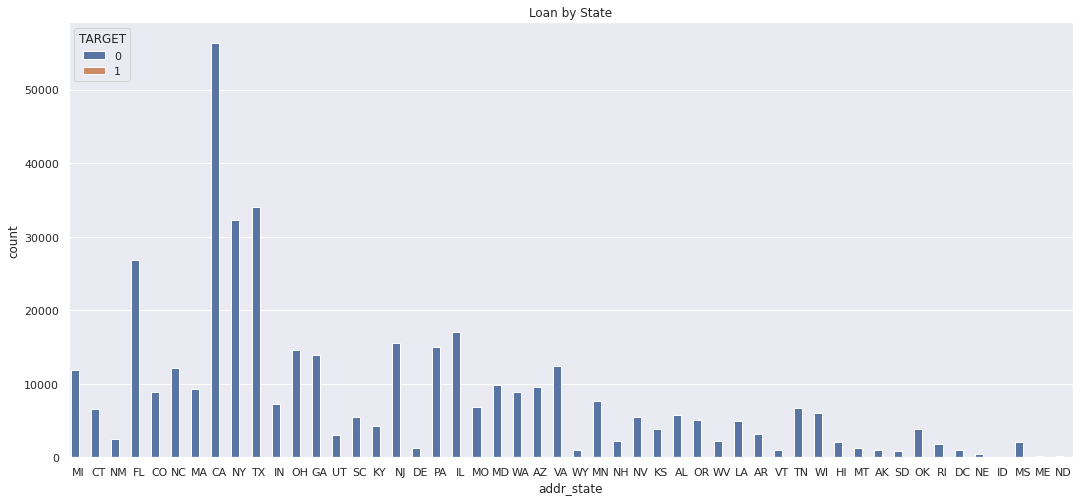

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(data = df, x = 'addr_state', hue='TARGET')
plt.title('Loan by State')

Text(0.5, 1.0, 'States by Fully Paid / TARGET')

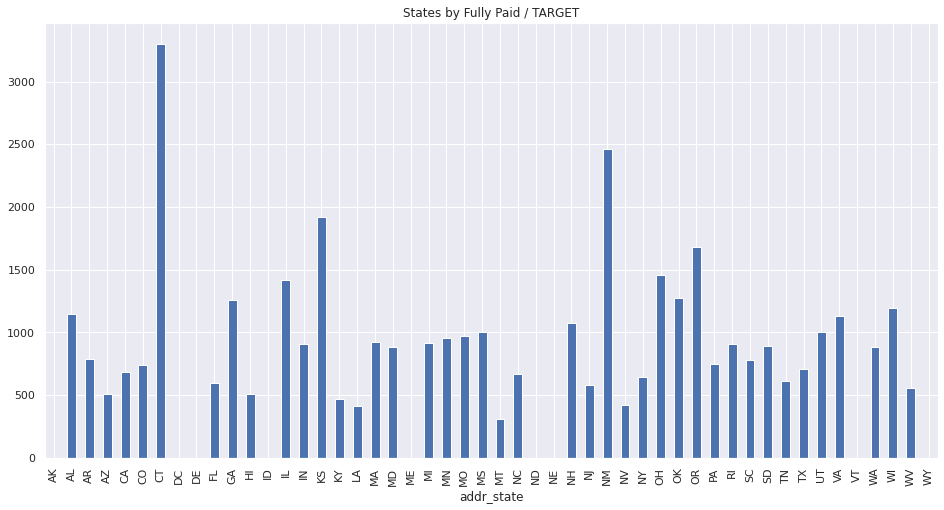

In [ ]:
state_co = df[df['TARGET']==1].groupby("addr_state").count()['TARGET']
state_fp = df[df['TARGET']==0].groupby("addr_state").count()['TARGET']
plt.figure(figsize=(16,8))
(state_fp/state_co).plot(kind='bar')
plt.title('States by Fully Paid / TARGET')

In [ ]:
df.drop('addr_state', axis=1, inplace=True)

In [ ]:
df

home_ownership  tot_coll_amt last_pymnt_d  inq_last_6mths  revol_util  \
0                 OWN           0.0       Jan-16             0.0        61.2   
1            MORTGAGE           0.0       Jan-16             1.0        21.6   
2                RENT       15386.0       Sep-15             0.0        68.8   
3            MORTGAGE        1514.0       Jan-16             0.0        74.2   
4            MORTGAGE           0.0       Jan-16             1.0        67.0   
...               ...           ...          ...             ...         ...   
415462       MORTGAGE           0.0       Jan-16             0.0         3.2   
415463           RENT        3174.0       Jan-16             0.0        43.9   
415464       MORTGAGE           0.0       Jan-16             0.0        69.7   
415465           RENT           0.0       Jan-16             0.0        65.0   
415466       MORTGAGE           0.0       Jan-16             1.0        84.5   

        issue_d  pub_rec  policy_code application_type pymnt_plan  ...  \
0          2013      0.0            1       INDIVIDUAL          n  ...   
1          2013      0.0            1       INDIVIDUAL          n  ...   
2          2013      2.0            1       INDIVIDUAL          n  ...   
3          2013      0.0            1       INDIVIDUAL          n  ...   
4          2013      0.0            1       INDIVIDUAL          n  ...   
...         ...      ...          ...              ...        ...  ...   
415462     2015      0.0            1       INDIVIDUAL          n  ...   
415463     2015      1.0            1       INDIVIDUAL          n  ...   
415464     2015      0.0            1       INDIVIDUAL          n  ...   
415465     2015      0.0            1       INDIVIDUAL          n  ...   
415466     2015      0.0            1       INDIVIDUAL          n  ...   

              term    dti last_credit_pull_d  zip_code        id  \
0        36 months  22.87             Dec-15     481xx  10149342   
1        36 months  14.05             Jan-16     060xx  10159498   
2        36 months  16.94             Jan-16     871xx  10139658   
3        36 months  16.51             Jan-16     334xx  10159548   
4        36 months  13.03             Jan-16     809xx  10119623   
...            ...    ...                ...       ...       ...   
415462   60 months   1.00             Mar-15     286xx  36250208   
415463   36 months  25.63             Jan-16     531xx  35094480   
415464   36 months  23.69             Jan-16     432xx  36330911   
415465   36 months  27.08             Jan-16     791xx  36221446   
415466   36 months   3.90             Jan-16     072xx  36441262   

       acc_now_delinq last_pymnt_amnt  verification_status  \
0                 0.0          885.46             Verified   
1                 0.0          368.45         Not Verified   
2                 0.0          119.17      Source Verified   
3                 0.0          476.30         Not Verified   
4                 0.0          398.52      Source Verified   
...               ...             ...                  ...   
415462            0.0          312.77             Verified   
415463            0.0          240.22             Verified   
415464            0.0          398.52             Verified   
415465            0.0          404.61             Verified   
415466            0.0          797.03             Verified   

        total_rec_late_fee  recoveries  
0                      0.0         0.0  
1                      0.0         0.0  
2                      0.0         0.0  
3                      0.0         0.0  
4                      0.0         0.0  
...                    ...         ...  
415462                 0.0         0.0  
415463                 0.0         0.0  
415464                 0.0         0.0  
415465                 0.0         0.0  
415466                 0.0         0.0  

[415467 rows x 39 columns]

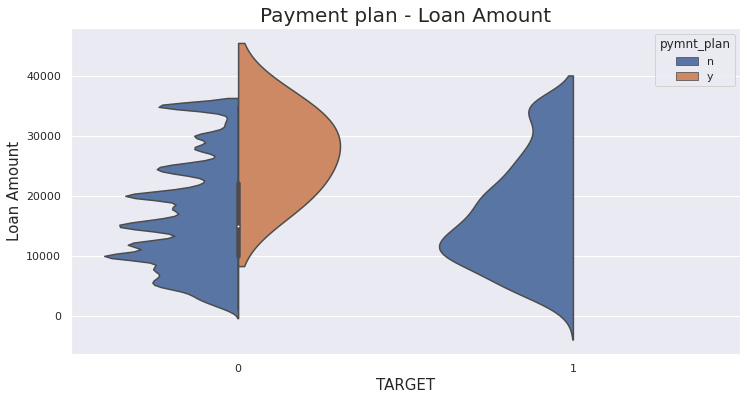

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="TARGET",y="loan_amnt",data=df, hue="pymnt_plan", split=True)
plt.title("Payment plan - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

# Drop some columns of data

In [ ]:
df.drop(['id','zip_code'],axis=1,inplace=True)

In [ ]:
df

home_ownership  tot_coll_amt last_pymnt_d  inq_last_6mths  revol_util  \
0                 OWN           0.0       Jan-16             0.0        61.2   
1            MORTGAGE           0.0       Jan-16             1.0        21.6   
2                RENT       15386.0       Sep-15             0.0        68.8   
3            MORTGAGE        1514.0       Jan-16             0.0        74.2   
4            MORTGAGE           0.0       Jan-16             1.0        67.0   
...               ...           ...          ...             ...         ...   
415462       MORTGAGE           0.0       Jan-16             0.0         3.2   
415463           RENT        3174.0       Jan-16             0.0        43.9   
415464       MORTGAGE           0.0       Jan-16             0.0        69.7   
415465           RENT           0.0       Jan-16             0.0        65.0   
415466       MORTGAGE           0.0       Jan-16             1.0        84.5   

        issue_d  pub_rec  policy_code application_type pymnt_plan  ...  \
0          2013      0.0            1       INDIVIDUAL          n  ...   
1          2013      0.0            1       INDIVIDUAL          n  ...   
2          2013      2.0            1       INDIVIDUAL          n  ...   
3          2013      0.0            1       INDIVIDUAL          n  ...   
4          2013      0.0            1       INDIVIDUAL          n  ...   
...         ...      ...          ...              ...        ...  ...   
415462     2015      0.0            1       INDIVIDUAL          n  ...   
415463     2015      1.0            1       INDIVIDUAL          n  ...   
415464     2015      0.0            1       INDIVIDUAL          n  ...   
415465     2015      0.0            1       INDIVIDUAL          n  ...   
415466     2015      0.0            1       INDIVIDUAL          n  ...   

        delinq_2yrs  total_rec_int        term    dti  last_credit_pull_d  \
0               0.0        4219.94   36 months  22.87              Dec-15   
1               0.0        1109.42   36 months  14.05              Jan-16   
2               0.0        1359.78   36 months  16.94              Jan-16   
3               0.0        1880.47   36 months  16.51              Jan-16   
4               0.0        2049.85   36 months  13.03              Jan-16   
...             ...            ...         ...    ...                 ...   
415462          0.0        1821.61   60 months   1.00              Mar-15   
415463          0.0         606.88   36 months  25.63              Jan-16   
415464          1.0        1232.81   36 months  23.69              Jan-16   
415465          0.0        1584.85   36 months  27.08              Jan-16   
415466          0.0        2465.65   36 months   3.90              Jan-16   

       acc_now_delinq last_pymnt_amnt  verification_status  \
0                 0.0          885.46             Verified   
1                 0.0          368.45         Not Verified   
2                 0.0          119.17      Source Verified   
3                 0.0          476.30         Not Verified   
4                 0.0          398.52      Source Verified   
...               ...             ...                  ...   
415462            0.0          312.77             Verified   
415463            0.0          240.22             Verified   
415464            0.0          398.52             Verified   
415465            0.0          404.61             Verified   
415466            0.0          797.03             Verified   

        total_rec_late_fee  recoveries  
0                      0.0         0.0  
1                      0.0         0.0  
2                      0.0         0.0  
3                      0.0         0.0  
4                      0.0         0.0  
...                    ...         ...  
415462                 0.0         0.0  
415463                 0.0         0.0  
415464                 0.0         0.0  
415465                 0.0         0.0  
415466                 0.0         0

# Drop columns with 30% missing data

In [ ]:
num_rows  =  df.shape[0]
num_rows

415467

In [ ]:
temp = [i for i in df.count()  < 308930 * 0.30]
df.drop(df.columns[temp],axis=1,inplace=True)

In [ ]:
df

home_ownership  tot_coll_amt last_pymnt_d  inq_last_6mths  revol_util  \
0                 OWN           0.0       Jan-16             0.0        61.2   
1            MORTGAGE           0.0       Jan-16             1.0        21.6   
2                RENT       15386.0       Sep-15             0.0        68.8   
3            MORTGAGE        1514.0       Jan-16             0.0        74.2   
4            MORTGAGE           0.0       Jan-16             1.0        67.0   
...               ...           ...          ...             ...         ...   
415462       MORTGAGE           0.0       Jan-16             0.0         3.2   
415463           RENT        3174.0       Jan-16             0.0        43.9   
415464       MORTGAGE           0.0       Jan-16             0.0        69.7   
415465           RENT           0.0       Jan-16             0.0        65.0   
415466       MORTGAGE           0.0       Jan-16             1.0        84.5   

        issue_d  pub_rec  policy_code application_type pymnt_plan  ...  \
0          2013      0.0            1       INDIVIDUAL          n  ...   
1          2013      0.0            1       INDIVIDUAL          n  ...   
2          2013      2.0            1       INDIVIDUAL          n  ...   
3          2013      0.0            1       INDIVIDUAL          n  ...   
4          2013      0.0            1       INDIVIDUAL          n  ...   
...         ...      ...          ...              ...        ...  ...   
415462     2015      0.0            1       INDIVIDUAL          n  ...   
415463     2015      1.0            1       INDIVIDUAL          n  ...   
415464     2015      0.0            1       INDIVIDUAL          n  ...   
415465     2015      0.0            1       INDIVIDUAL          n  ...   
415466     2015      0.0            1       INDIVIDUAL          n  ...   

        delinq_2yrs  total_rec_int        term    dti  last_credit_pull_d  \
0               0.0        4219.94   36 months  22.87              Dec-15   
1               0.0        1109.42   36 months  14.05              Jan-16   
2               0.0        1359.78   36 months  16.94              Jan-16   
3               0.0        1880.47   36 months  16.51              Jan-16   
4               0.0        2049.85   36 months  13.03              Jan-16   
...             ...            ...         ...    ...                 ...   
415462          0.0        1821.61   60 months   1.00              Mar-15   
415463          0.0         606.88   36 months  25.63              Jan-16   
415464          1.0        1232.81   36 months  23.69              Jan-16   
415465          0.0        1584.85   36 months  27.08              Jan-16   
415466          0.0        2465.65   36 months   3.90              Jan-16   

       acc_now_delinq last_pymnt_amnt  verification_status  \
0                 0.0          885.46             Verified   
1                 0.0          368.45         Not Verified   
2                 0.0          119.17      Source Verified   
3                 0.0          476.30         Not Verified   
4                 0.0          398.52      Source Verified   
...               ...             ...                  ...   
415462            0.0          312.77             Verified   
415463            0.0          240.22             Verified   
415464            0.0          398.52             Verified   
415465            0.0          404.61             Verified   
415466            0.0          797.03             Verified   

        total_rec_late_fee  recoveries  
0                      0.0         0.0  
1                      0.0         0.0  
2                      0.0         0.0  
3                      0.0         0.0  
4                      0.0         0.0  
...                    ...         ...  
415462                 0.0         0.0  
415463                 0.0         0.0  
415464                 0.0         0.0  
415465                 0.0         0.0  
415466                 0.0         0

In [ ]:
df_list = df.columns.to_list()

In [ ]:
df_list

['home_ownership',
 'tot_coll_amt',
 'last_pymnt_d',
 'inq_last_6mths',
 'revol_util',
 'issue_d',
 'pub_rec',
 'policy_code',
 'application_type',
 'pymnt_plan',
 'loan_amnt',
 'earliest_cr_line',
 'loan_status',
 'open_acc',
 'collections_12_mths_ex_med',
 'purpose',
 'grade',
 'out_prncp',
 'int_rate',
 'total_pymnt',
 'annual_inc',
 'initial_list_status',
 'sub_grade',
 'TARGET',
 'tot_cur_bal',
 'total_acc',
 'revol_bal',
 'delinq_2yrs',
 'total_rec_int',
 'term',
 'dti',
 'last_credit_pull_d',
 'acc_now_delinq',
 'last_pymnt_amnt',
 'verification_status',
 'total_rec_late_fee',
 'recoveries']

In [ ]:
corr = df.corr()['TARGET'].sort_values()

In [ ]:
# Display correlations
print('Most Positive Correlations:\n', corr.tail(10))
print('\nMost Negative Correlations:\n', corr.head(10))

Most Positive Correlations:
 delinq_2yrs           0.002845
dti                   0.003786
inq_last_6mths        0.004262
revol_util            0.004383
total_rec_int         0.011229
out_prncp             0.013023
total_rec_late_fee    0.016824
int_rate              0.020413
TARGET                1.000000
policy_code                NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 last_pymnt_amnt              -0.012741
issue_d                      -0.006698
total_pymnt                  -0.006213
tot_cur_bal                  -0.005802
annual_inc                   -0.003966
recoveries                   -0.003816
collections_12_mths_ex_med   -0.002582
revol_bal                    -0.002173
tot_coll_amt                 -0.002005
acc_now_delinq               -0.000560
Name: TARGET, dtype: float64


# Examining further on debt to income ratio and interest rate,

In [ ]:
df.corr()['dti'].sort_values().tail(6)

int_rate       0.078301
revol_util     0.083848
total_acc      0.093247
open_acc       0.135593
dti            1.000000
policy_code         NaN
Name: dti, dtype: float64

# Kernel Density Estimation Plots to see how the interest rate and debt to income ratio are distributed for the two classes in the TARGET column.

## Distribution of Interest Rate

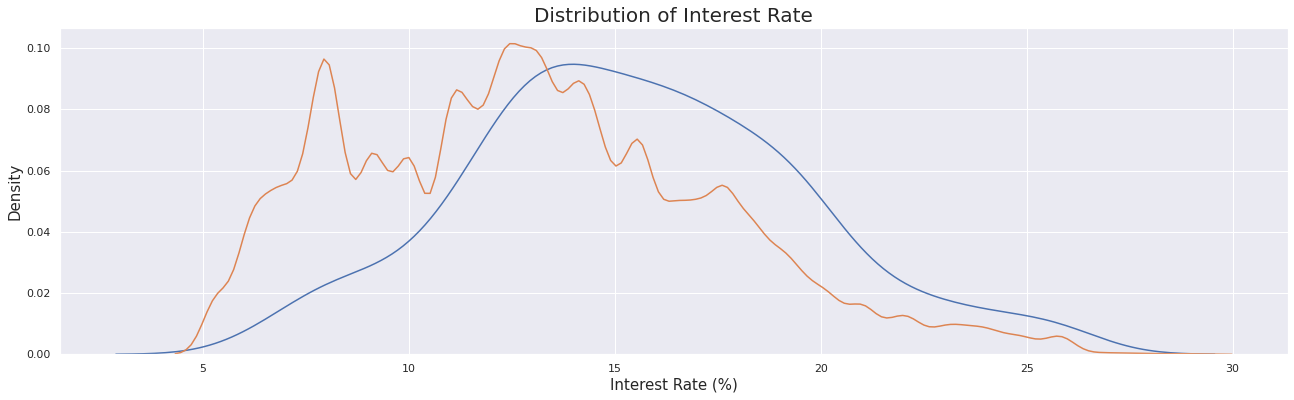

In [ ]:
fig = plt.figure(figsize=(22,6))
sns.kdeplot(df.loc[df['TARGET'] == 1, 'int_rate'], label = 'target = 1')
sns.kdeplot(df.loc[df['TARGET'] == 0, 'int_rate'], label = 'target = 0');
plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of Interest Rate',fontsize=20);

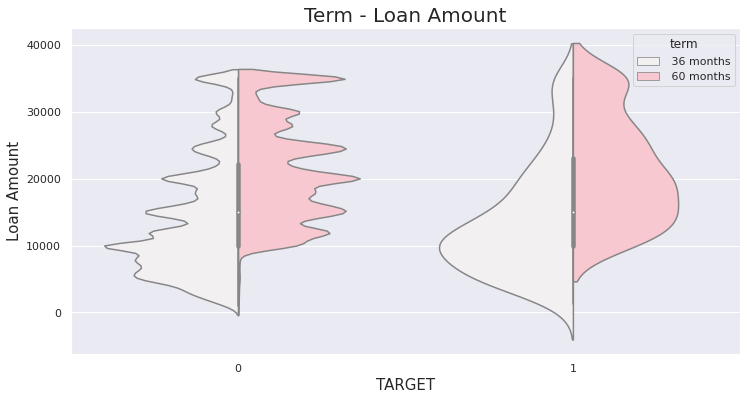

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="TARGET",y="loan_amnt",data=df, hue="term", split=True,color='pink')
plt.title("Term - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

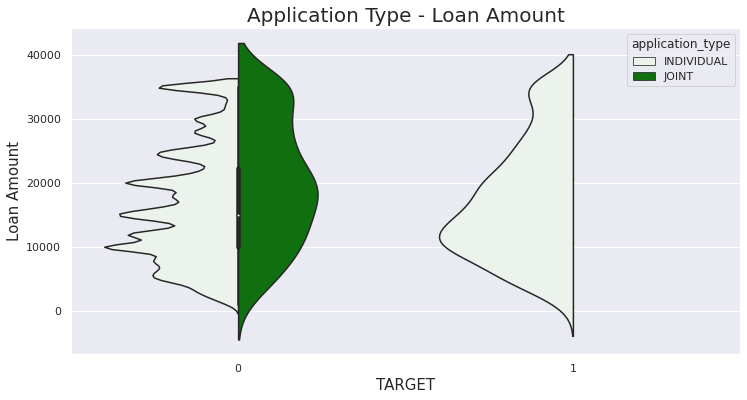

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="TARGET",y="loan_amnt",data=df, hue="application_type", split=True,color='green')
plt.title("Application Type - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

## Seeing the number of joint applicants in comparison to the the total applicants, it isn't significant enough to conclude that the loan taken by all Joint applicants are paid back.

In [ ]:
df['application_type'].value_counts()

INDIVIDUAL    415294
JOINT            173
Name: application_type, dtype: int64

# Categorical data types

In [ ]:
df.select_dtypes('object').columns

Index(['home_ownership', 'last_pymnt_d', 'application_type', 'pymnt_plan',
       'loan_status', 'purpose', 'grade', 'initial_list_status', 'sub_grade',
       'term', 'last_credit_pull_d', 'verification_status'],
      dtype='object')

## Violin-plot of TARGET classes with distribution of interest rate differentiated by the loan grades.

In [ ]:
df.home_ownership.unique()

array(['OWN', 'MORTGAGE', 'RENT', 'NONE', 'OTHER'], dtype=object)

Text(0.5, 1.0, 'Home Ownership by Loan Status')

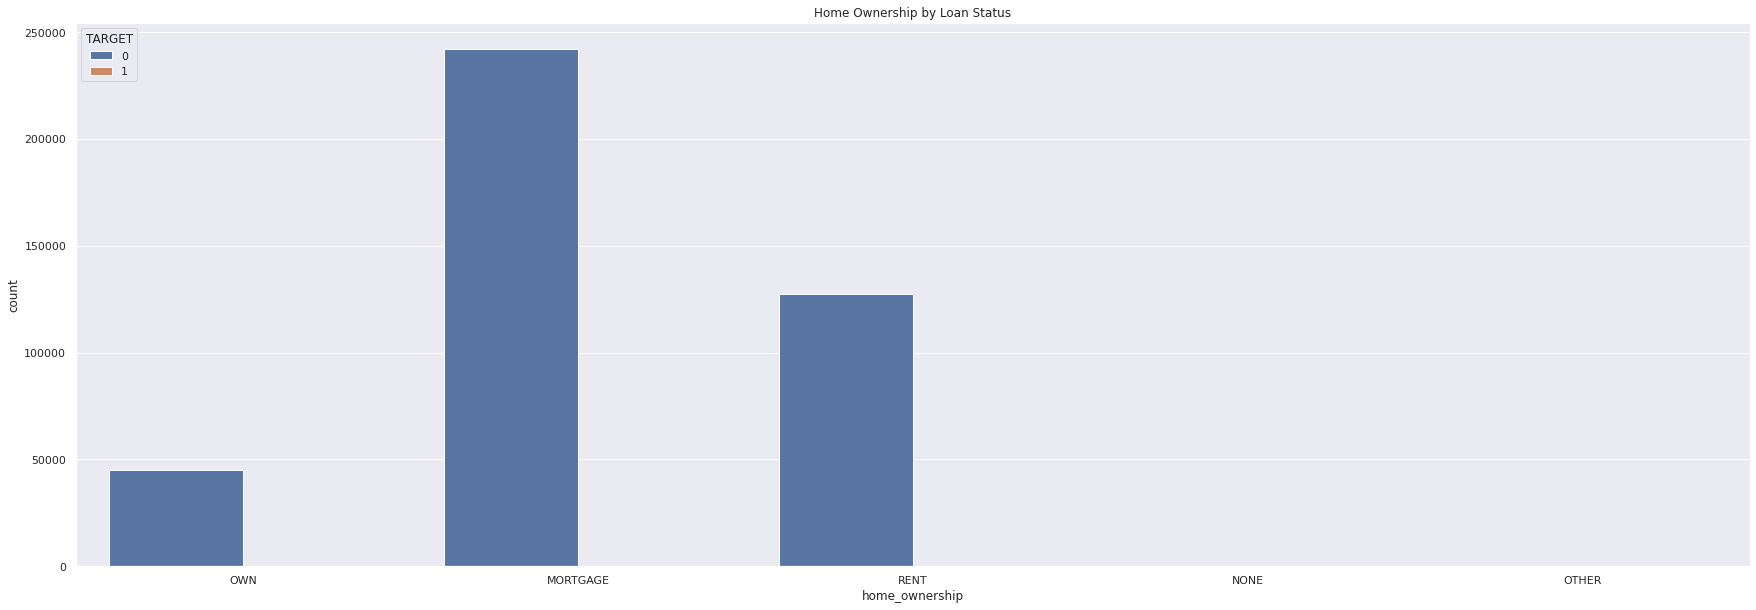

In [ ]:
sns.countplot(data = df, x = 'home_ownership', hue = 'TARGET')
plt.title('Home Ownership by Loan Status')

In [ ]:
df.home_ownership.replace(['NONE', 'ANY'], 'OTHER', inplace=True)

Text(0.5, 1.0, 'Home Ownership by Loan Status')

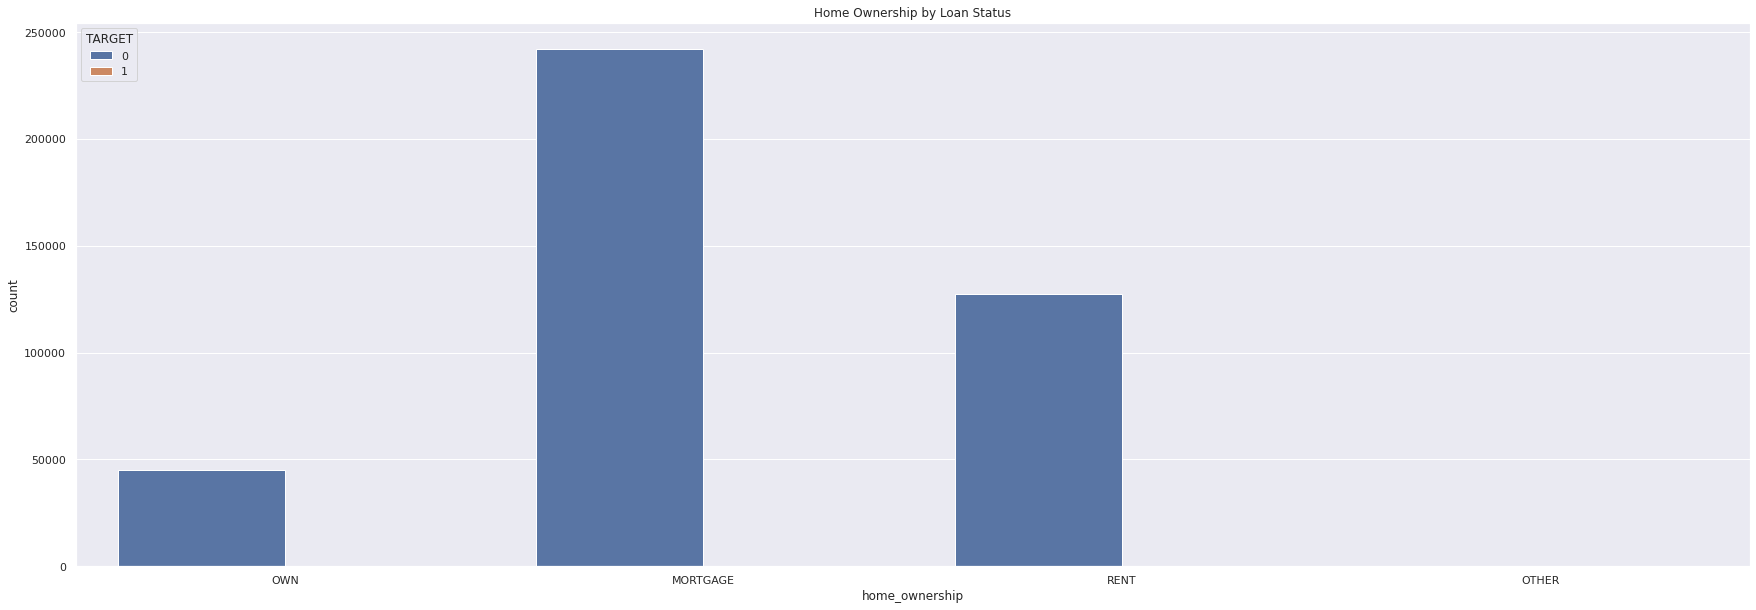

In [ ]:
sns.countplot(data = df, x = 'home_ownership', hue = 'TARGET')
plt.title('Home Ownership by Loan Status')

## The annual income of the applicant has high positive correlation with the amount of loan they have taken.

In [ ]:
df.corr()['annual_inc'].sort_values().tail(10)

total_rec_int    0.114000
open_acc         0.135686
total_pymnt      0.152360
total_acc        0.156623
out_prncp        0.208617
revol_bal        0.308802
loan_amnt        0.323132
tot_cur_bal      0.450128
annual_inc       1.000000
policy_code           NaN
Name: annual_inc, dtype: float64

In [ ]:
df

home_ownership  tot_coll_amt last_pymnt_d  inq_last_6mths  revol_util  \
0                 OWN           0.0       Jan-16             0.0        61.2   
1            MORTGAGE           0.0       Jan-16             1.0        21.6   
2                RENT       15386.0       Sep-15             0.0        68.8   
3            MORTGAGE        1514.0       Jan-16             0.0        74.2   
4            MORTGAGE           0.0       Jan-16             1.0        67.0   
...               ...           ...          ...             ...         ...   
415462       MORTGAGE           0.0       Jan-16             0.0         3.2   
415463           RENT        3174.0       Jan-16             0.0        43.9   
415464       MORTGAGE           0.0       Jan-16             0.0        69.7   
415465           RENT           0.0       Jan-16             0.0        65.0   
415466       MORTGAGE           0.0       Jan-16             1.0        84.5   

        issue_d  pub_rec  policy_code application_type pymnt_plan  ...  \
0          2013      0.0            1       INDIVIDUAL          n  ...   
1          2013      0.0            1       INDIVIDUAL          n  ...   
2          2013      2.0            1       INDIVIDUAL          n  ...   
3          2013      0.0            1       INDIVIDUAL          n  ...   
4          2013      0.0            1       INDIVIDUAL          n  ...   
...         ...      ...          ...              ...        ...  ...   
415462     2015      0.0            1       INDIVIDUAL          n  ...   
415463     2015      1.0            1       INDIVIDUAL          n  ...   
415464     2015      0.0            1       INDIVIDUAL          n  ...   
415465     2015      0.0            1       INDIVIDUAL          n  ...   
415466     2015      0.0            1       INDIVIDUAL          n  ...   

        delinq_2yrs  total_rec_int        term    dti  last_credit_pull_d  \
0               0.0        4219.94   36 months  22.87              Dec-15   
1               0.0        1109.42   36 months  14.05              Jan-16   
2               0.0        1359.78   36 months  16.94              Jan-16   
3               0.0        1880.47   36 months  16.51              Jan-16   
4               0.0        2049.85   36 months  13.03              Jan-16   
...             ...            ...         ...    ...                 ...   
415462          0.0        1821.61   60 months   1.00              Mar-15   
415463          0.0         606.88   36 months  25.63              Jan-16   
415464          1.0        1232.81   36 months  23.69              Jan-16   
415465          0.0        1584.85   36 months  27.08              Jan-16   
415466          0.0        2465.65   36 months   3.90              Jan-16   

       acc_now_delinq last_pymnt_amnt  verification_status  \
0                 0.0          885.46             Verified   
1                 0.0          368.45         Not Verified   
2                 0.0          119.17      Source Verified   
3                 0.0          476.30         Not Verified   
4                 0.0          398.52      Source Verified   
...               ...             ...                  ...   
415462            0.0          312.77             Verified   
415463            0.0          240.22             Verified   
415464            0.0          398.52             Verified   
415465            0.0          404.61             Verified   
415466            0.0          797.03             Verified   

        total_rec_late_fee  recoveries  
0                      0.0         0.0  
1                      0.0         0.0  
2                      0.0         0.0  
3                      0.0         0.0  
4                      0.0         0.0  
...                    ...         ...  
415462                 0.0         0.0  
415463                 0.0         0.0  
415464                 0.0         0.0  
415465                 0.0         0.0  
415466                 0.0         0

In [ ]:
df.isna().sum()

home_ownership                0
tot_coll_amt                  0
last_pymnt_d                  0
inq_last_6mths                0
revol_util                    0
issue_d                       0
pub_rec                       0
policy_code                   0
application_type              0
pymnt_plan                    0
loan_amnt                     0
earliest_cr_line              0
loan_status                   0
open_acc                      0
collections_12_mths_ex_med    0
purpose                       0
grade                         0
out_prncp                     0
int_rate                      0
total_pymnt                   0
annual_inc                    0
initial_list_status           0
sub_grade                     0
TARGET                        0
tot_cur_bal                   0
total_acc                     0
revol_bal                     0
delinq_2yrs                   0
total_rec_int                 0
term                          0
dti                           0
last_cre

In [ ]:
df.shape

(415467, 37)

In [ ]:
df.count().sort_values().head(40)

home_ownership                415467
annual_inc                    415467
initial_list_status           415467
sub_grade                     415467
TARGET                        415467
tot_cur_bal                   415467
total_acc                     415467
revol_bal                     415467
delinq_2yrs                   415467
total_rec_int                 415467
term                          415467
dti                           415467
last_credit_pull_d            415467
acc_now_delinq                415467
last_pymnt_amnt               415467
verification_status           415467
total_pymnt                   415467
total_rec_late_fee            415467
int_rate                      415467
grade                         415467
tot_coll_amt                  415467
last_pymnt_d                  415467
inq_last_6mths                415467
revol_util                    415467
issue_d                       415467
pub_rec                       415467
policy_code                   415467
a

In [ ]:
df['TARGET'].value_counts()

0    414936
1       531
Name: TARGET, dtype: int64

#Update dataframe

In [ ]:
df.to_csv('lending_club_v7.csv', index=False)

In [ ]:
df  =  pd.read_csv('lending_club_v7.csv')

In [ ]:
df

home_ownership  tot_coll_amt last_pymnt_d  inq_last_6mths  revol_util  \
0                 OWN           0.0       Jan-16             0.0        61.2   
1            MORTGAGE           0.0       Jan-16             1.0        21.6   
2                RENT       15386.0       Sep-15             0.0        68.8   
3            MORTGAGE        1514.0       Jan-16             0.0        74.2   
4            MORTGAGE           0.0       Jan-16             1.0        67.0   
...               ...           ...          ...             ...         ...   
415462       MORTGAGE           0.0       Jan-16             0.0         3.2   
415463           RENT        3174.0       Jan-16             0.0        43.9   
415464       MORTGAGE           0.0       Jan-16             0.0        69.7   
415465           RENT           0.0       Jan-16             0.0        65.0   
415466       MORTGAGE           0.0       Jan-16             1.0        84.5   

        issue_d  pub_rec  policy_code application_type pymnt_plan  ...  \
0          2013      0.0            1       INDIVIDUAL          n  ...   
1          2013      0.0            1       INDIVIDUAL          n  ...   
2          2013      2.0            1       INDIVIDUAL          n  ...   
3          2013      0.0            1       INDIVIDUAL          n  ...   
4          2013      0.0            1       INDIVIDUAL          n  ...   
...         ...      ...          ...              ...        ...  ...   
415462     2015      0.0            1       INDIVIDUAL          n  ...   
415463     2015      1.0            1       INDIVIDUAL          n  ...   
415464     2015      0.0            1       INDIVIDUAL          n  ...   
415465     2015      0.0            1       INDIVIDUAL          n  ...   
415466     2015      0.0            1       INDIVIDUAL          n  ...   

        delinq_2yrs  total_rec_int        term    dti  last_credit_pull_d  \
0               0.0        4219.94   36 months  22.87              Dec-15   
1               0.0        1109.42   36 months  14.05              Jan-16   
2               0.0        1359.78   36 months  16.94              Jan-16   
3               0.0        1880.47   36 months  16.51              Jan-16   
4               0.0        2049.85   36 months  13.03              Jan-16   
...             ...            ...         ...    ...                 ...   
415462          0.0        1821.61   60 months   1.00              Mar-15   
415463          0.0         606.88   36 months  25.63              Jan-16   
415464          1.0        1232.81   36 months  23.69              Jan-16   
415465          0.0        1584.85   36 months  27.08              Jan-16   
415466          0.0        2465.65   36 months   3.90              Jan-16   

       acc_now_delinq last_pymnt_amnt  verification_status  \
0                 0.0          885.46             Verified   
1                 0.0          368.45         Not Verified   
2                 0.0          119.17      Source Verified   
3                 0.0          476.30         Not Verified   
4                 0.0          398.52      Source Verified   
...               ...             ...                  ...   
415462            0.0          312.77             Verified   
415463            0.0          240.22             Verified   
415464            0.0          398.52             Verified   
415465            0.0          404.61             Verified   
415466            0.0          797.03             Verified   

        total_rec_late_fee  recoveries  
0                      0.0         0.0  
1                      0.0         0.0  
2                      0.0         0.0  
3                      0.0         0.0  
4                      0.0         0.0  
...                    ...         ...  
415462                 0.0         0.0  
415463                 0.0         0.0  
415464                 0.0         0.0  
415465                 0.0         0.0  
415466                 0.0         0

# Inspect data types

In [ ]:
df.ww.init(name="lending_club_loans_clean")

In [ ]:
df.ww

Physical Type Logical Type Semantic Tag(s)
Column                                                               
home_ownership                  category  Categorical    ['category']
tot_coll_amt                     float64       Double     ['numeric']
last_pymnt_d                    category  Categorical    ['category']
inq_last_6mths                   float64       Double     ['numeric']
revol_util                       float64       Double     ['numeric']
issue_d                            int64      Integer     ['numeric']
pub_rec                          float64       Double     ['numeric']
policy_code                        int64      Integer     ['numeric']
application_type                category  Categorical    ['category']
pymnt_plan                      category  Categorical    ['category']
loan_amnt                          int64      Integer     ['numeric']
earliest_cr_line                 float64       Double     ['numeric']
loan_status                     category  Categorical    ['category']
open_acc                         float64       Double     ['numeric']
collections_12_mths_ex_med       float64       Double     ['numeric']
purpose                         category  Categorical    ['category']
grade                           category  Categorical    ['category']
out_prncp                        float64       Double     ['numeric']
int_rate                         float64       Double     ['numeric']
total_pymnt                      float64       Double     ['numeric']
annual_inc                       float64       Double     ['numeric']
initial_list_status             category  Categorical    ['category']
sub_grade                       category  Categorical    ['category']
TARGET                             int64      Integer     ['numeric']
tot_cur_bal                      float64       Double     ['numeric']
total_acc                        float64       Double     ['numeric']
revol_bal                          int64      Integer     ['numeric']
delinq_2yrs                      float64       Double     ['numeric']
total_rec_int                    float64       Double     ['numeric']
term                            category  Categorical    ['category']
dti                              float64       Double     ['numeric']
last_credit_pull_d              category  Categorical    ['category']
acc_now_delinq                   float64       Double     ['numeric']
last_pymnt_amnt                  float64       Double     ['numeric']
verification_status             category  Categorical    ['category']
total_rec_late_fee               float64       Double     ['numeric']
recoveries                       float64       Double     ['numeric']

In [ ]:
df.purpose.unique()

['debt_consolidation', 'credit_card', 'home_improvement', 'other', 'small_business', ..., 'moving', 'vacation', 'wedding', 'renewable_energy', 'educational']
Length: 14
Categories (14, object): ['car', 'credit_card', 'debt_consolidation', 'educational', ...,
                          'renewable_energy', 'small_business', 'vacation', 'wedding']

# Handle Datetimes

In [ ]:
import datetime as dt
from datetime import datetime

In [ ]:
df['last_credit_pull_d']

0         Dec-15
1         Jan-16
2         Jan-16
3         Jan-16
4         Jan-16
           ...  
415462    Mar-15
415463    Jan-16
415464    Jan-16
415465    Jan-16
415466    Jan-16
Name: last_credit_pull_d, Length: 415467, dtype: category
Categories (41, object): ['Apr-13', 'Apr-14', 'Apr-15', 'Aug-13', ..., 'Sep-12', 'Sep-13', 'Sep-14',
                          'Sep-15']

In [ ]:
df['last_credit_pull_d_year'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')

In [ ]:
dt_series = df['last_credit_pull_d_year']
dt_series

0        2015-12-01
1        2016-01-01
2        2016-01-01
3        2016-01-01
4        2016-01-01
            ...    
415462   2015-03-01
415463   2016-01-01
415464   2016-01-01
415465   2016-01-01
415466   2016-01-01
Name: last_credit_pull_d_year, Length: 415467, dtype: category
Categories (41, datetime64[ns]): [2013-04-01, 2014-04-01, 2015-04-01, 2013-08-01, ..., 2012-09-01,
                                  2013-09-01, 2014-09-01, 2015-09-01]

In [ ]:
dt_series.dt.year

0         2015
1         2016
2         2016
3         2016
4         2016
          ... 
415462    2015
415463    2016
415464    2016
415465    2016
415466    2016
Name: last_credit_pull_d_year, Length: 415467, dtype: int64

In [ ]:
df['last_credit_pull_d_year']  = dt_series.dt.year

In [ ]:
df['last_credit_pull_d'] = df['last_credit_pull_d_year']

In [ ]:
df.columns

Index(['home_ownership', 'tot_coll_amt', 'last_pymnt_d', 'inq_last_6mths',
       'revol_util', 'issue_d', 'pub_rec', 'policy_code', 'application_type',
       'pymnt_plan', 'loan_amnt', 'earliest_cr_line', 'loan_status',
       'open_acc', 'collections_12_mths_ex_med', 'purpose', 'grade',
       'out_prncp', 'int_rate', 'total_pymnt', 'annual_inc',
       'initial_list_status', 'sub_grade', 'TARGET', 'tot_cur_bal',
       'total_acc', 'revol_bal', 'delinq_2yrs', 'total_rec_int', 'term', 'dti',
       'last_credit_pull_d', 'acc_now_delinq', 'last_pymnt_amnt',
       'verification_status', 'total_rec_late_fee', 'recoveries',
       'last_credit_pull_d_year'],
      dtype='object')

In [ ]:
df=df[['purpose', 'last_credit_pull_d', 'term', 'grade', 'initial_list_status',
       'earliest_cr_line', 'sub_grade', 'policy_code', 'tot_coll_amt',
       'revol_util', 'open_acc', 'annual_inc', 'inq_last_6mths', 'loan_status',
       'recoveries', 'out_prncp', 'int_rate', 'revol_bal', 'TARGET',
       'total_rec_int', 'application_type', 'last_pymnt_amnt', 'loan_amnt',
       'verification_status', 'dti', 'issue_d', 'acc_now_delinq',
       'home_ownership', 'last_pymnt_d', 'pymnt_plan', 'tot_cur_bal',
       'collections_12_mths_ex_med', 'pub_rec', 'total_pymnt', 'total_acc',
       'delinq_2yrs', 'total_rec_late_fee']]

In [ ]:
df

purpose  last_credit_pull_d        term grade  \
0       debt_consolidation                2015   36 months     B   
1       debt_consolidation                2016   36 months     A   
2       debt_consolidation                2016   36 months     B   
3       debt_consolidation                2016   36 months     A   
4       debt_consolidation                2016   36 months     B   
...                    ...                 ...         ...   ...   
415462      major_purchase                2015   60 months     C   
415463  debt_consolidation                2016   36 months     B   
415464         credit_card                2016   36 months     B   
415465         credit_card                2016   36 months     D   
415466    home_improvement                2016   36 months     B   

       initial_list_status  earliest_cr_line sub_grade  policy_code  \
0                        w            1986.0        B2            1   
1                        w            1994.0        A2            1   
2                        w            1998.0        B5            1   
3                        w            1998.0        A5            1   
4                        f            1997.0        B3            1   
...                    ...               ...       ...          ...   
415462                   w            1994.0        C5            1   
415463                   f            1994.0        B2            1   
415464                   f            1995.0        B5            1   
415465                   f            1999.0        D1            1   
415466                   f            1974.0        B5            1   

        tot_coll_amt  revol_util  ...  home_ownership  last_pymnt_d  \
0                0.0        61.2  ...             OWN        Jan-16   
1                0.0        21.6  ...        MORTGAGE        Jan-16   
2            15386.0        68.8  ...            RENT        Sep-15   
3             1514.0        74.2  ...        MORTGAGE        Jan-16   
4                0.0        67.0  ...        MORTGAGE        Jan-16   
...              ...         ...  ...             ...           ...   
415462           0.0         3.2  ...        MORTGAGE        Jan-16   
415463        3174.0        43.9  ...            RENT        Jan-16   
415464           0.0        69.7  ...        MORTGAGE        Jan-16   
415465           0.0        65.0  ...            RENT        Jan-16   
415466           0.0        84.5  ...        MORTGAGE        Jan-16   

        pymnt_plan tot_cur_bal  collections_12_mths_ex_med  pub_rec  \
0                n    114834.0                         0.0      0.0   
1                n    267646.0                         0.0      0.0   
2                n     13605.0                         0.0      2.0   
3                n    272492.0                         0.0      0.0   
4                n    327264.0                         0.0      0.0   
...            ...         ...                         ...      ...   
415462           n    158977.0                         0.0      0.0   
415463           n     18611.0                         0.0      1.0   
415464           n    237002.0                         0.0      0.0   
415465           n     19798.0                         0.0      0.0   
415466           n    140285.0                         0.0      0.0   

        total_pymnt  total_acc  delinq_2yrs  total_rec_late_fee  
0          21251.04       27.0          0.0                 0.0  
1           8842.80       22.0          0.0                 0.0  
2          13359.77       32.0          0.0                 0.0  
3          11431.20       29.0          0.0                 0.0  
4           9564.40       19.0          0.0                 0.0  
...             ...        ...          ...                 ...  
415462      3731.34       14.0          0.0                 0.0  
415463      2874.73       29.0          0.0                 0.0  
415464      4766.25       61.0          1.0      

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415467 entries, 0 to 415466
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   purpose                     415467 non-null  category
 1   last_credit_pull_d          415467 non-null  int64   
 2   term                        415467 non-null  category
 3   grade                       415467 non-null  category
 4   initial_list_status         415467 non-null  category
 5   earliest_cr_line            415467 non-null  float64 
 6   sub_grade                   415467 non-null  category
 7   policy_code                 415467 non-null  int64   
 8   tot_coll_amt                415467 non-null  float64 
 9   revol_util                  415467 non-null  float64 
 10  open_acc                    415467 non-null  float64 
 11  annual_inc                  415467 non-null  float64 
 12  inq_last_6mths              415467 non-null  float64 
 13 

In [ ]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')

In [ ]:
df['last_pymnt_d']

0        2016-01-01
1        2016-01-01
2        2015-09-01
3        2016-01-01
4        2016-01-01
            ...    
415462   2016-01-01
415463   2016-01-01
415464   2016-01-01
415465   2016-01-01
415466   2016-01-01
Name: last_pymnt_d, Length: 415467, dtype: category
Categories (41, datetime64[ns]): [2013-04-01, 2014-04-01, 2015-04-01, 2013-08-01, ..., 2012-09-01,
                                  2013-09-01, 2014-09-01, 2015-09-01]

In [ ]:
dt_series = df['last_pymnt_d']
dt_series

0        2016-01-01
1        2016-01-01
2        2015-09-01
3        2016-01-01
4        2016-01-01
            ...    
415462   2016-01-01
415463   2016-01-01
415464   2016-01-01
415465   2016-01-01
415466   2016-01-01
Name: last_pymnt_d, Length: 415467, dtype: category
Categories (41, datetime64[ns]): [2013-04-01, 2014-04-01, 2015-04-01, 2013-08-01, ..., 2012-09-01,
                                  2013-09-01, 2014-09-01, 2015-09-01]

In [ ]:
df['last_pymnt_d']  = dt_series.dt.year

In [ ]:
df['last_pymnt_d'] 

0         2016
1         2016
2         2015
3         2016
4         2016
          ... 
415462    2016
415463    2016
415464    2016
415465    2016
415466    2016
Name: last_pymnt_d, Length: 415467, dtype: int64

In [ ]:
df

purpose  last_credit_pull_d        term grade  \
0       debt_consolidation                2015   36 months     B   
1       debt_consolidation                2016   36 months     A   
2       debt_consolidation                2016   36 months     B   
3       debt_consolidation                2016   36 months     A   
4       debt_consolidation                2016   36 months     B   
...                    ...                 ...         ...   ...   
415462      major_purchase                2015   60 months     C   
415463  debt_consolidation                2016   36 months     B   
415464         credit_card                2016   36 months     B   
415465         credit_card                2016   36 months     D   
415466    home_improvement                2016   36 months     B   

       initial_list_status  earliest_cr_line sub_grade  policy_code  \
0                        w            1986.0        B2            1   
1                        w            1994.0        A2            1   
2                        w            1998.0        B5            1   
3                        w            1998.0        A5            1   
4                        f            1997.0        B3            1   
...                    ...               ...       ...          ...   
415462                   w            1994.0        C5            1   
415463                   f            1994.0        B2            1   
415464                   f            1995.0        B5            1   
415465                   f            1999.0        D1            1   
415466                   f            1974.0        B5            1   

        tot_coll_amt  revol_util  ...  home_ownership  last_pymnt_d  \
0                0.0        61.2  ...             OWN          2016   
1                0.0        21.6  ...        MORTGAGE          2016   
2            15386.0        68.8  ...            RENT          2015   
3             1514.0        74.2  ...        MORTGAGE          2016   
4                0.0        67.0  ...        MORTGAGE          2016   
...              ...         ...  ...             ...           ...   
415462           0.0         3.2  ...        MORTGAGE          2016   
415463        3174.0        43.9  ...            RENT          2016   
415464           0.0        69.7  ...        MORTGAGE          2016   
415465           0.0        65.0  ...            RENT          2016   
415466           0.0        84.5  ...        MORTGAGE          2016   

        pymnt_plan tot_cur_bal  collections_12_mths_ex_med  pub_rec  \
0                n    114834.0                         0.0      0.0   
1                n    267646.0                         0.0      0.0   
2                n     13605.0                         0.0      2.0   
3                n    272492.0                         0.0      0.0   
4                n    327264.0                         0.0      0.0   
...            ...         ...                         ...      ...   
415462           n    158977.0                         0.0      0.0   
415463           n     18611.0                         0.0      1.0   
415464           n    237002.0                         0.0      0.0   
415465           n     19798.0                         0.0      0.0   
415466           n    140285.0                         0.0      0.0   

        total_pymnt  total_acc  delinq_2yrs  total_rec_late_fee  
0          21251.04       27.0          0.0                 0.0  
1           8842.80       22.0          0.0                 0.0  
2          13359.77       32.0          0.0                 0.0  
3          11431.20       29.0          0.0                 0.0  
4           9564.40       19.0          0.0                 0.0  
...             ...        ...          ...                 ...  
415462      3731.34       14.0          0.0                 0.0  
415463      2874.73       29.0          0.0                 0.0  
415464      4766.25       61.0          1.0      

In [ ]:
df.to_csv('lending_club_v8.csv', index=False)

In [ ]:
df.columns

Index(['purpose', 'last_credit_pull_d', 'term', 'grade', 'initial_list_status',
       'earliest_cr_line', 'sub_grade', 'policy_code', 'tot_coll_amt',
       'revol_util', 'open_acc', 'annual_inc', 'inq_last_6mths', 'loan_status',
       'recoveries', 'out_prncp', 'int_rate', 'revol_bal', 'TARGET',
       'total_rec_int', 'application_type', 'last_pymnt_amnt', 'loan_amnt',
       'verification_status', 'dti', 'issue_d', 'acc_now_delinq',
       'home_ownership', 'last_pymnt_d', 'pymnt_plan', 'tot_cur_bal',
       'collections_12_mths_ex_med', 'pub_rec', 'total_pymnt', 'total_acc',
       'delinq_2yrs', 'total_rec_late_fee'],
      dtype='object')

In [ ]:
df.policy_code.unique()

array([1])

In [ ]:
df.select_dtypes(include=["category", "object"])

purpose        term grade initial_list_status sub_grade  \
0       debt_consolidation   36 months     B                   w        B2   
1       debt_consolidation   36 months     A                   w        A2   
2       debt_consolidation   36 months     B                   w        B5   
3       debt_consolidation   36 months     A                   w        A5   
4       debt_consolidation   36 months     B                   f        B3   
...                    ...         ...   ...                 ...       ...   
415462      major_purchase   60 months     C                   w        C5   
415463  debt_consolidation   36 months     B                   f        B2   
415464         credit_card   36 months     B                   f        B5   
415465         credit_card   36 months     D                   f        D1   
415466    home_improvement   36 months     B                   f        B5   

       loan_status application_type verification_status home_ownership  \
0          Current       INDIVIDUAL            Verified            OWN   
1          Current       INDIVIDUAL        Not Verified       MORTGAGE   
2       Fully Paid       INDIVIDUAL     Source Verified           RENT   
3          Current       INDIVIDUAL        Not Verified       MORTGAGE   
4          Current       INDIVIDUAL     Source Verified       MORTGAGE   
...            ...              ...                 ...            ...   
415462     Current       INDIVIDUAL            Verified       MORTGAGE   
415463     Current       INDIVIDUAL            Verified           RENT   
415464     Current       INDIVIDUAL            Verified       MORTGAGE   
415465     Current       INDIVIDUAL            Verified           RENT   
415466     Current       INDIVIDUAL            Verified       MORTGAGE   

       pymnt_plan  
0               n  
1               n  
2               n  
3               n  
4               n  
...           ...  
415462          n  
415463          n  
415464          n  
415465          n  
415466          n  

[415467 rows x 10 columns]

In [ ]:
df.select_dtypes(exclude=["category", "object"])

last_credit_pull_d  earliest_cr_line  policy_code  tot_coll_amt  \
0                     2015            1986.0            1           0.0   
1                     2016            1994.0            1           0.0   
2                     2016            1998.0            1       15386.0   
3                     2016            1998.0            1        1514.0   
4                     2016            1997.0            1           0.0   
...                    ...               ...          ...           ...   
415462                2015            1994.0            1           0.0   
415463                2016            1994.0            1        3174.0   
415464                2016            1995.0            1           0.0   
415465                2016            1999.0            1           0.0   
415466                2016            1974.0            1           0.0   

        revol_util  open_acc  annual_inc  inq_last_6mths  recoveries  \
0             61.2      14.0     55000.0             0.0         0.0   
1             21.6      12.0    105000.0             1.0         0.0   
2             68.8       7.0     40000.0             0.0         0.0   
3             74.2       8.0     63000.0             0.0         0.0   
4             67.0       9.0    130000.0             1.0         0.0   
...            ...       ...         ...             ...         ...   
415462         3.2       3.0     30000.0             0.0         0.0   
415463        43.9      10.0     40000.0             0.0         0.0   
415464        69.7      13.0     63000.0             0.0         0.0   
415465        65.0       9.0     25400.0             0.0         0.0   
415466        84.5       5.0     79000.0             1.0         0.0   

        out_prncp  ...  issue_d  acc_now_delinq  last_pymnt_d  tot_cur_bal  \
0        10018.90  ...     2013             0.0          2016     114834.0   
1         4266.62  ...     2013             0.0          2016     267646.0   
2            0.00  ...     2013             0.0          2015      13605.0   
3         5449.27  ...     2013             0.0          2016     272492.0   
4         4485.45  ...     2013             0.0          2016     327264.0   
...           ...  ...      ...             ...           ...          ...   
415462   11240.27  ...     2015             0.0          2016     158977.0   
415463    5232.15  ...     2015             0.0          2016      18611.0   
415464    8466.56  ...     2015             0.0          2016     237002.0   
415465    8296.52  ...     2015             0.0          2016      19798.0   
415466   16933.26  ...     2015             0.0          2016     140285.0   

        collections_12_mths_ex_med  pub_rec  total_pymnt  total_acc  \
0                              0.0      0.0     21251.04       27.0   
1                              0.0      0.0      8842.80       22.0   
2                              0.0      2.0     13359.77       32.0   
3                              0.0      0.0     11431.20       29.0   
4                              0.0      0.0      9564.40       19.0   
...                            ...      ...          ...        ...   
415462                         0.0      0.0      3731.34       14.0   
415463                         0.0      1.0      2874.73       29.0   
415464                         0.0      0.0      4766.25       61.0   
415465                         0.0      0.0      4863.33       18.0   
415466                         0.0      0.0      9532.39       23.0   

        delinq_2yrs  total_rec_late_fee  
0               0.0                 0.0  
1               0.0                 0.0  
2               0.0                 0.0  
3               0.0                 0.0  
4               0.0                 0.0  
...             ...                 ...  
415462          0.0                 0.0  
415463          0.0                 0.0  
415464          1.0                 0.0  
415465          0.0             

In [ ]:
df.select_dtypes(exclude=["category", "object"]).describe()

last_credit_pull_d  earliest_cr_line  policy_code   tot_coll_amt  \
count       415467.000000     415467.000000     415467.0  415467.000000   
mean          2015.825743       1993.373293          1.0     260.494215   
std              0.475938          9.436174          0.0    2261.449998   
min           2012.000000       1972.000000          1.0       0.000000   
25%           2016.000000       1989.000000          1.0       0.000000   
50%           2016.000000       1994.000000          1.0       0.000000   
75%           2016.000000       1997.000000          1.0       0.000000   
max           2016.000000       2071.000000          1.0  496651.000000   

          revol_util       open_acc    annual_inc  inq_last_6mths  \
count  415467.000000  415467.000000  4.154670e+05   415467.000000   
mean       55.830961      12.235622  8.375381e+04        0.685797   
std        23.530441       5.455158  6.926399e+04        0.977488   
min         0.000000       1.000000  0.000000e+00        0.000000   
25%        38.600000       8.000000  5.100000e+04        0.000000   
50%        56.800000      11.000000  7.100000e+04        0.000000   
75%        74.100000      15.000000  1.000000e+05        1.000000   
max       892.300000      90.000000  9.500000e+06        7.000000   

          recoveries      out_prncp  ...        issue_d  acc_now_delinq  \
count  415467.000000  415467.000000  ...  415467.000000   415467.000000   
mean       43.480269    9609.617415  ...    2014.216941        0.007112   
std       407.560267    8924.718162  ...       0.866941        0.093498   
min         0.000000       0.000000  ...    2012.000000        0.000000   
25%         0.000000     812.605000  ...    2014.000000        0.000000   
50%         0.000000    7989.320000  ...    2014.000000        0.000000   
75%         0.000000   15433.665000  ...    2015.000000        0.000000   
max     33520.270000   49372.860000  ...    2015.000000       14.000000   

        last_pymnt_d   tot_cur_bal  collections_12_mths_ex_med        pub_rec  \
count  415467.000000  4.154670e+05               415467.000000  415467.000000   
mean     2015.488684  1.646969e+05                    0.015965       0.236789   
std         0.686728  1.727317e+05                    0.142909       0.661053   
min      2012.000000  0.000000e+00                    0.000000       0.000000   
25%      2015.000000  3.643650e+04                    0.000000       0.000000   
50%      2016.000000  1.136740e+05                    0.000000       0.000000   
75%      2016.000000  2.428755e+05                    0.000000       0.000000   
max      2016.000000  8.000078e+06                   16.000000      86.000000   

         total_pymnt      total_acc    delinq_2yrs  total_rec_late_fee  
count  415467.000000  415467.000000  415467.000000       415467.000000  
mean     8184.594089      28.300695       0.394231            0.333546  
std      8184.867698      11.806961       0.962798            3.901696  
min         0.000000       2.000000       0.000000            0.000000  
25%      2245.400000      20.000000       0.000000            0.000000  
50%      5426.540000      27.000000       0.000000            0.000000  
75%     11428.642495      35.000000       0.000000            0.000000  
max     56087.909920     162.000000      39.000000          294.680000  

[8 rows x 27 columns]

# Final columns to drop

*  grade - keep sub-grade
*  policy_code
*  loan_status -  since this was replace with  the TARGET column

In [ ]:
 df = df[['purpose', 
       'last_credit_pull_d', 
       'term',
       'initial_list_status',
       'earliest_cr_line', 
       'sub_grade',
       'tot_coll_amt',
       'revol_util', 
       'open_acc', 
       'annual_inc', 
       'inq_last_6mths',
       'recoveries', 
       'out_prncp', 
       'int_rate', 
       'revol_bal', 
       'TARGET',
       'total_rec_int', 
       'application_type', 
       'last_pymnt_amnt', 
       'loan_amnt',
       'verification_status', 
       'dti', 
       'issue_d', 
       'acc_now_delinq',
       'home_ownership', 
       'last_pymnt_d', 
       'pymnt_plan', 
       'tot_cur_bal',
       'collections_12_mths_ex_med', 
       'pub_rec', 
       'total_pymnt', 
       'total_acc',
       'delinq_2yrs', 
       'total_rec_late_fee']]

In [ ]:
df

purpose  last_credit_pull_d        term  \
0       debt_consolidation                2015   36 months   
1       debt_consolidation                2016   36 months   
2       debt_consolidation                2016   36 months   
3       debt_consolidation                2016   36 months   
4       debt_consolidation                2016   36 months   
...                    ...                 ...         ...   
415462      major_purchase                2015   60 months   
415463  debt_consolidation                2016   36 months   
415464         credit_card                2016   36 months   
415465         credit_card                2016   36 months   
415466    home_improvement                2016   36 months   

       initial_list_status  earliest_cr_line sub_grade  tot_coll_amt  \
0                        w            1986.0        B2           0.0   
1                        w            1994.0        A2           0.0   
2                        w            1998.0        B5       15386.0   
3                        w            1998.0        A5        1514.0   
4                        f            1997.0        B3           0.0   
...                    ...               ...       ...           ...   
415462                   w            1994.0        C5           0.0   
415463                   f            1994.0        B2        3174.0   
415464                   f            1995.0        B5           0.0   
415465                   f            1999.0        D1           0.0   
415466                   f            1974.0        B5           0.0   

        revol_util  open_acc  annual_inc  ...  home_ownership  last_pymnt_d  \
0             61.2      14.0     55000.0  ...             OWN          2016   
1             21.6      12.0    105000.0  ...        MORTGAGE          2016   
2             68.8       7.0     40000.0  ...            RENT          2015   
3             74.2       8.0     63000.0  ...        MORTGAGE          2016   
4             67.0       9.0    130000.0  ...        MORTGAGE          2016   
...            ...       ...         ...  ...             ...           ...   
415462         3.2       3.0     30000.0  ...        MORTGAGE          2016   
415463        43.9      10.0     40000.0  ...            RENT          2016   
415464        69.7      13.0     63000.0  ...        MORTGAGE          2016   
415465        65.0       9.0     25400.0  ...            RENT          2016   
415466        84.5       5.0     79000.0  ...        MORTGAGE          2016   

        pymnt_plan  tot_cur_bal  collections_12_mths_ex_med  pub_rec  \
0                n     114834.0                         0.0      0.0   
1                n     267646.0                         0.0      0.0   
2                n      13605.0                         0.0      2.0   
3                n     272492.0                         0.0      0.0   
4                n     327264.0                         0.0      0.0   
...            ...          ...                         ...      ...   
415462           n     158977.0                         0.0      0.0   
415463           n      18611.0                         0.0      1.0   
415464           n     237002.0                         0.0      0.0   
415465           n      19798.0                         0.0      0.0   
415466           n     140285.0                         0.0      0.0   

        total_pymnt total_acc  delinq_2yrs  total_rec_late_fee  
0          21251.04      27.0          0.0                 0.0  
1           8842.80      22.0          0.0                 0.0  
2          13359.77      32.0          0.0                 0.0  
3          11431.20      29.0          0.0                 0.0  
4           9564.40      19.0          0.0                 0.0  
...             ...       ...          ...                 ...  
415462      3731.34      14.0          0.0                 0.0  
415463      2874.73      29.0          0.0                 0.0  
415464    

In [ ]:
df.to_csv('lending_club_v9.csv', index=False)

In [ ]:
df =  pd.read_csv('lending_club_v9.csv')

# Numerical data types

In [ ]:
df.select_dtypes(exclude=["category", "object"])

last_credit_pull_d  earliest_cr_line  tot_coll_amt  revol_util  \
0                     2015            1986.0           0.0        61.2   
1                     2016            1994.0           0.0        21.6   
2                     2016            1998.0       15386.0        68.8   
3                     2016            1998.0        1514.0        74.2   
4                     2016            1997.0           0.0        67.0   
...                    ...               ...           ...         ...   
415462                2015            1994.0           0.0         3.2   
415463                2016            1994.0        3174.0        43.9   
415464                2016            1995.0           0.0        69.7   
415465                2016            1999.0           0.0        65.0   
415466                2016            1974.0           0.0        84.5   

        open_acc  annual_inc  inq_last_6mths  recoveries  out_prncp  int_rate  \
0           14.0     55000.0             0.0         0.0   10018.90     10.99   
1           12.0    105000.0             1.0         0.0    4266.62      6.62   
2            7.0     40000.0             0.0         0.0       0.00     13.53   
3            8.0     63000.0             0.0         0.0    5449.27      8.90   
4            9.0    130000.0             1.0         0.0    4485.45     11.99   
...          ...         ...             ...         ...        ...       ...   
415462       3.0     30000.0             0.0         0.0   11240.27     14.99   
415463      10.0     40000.0             0.0         0.0    5232.15      9.49   
415464      13.0     63000.0             0.0         0.0    8466.56     11.99   
415465       9.0     25400.0             0.0         0.0    8296.52     15.59   
415466       5.0     79000.0             1.0         0.0   16933.26     11.99   

        ...  issue_d  acc_now_delinq  last_pymnt_d  tot_cur_bal  \
0       ...     2013             0.0          2016     114834.0   
1       ...     2013             0.0          2016     267646.0   
2       ...     2013             0.0          2015      13605.0   
3       ...     2013             0.0          2016     272492.0   
4       ...     2013             0.0          2016     327264.0   
...     ...      ...             ...           ...          ...   
415462  ...     2015             0.0          2016     158977.0   
415463  ...     2015             0.0          2016      18611.0   
415464  ...     2015             0.0          2016     237002.0   
415465  ...     2015             0.0          2016      19798.0   
415466  ...     2015             0.0          2016     140285.0   

        collections_12_mths_ex_med  pub_rec  total_pymnt  total_acc  \
0                              0.0      0.0     21251.04       27.0   
1                              0.0      0.0      8842.80       22.0   
2                              0.0      2.0     13359.77       32.0   
3                              0.0      0.0     11431.20       29.0   
4                              0.0      0.0      9564.40       19.0   
...                            ...      ...          ...        ...   
415462                         0.0      0.0      3731.34       14.0   
415463                         0.0      1.0      2874.73       29.0   
415464                         0.0      0.0      4766.25       61.0   
415465                         0.0      0.0      4863.33       18.0   
415466                         0.0      0.0      9532.39       23.0   

        delinq_2yrs  total_rec_late_fee  
0               0.0                 0.0  
1               0.0                 0.0  
2               0.0                 0.0  
3               0.0                 0.0  
4               0.0                 0.0  
...             ...                 ...  
415462          0.0                 0.0  
415463          0.0                 0.0  
415464          1.0                 0.0  
415465          0.0                 0.0  
415466          0.0       

# Categorical data types

In [ ]:
df.select_dtypes(include=["category", "object"])

purpose        term initial_list_status sub_grade  \
0       debt_consolidation   36 months                   w        B2   
1       debt_consolidation   36 months                   w        A2   
2       debt_consolidation   36 months                   w        B5   
3       debt_consolidation   36 months                   w        A5   
4       debt_consolidation   36 months                   f        B3   
...                    ...         ...                 ...       ...   
415462      major_purchase   60 months                   w        C5   
415463  debt_consolidation   36 months                   f        B2   
415464         credit_card   36 months                   f        B5   
415465         credit_card   36 months                   f        D1   
415466    home_improvement   36 months                   f        B5   

       application_type verification_status home_ownership pymnt_plan  
0            INDIVIDUAL            Verified            OWN          n  
1            INDIVIDUAL        Not Verified       MORTGAGE          n  
2            INDIVIDUAL     Source Verified           RENT          n  
3            INDIVIDUAL        Not Verified       MORTGAGE          n  
4            INDIVIDUAL     Source Verified       MORTGAGE          n  
...                 ...                 ...            ...        ...  
415462       INDIVIDUAL            Verified       MORTGAGE          n  
415463       INDIVIDUAL            Verified           RENT          n  
415464       INDIVIDUAL            Verified       MORTGAGE          n  
415465       INDIVIDUAL            Verified           RENT          n  
415466       INDIVIDUAL            Verified       MORTGAGE          n  

[415467 rows x 8 columns]

# One-Hot Encode Categorical Data Types

In [ ]:
object_features = df.select_dtypes(['object', 'category'])

In [ ]:
object_features

purpose        term initial_list_status sub_grade  \
0       debt_consolidation   36 months                   w        B2   
1       debt_consolidation   36 months                   w        A2   
2       debt_consolidation   36 months                   w        B5   
3       debt_consolidation   36 months                   w        A5   
4       debt_consolidation   36 months                   f        B3   
...                    ...         ...                 ...       ...   
415462      major_purchase   60 months                   w        C5   
415463  debt_consolidation   36 months                   f        B2   
415464         credit_card   36 months                   f        B5   
415465         credit_card   36 months                   f        D1   
415466    home_improvement   36 months                   f        B5   

       application_type verification_status home_ownership pymnt_plan  
0            INDIVIDUAL            Verified            OWN          n  
1            INDIVIDUAL        Not Verified       MORTGAGE          n  
2            INDIVIDUAL     Source Verified           RENT          n  
3            INDIVIDUAL        Not Verified       MORTGAGE          n  
4            INDIVIDUAL     Source Verified       MORTGAGE          n  
...                 ...                 ...            ...        ...  
415462       INDIVIDUAL            Verified       MORTGAGE          n  
415463       INDIVIDUAL            Verified           RENT          n  
415464       INDIVIDUAL            Verified       MORTGAGE          n  
415465       INDIVIDUAL            Verified           RENT          n  
415466       INDIVIDUAL            Verified       MORTGAGE          n  

[415467 rows x 8 columns]

In [ ]:
one_hot_features  = pd.get_dummies(object_features, drop_first=True)

In [ ]:
one_hot_features

purpose_credit_card  purpose_debt_consolidation  purpose_educational  \
0                         0                           1                    0   
1                         0                           1                    0   
2                         0                           1                    0   
3                         0                           1                    0   
4                         0                           1                    0   
...                     ...                         ...                  ...   
415462                    0                           0                    0   
415463                    0                           1                    0   
415464                    1                           0                    0   
415465                    1                           0                    0   
415466                    0                           0                    0   

        purpose_home_improvement  purpose_house  purpose_major_purchase  \
0                              0              0                       0   
1                              0              0                       0   
2                              0              0                       0   
3                              0              0                       0   
4                              0              0                       0   
...                          ...            ...                     ...   
415462                         0              0                       1   
415463                         0              0                       0   
415464                         0              0                       0   
415465                         0              0                       0   
415466                         1              0                       0   

        purpose_medical  purpose_moving  purpose_other  \
0                     0               0              0   
1                     0               0              0   
2                     0               0              0   
3                     0               0              0   
4                     0               0              0   
...                 ...             ...            ...   
415462                0               0              0   
415463                0               0              0   
415464                0               0              0   
415465                0               0              0   
415466                0               0              0   

        purpose_renewable_energy  ...  sub_grade_G3  sub_grade_G4  \
0                              0  ...             0             0   
1                              0  ...             0             0   
2                              0  ...             0             0   
3                              0  ...             0             0   
4                              0  ...             0             0   
...                          ...  ...           ...           ...   
415462                         0  ...             0             0   
415463                         0  ...             0             0   
415464                         0  ...             0             0   
415465                         0  ...             0             0   
415466                         0  ...             0             0   

        sub_grade_G5  application_type_JOINT  \
0                  0                       0   
1                  0                       0   
2                  0                       0   
3                  0                       0   
4                  0                       0   
...              ...                     ...   
415462             0                       0   
415463             0                       0   
415464             0                       0   
415465             0                       0   
415466             0                       0   

        verification_status_Source Verified

In [ ]:
target = df.TARGET.astype('int')

In [ ]:
target.unique()

array([0, 1])

In [ ]:
features = df.drop('TARGET', axis=1)

In [ ]:
features

purpose  last_credit_pull_d        term  \
0       debt_consolidation                2015   36 months   
1       debt_consolidation                2016   36 months   
2       debt_consolidation                2016   36 months   
3       debt_consolidation                2016   36 months   
4       debt_consolidation                2016   36 months   
...                    ...                 ...         ...   
415462      major_purchase                2015   60 months   
415463  debt_consolidation                2016   36 months   
415464         credit_card                2016   36 months   
415465         credit_card                2016   36 months   
415466    home_improvement                2016   36 months   

       initial_list_status  earliest_cr_line sub_grade  tot_coll_amt  \
0                        w            1986.0        B2           0.0   
1                        w            1994.0        A2           0.0   
2                        w            1998.0        B5       15386.0   
3                        w            1998.0        A5        1514.0   
4                        f            1997.0        B3           0.0   
...                    ...               ...       ...           ...   
415462                   w            1994.0        C5           0.0   
415463                   f            1994.0        B2        3174.0   
415464                   f            1995.0        B5           0.0   
415465                   f            1999.0        D1           0.0   
415466                   f            1974.0        B5           0.0   

        revol_util  open_acc  annual_inc  ...  home_ownership  last_pymnt_d  \
0             61.2      14.0     55000.0  ...             OWN          2016   
1             21.6      12.0    105000.0  ...        MORTGAGE          2016   
2             68.8       7.0     40000.0  ...            RENT          2015   
3             74.2       8.0     63000.0  ...        MORTGAGE          2016   
4             67.0       9.0    130000.0  ...        MORTGAGE          2016   
...            ...       ...         ...  ...             ...           ...   
415462         3.2       3.0     30000.0  ...        MORTGAGE          2016   
415463        43.9      10.0     40000.0  ...            RENT          2016   
415464        69.7      13.0     63000.0  ...        MORTGAGE          2016   
415465        65.0       9.0     25400.0  ...            RENT          2016   
415466        84.5       5.0     79000.0  ...        MORTGAGE          2016   

        pymnt_plan  tot_cur_bal  collections_12_mths_ex_med  pub_rec  \
0                n     114834.0                         0.0      0.0   
1                n     267646.0                         0.0      0.0   
2                n      13605.0                         0.0      2.0   
3                n     272492.0                         0.0      0.0   
4                n     327264.0                         0.0      0.0   
...            ...          ...                         ...      ...   
415462           n     158977.0                         0.0      0.0   
415463           n      18611.0                         0.0      1.0   
415464           n     237002.0                         0.0      0.0   
415465           n      19798.0                         0.0      0.0   
415466           n     140285.0                         0.0      0.0   

       total_pymnt  total_acc  delinq_2yrs total_rec_late_fee  
0         21251.04       27.0          0.0                0.0  
1          8842.80       22.0          0.0                0.0  
2         13359.77       32.0          0.0                0.0  
3         11431.20       29.0          0.0                0.0  
4          9564.40       19.0          0.0                0.0  
...            ...        ...          ...                ...  
415462     3731.34       14.0          0.0                0.0  
415463     2874.73       29.0          0.0                0.0  
415464     4766.25 

In [ ]:
numeric_features = features.select_dtypes(exclude=['object', 'category'])
numeric_features

last_credit_pull_d  earliest_cr_line  tot_coll_amt  revol_util  \
0                     2015            1986.0           0.0        61.2   
1                     2016            1994.0           0.0        21.6   
2                     2016            1998.0       15386.0        68.8   
3                     2016            1998.0        1514.0        74.2   
4                     2016            1997.0           0.0        67.0   
...                    ...               ...           ...         ...   
415462                2015            1994.0           0.0         3.2   
415463                2016            1994.0        3174.0        43.9   
415464                2016            1995.0           0.0        69.7   
415465                2016            1999.0           0.0        65.0   
415466                2016            1974.0           0.0        84.5   

        open_acc  annual_inc  inq_last_6mths  recoveries  out_prncp  int_rate  \
0           14.0     55000.0             0.0         0.0   10018.90     10.99   
1           12.0    105000.0             1.0         0.0    4266.62      6.62   
2            7.0     40000.0             0.0         0.0       0.00     13.53   
3            8.0     63000.0             0.0         0.0    5449.27      8.90   
4            9.0    130000.0             1.0         0.0    4485.45     11.99   
...          ...         ...             ...         ...        ...       ...   
415462       3.0     30000.0             0.0         0.0   11240.27     14.99   
415463      10.0     40000.0             0.0         0.0    5232.15      9.49   
415464      13.0     63000.0             0.0         0.0    8466.56     11.99   
415465       9.0     25400.0             0.0         0.0    8296.52     15.59   
415466       5.0     79000.0             1.0         0.0   16933.26     11.99   

        ...  issue_d  acc_now_delinq  last_pymnt_d  tot_cur_bal  \
0       ...     2013             0.0          2016     114834.0   
1       ...     2013             0.0          2016     267646.0   
2       ...     2013             0.0          2015      13605.0   
3       ...     2013             0.0          2016     272492.0   
4       ...     2013             0.0          2016     327264.0   
...     ...      ...             ...           ...          ...   
415462  ...     2015             0.0          2016     158977.0   
415463  ...     2015             0.0          2016      18611.0   
415464  ...     2015             0.0          2016     237002.0   
415465  ...     2015             0.0          2016      19798.0   
415466  ...     2015             0.0          2016     140285.0   

        collections_12_mths_ex_med  pub_rec  total_pymnt  total_acc  \
0                              0.0      0.0     21251.04       27.0   
1                              0.0      0.0      8842.80       22.0   
2                              0.0      2.0     13359.77       32.0   
3                              0.0      0.0     11431.20       29.0   
4                              0.0      0.0      9564.40       19.0   
...                            ...      ...          ...        ...   
415462                         0.0      0.0      3731.34       14.0   
415463                         0.0      1.0      2874.73       29.0   
415464                         0.0      0.0      4766.25       61.0   
415465                         0.0      0.0      4863.33       18.0   
415466                         0.0      0.0      9532.39       23.0   

        delinq_2yrs  total_rec_late_fee  
0               0.0                 0.0  
1               0.0                 0.0  
2               0.0                 0.0  
3               0.0                 0.0  
4               0.0                 0.0  
...             ...                 ...  
415462          0.0                 0.0  
415463          0.0                 0.0  
415464          1.0                 0.0  
415465          0.0                 0.0  
415466          0.0       

In [ ]:
numeric_features.columns

Index(['last_credit_pull_d', 'earliest_cr_line', 'tot_coll_amt', 'revol_util',
       'open_acc', 'annual_inc', 'inq_last_6mths', 'recoveries', 'out_prncp',
       'int_rate', 'revol_bal', 'total_rec_int', 'last_pymnt_amnt',
       'loan_amnt', 'dti', 'issue_d', 'acc_now_delinq', 'last_pymnt_d',
       'tot_cur_bal', 'collections_12_mths_ex_med', 'pub_rec', 'total_pymnt',
       'total_acc', 'delinq_2yrs', 'total_rec_late_fee'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled = sc.fit_transform(numeric_features)
print(scaled)

[[-1.73498204 -0.78138684 -0.11518916 ... -0.11016356 -0.40946432
  -0.08548746]
 [ 0.36613401  0.06641543 -0.11518916 ... -0.53364305 -0.40946432
  -0.08548746]
 [ 0.36613401  0.49031657  6.68841849 ...  0.31331593 -0.40946432
  -0.08548746]
 ...
 [ 0.36613401  0.17239072 -0.11518916 ...  2.76949696  0.62917609
  -0.08548746]
 [ 0.36613401  0.59629185 -0.11518916 ... -0.87242664 -0.40946432
  -0.08548746]
 [ 0.36613401 -2.05309025 -0.11518916 ... -0.44894715 -0.40946432
  -0.08548746]]


In [ ]:
scaled_features  = pd.DataFrame(scaled, columns=['last_credit_pull_d', 'term', 'earliest_cr_line', 'tot_coll_amt',
       'revol_util', 'open_acc', 'annual_inc', 'inq_last_6mths', 'recoveries',
       'out_prncp', 'int_rate', 'revol_bal', 'total_rec_int',
       'last_pymnt_amnt', 'loan_amnt', 'dti', 'issue_d', 'acc_now_delinq',
       'last_pymnt_d', 'tot_cur_bal', 'collections_12_mths_ex_med', 'pub_rec',
       'total_pymnt', 'total_acc', 'delinq_2yrs', 'total_rec_late_fee'])

ValueError: ignored

In [ ]:
scaled_features

last_credit_pull_d      term  ...  delinq_2yrs  total_rec_late_fee
0                -1.734982 -0.696868  ...    -0.409464           -0.085487
1                 0.366134 -0.696868  ...    -0.409464           -0.085487
2                 0.366134 -0.696868  ...    -0.409464           -0.085487
3                 0.366134 -0.696868  ...    -0.409464           -0.085487
4                 0.366134 -0.696868  ...    -0.409464           -0.085487
...                    ...       ...  ...          ...                 ...
415462           -1.734982  1.434992  ...    -0.409464           -0.085487
415463            0.366134 -0.696868  ...    -0.409464           -0.085487
415464            0.366134 -0.696868  ...     0.629176           -0.085487
415465            0.366134 -0.696868  ...    -0.409464           -0.085487
415466            0.366134 -0.696868  ...    -0.409464           -0.085487

[415467 rows x 26 columns]

In [ ]:
scaled_features.isnull().sum()

last_credit_pull_d            0
term                          0
earliest_cr_line              0
tot_coll_amt                  0
revol_util                    0
open_acc                      0
annual_inc                    0
inq_last_6mths                0
recoveries                    0
out_prncp                     0
int_rate                      0
revol_bal                     0
total_rec_int                 0
last_pymnt_amnt               0
loan_amnt                     0
dti                           0
issue_d                       0
acc_now_delinq                0
last_pymnt_d                  0
tot_cur_bal                   0
collections_12_mths_ex_med    0
pub_rec                       0
total_pymnt                   0
total_acc                     0
delinq_2yrs                   0
total_rec_late_fee            0
dtype: int64

In [ ]:
one_hot_features

purpose_credit_card  ...  pymnt_plan_y
0                         0  ...             0
1                         0  ...             0
2                         0  ...             0
3                         0  ...             0
4                         0  ...             0
...                     ...  ...           ...
415462                    0  ...             0
415463                    0  ...             0
415464                    1  ...             0
415465                    1  ...             0
415466                    0  ...             0

[415467 rows x 55 columns]

In [ ]:
machine_df = one_hot_features.join(scaled_features)

### https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

In [ ]:
machine_df

purpose_credit_card  ...  total_rec_late_fee
0                         0  ...           -0.085487
1                         0  ...           -0.085487
2                         0  ...           -0.085487
3                         0  ...           -0.085487
4                         0  ...           -0.085487
...                     ...  ...                 ...
415462                    0  ...           -0.085487
415463                    0  ...           -0.085487
415464                    1  ...           -0.085487
415465                    1  ...           -0.085487
415466                    0  ...           -0.085487

[415467 rows x 81 columns]

In [ ]:
machine_df = machine_df.join(target)

In [ ]:
machine_df

purpose_credit_card  ...  TARGET
0                         0  ...       0
1                         0  ...       0
2                         0  ...       0
3                         0  ...       0
4                         0  ...       0
...                     ...  ...     ...
415462                    0  ...       0
415463                    0  ...       0
415464                    1  ...       0
415465                    1  ...       0
415466                    0  ...       0

[415467 rows x 82 columns]

In [ ]:
machine_df.columns

Index(['purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5',
       'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4',
       'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3',
       'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2',
       'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1',
       'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5',
       'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4',
       'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3',
       'sub_grade_G4', 'sub_grade_G5', 'application_type_JOINT',
       'verif

# Save data to YOUR Google Drive

In [ ]:
machine_df.to_csv('/content/drive/MyDrive/lending_club_machine_data.csv', index=False)

In [ ]:
machine_df = pd.read_csv('/content/drive/MyDrive/lending_club_machine_data.csv')

In [ ]:
machine_df

purpose_credit_card  ...  TARGET
0                         0  ...       0
1                         0  ...       0
2                         0  ...       0
3                         0  ...       0
4                         0  ...       0
...                     ...  ...     ...
415462                    0  ...       0
415463                    0  ...       0
415464                    1  ...       0
415465                    1  ...       0
415466                    0  ...       0

[415467 rows x 82 columns]

In [ ]:
machine_df.columns

Index(['purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5',
       'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4',
       'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3',
       'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2',
       'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1',
       'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5',
       'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4',
       'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3',
       'sub_grade_G4', 'sub_grade_G5', 'application_type_JOINT',
       'verif

# Data sampling for pilot study

In [ ]:
data_sample = machine_df.sample(frac=0.80, replace=False, random_state=3)
data_sample

purpose_credit_card  ...  TARGET
305322                    0  ...       0
189146                    0  ...       0
114142                    0  ...       0
389526                    1  ...       0
103950                    0  ...       0
...                     ...  ...     ...
182769                    1  ...       0
339502                    0  ...       0
93176                     0  ...       0
308097                    0  ...       0
402006                    0  ...       0

[332374 rows x 82 columns]

In [ ]:
# data features - independent variables
X = data_sample.loc[:, machine_df.columns != 'TARGET']

In [ ]:
X

purpose_credit_card  ...  total_rec_late_fee
305322                    0  ...           -0.085487
189146                    0  ...           -0.085487
114142                    0  ...           -0.085487
389526                    1  ...           -0.085487
103950                    0  ...           -0.085487
...                     ...  ...                 ...
182769                    1  ...           -0.085487
339502                    0  ...           -0.085487
93176                     0  ...           -0.085487
308097                    0  ...           -0.085487
402006                    0  ...           -0.085487

[332374 rows x 81 columns]

In [ ]:
y = data_sample['TARGET']

In [ ]:
y.shape

(332374,)

In [ ]:
y.unique()

array([0, 1])

In [ ]:
data_sample.count().sort_values().head(3)

purpose_credit_card    332374
tot_coll_amt           332374
earliest_cr_line       332374
dtype: int64

In [ ]:
data_sample['TARGET'].value_counts()

0    331943
1       431
Name: TARGET, dtype: int64

# Split dataset into training and testing

In [ ]:
# split data into training and testing data sets
# holdout is also known as testing data
X_train, X_holdout, y_train, y_holdout = split_data(X, y, problem_type='binary', test_size=0.2)

In [ ]:
X_train

purpose_credit_card  ...  total_rec_late_fee
154982                    0  ...           -0.085487
354658                    0  ...           -0.085487
284808                    1  ...           -0.085487
131257                    0  ...           -0.085487
197852                    1  ...           -0.085487
...                     ...  ...                 ...
44470                     0  ...           -0.085487
329453                    1  ...           -0.085487
157691                    0  ...           -0.085487
397841                    1  ...           -0.085487
50761                     0  ...           -0.085487

[265899 rows x 81 columns]

# AutoML - Automated Machine Learning

* official documentation: https://evalml.alteryx.com/en/v0.17.0/generated/evalml.model_family.ModelFamily.html
* automated searching of model families
*  "random_forest", "decision_tree", "lightgbm", "xgboost" etc...

* the supported model families for Evalml:

ARIMA
ARIMA model family.

BASELINE
Baseline model family.

CATBOOST
CatBoost model family.

DECISION_TREE
Decision Tree model family.

ENSEMBLE
Ensemble model family.

EXTRA_TREES
Extra Trees model family.

K_NEIGHBORS
K Nearest Neighbors model family.

LIGHTGBM
LightGBM model family.

LINEAR_MODEL
Linear model family.

RANDOM_FOREST
Random Forest model family.

SVM
SVM model family.

XGBOOST
XGBoost model family.

**WARNING**
* using many models requires longer computation time
* in this example, we search for only 4 models for convenience

# Create a simple Binary Classification Pipeline

In [ ]:
from evalml.pipelines import BinaryClassificationPipeline

In [ ]:
pipeline_binary = BinaryClassificationPipeline(component_graph = {
            "Label Encoder": ["Label Encoder", "X", "y"],
            "Imputer": ["Imputer", "X", "Label Encoder.y"],
            "Random Forest Classifier": [
                "Random Forest Classifier",
                "Imputer.x",
                "Label Encoder.y",
            ],
        })

In [ ]:
pipeline_binary.fit(X_train, y_train)

In [ ]:
print(pipeline_binary.score(X_holdout, y_holdout, objectives=['log loss binary']))

OrderedDict([('Log Loss Binary', 0.008393049474174921)])


In [ ]:
score = pipeline_binary.score(X_holdout, y_holdout, objectives=['log loss binary'])
score

OrderedDict([('Log Loss Binary', 0.008393049474174921)])

In [ ]:
pipeline_binary.feature_importance

feature  importance
0                  out_prncp    0.097128
1               last_pymnt_d    0.070835
2              total_rec_int    0.065738
3         total_rec_late_fee    0.064353
4                total_pymnt    0.062925
..                       ...         ...
76  purpose_renewable_energy    0.000000
77              sub_grade_F2    0.000000
78              sub_grade_F5    0.000000
79      home_ownership_OTHER    0.000000
80              pymnt_plan_y    0.000000

[81 rows x 2 columns]

In [ ]:
pipeline_binary.graph_feature_importance()

# NOW APPLY EVALML AUTOML TO SEARCH FOR BEST PREDICTIVE MODEL GIVEN DATA

### Models: https://evalml.alteryx.com/en/stable/_modules/evalml/model_family/model_family.html#ModelFamily

In [ ]:
# use autoML to search for the best model
automl = AutoMLSearch(X_train = X_train, y_train = y_train,
                      problem_type='binary',
                      allowed_model_families=["random_forest", "lightgbm", "xgboost"],
                      max_batches=1,
                      optimize_thresholds=True)

**Search for the best model**

In [ ]:
automl.search()

Old style callback is deprecated.  See: https://xgboost.readthedocs.io/en/latest/python/callbacks.html
Old style callback is deprecated.  See: https://xgboost.readthedocs.io/en/latest/python/callbacks.html


**Rank of Model**

In [ ]:
automl.rankings

id  ...                                         parameters
0   1  ...  {'Label Encoder': {'positive_label': None}, 'I...
1   3  ...  {'Label Encoder': {'positive_label': None}, 'I...
2   2  ...  {'Label Encoder': {'positive_label': None}, 'I...
3   0  ...  {'Label Encoder': {'positive_label': None}, 'B...

[4 rows x 9 columns]

**Get the best model pipeline**

In [ ]:
best_pipeline = automl.best_pipeline

In [ ]:
best_pipeline

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'Undersampler': ['Undersampler', 'Imputer.x', 'Label Encoder.y'], 'XGBoost Classifier': ['XGBoost Classifier', 'Undersampler.x', 'Undersampler.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Undersampler':{'sampling_ratio': 0.25, 'min_samples': 100, 'min_percentage': 0.1, 'sampling_ratio_dict': None}, 'XGBoost Classifier':{'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'n_jobs': -1, 'eval_metric': 'logloss'}}, random_seed=0)

In [ ]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


****************************************************************
* XGBoost Classifier w/ Label Encoder + Imputer + Undersampler *
****************************************************************

Problem Type: binary
Model Family: XGBoost

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. Undersampler
	 * sampling_ratio : 0.25
	 * min_samples : 100
	 * min_percentage : 0.1
	 * sampling_ratio_dict : None
4. XGBoost Classifier
	 * eta : 0.1
	 * max_depth : 6
	 * min_child_weight : 1
	 * n_estimators : 100
	 * n_jobs : -1
	 * eval_metric : logloss

Training
Training for binary problems.
Total training time (including CV): 21.9 seconds

Cross Validation
----------------
            Log Loss Binary MCC Binary  Gini   AUC Precision    F1 Balanced Accuracy Binary Accuracy Binary # Training # Validation
0                     0

**Train the best pipeline and make predictions**

In [ ]:
pipeline = automl.best_pipeline
pipeline.fit(X_train,y_train)
prediction = pipeline.predict(X_holdout)

Old style callback is deprecated.  See: https://xgboost.readthedocs.io/en/latest/python/callbacks.html


**Best pipeline summary of metrics**

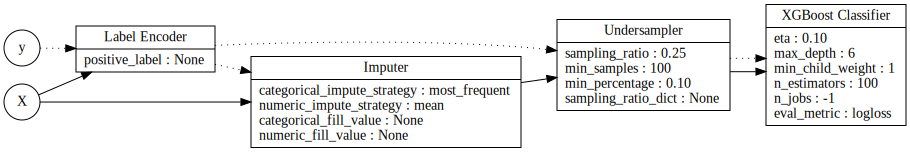

In [ ]:
best_pipeline.graph()

# Model Understanding: Determine Features  Importances

In [ ]:
best_pipeline.feature_importance

feature  importance
0                 last_pymnt_d    0.268108
1                    out_prncp    0.134817
2                      issue_d    0.065004
3                 sub_grade_B5    0.026160
4                     int_rate    0.024037
..                         ...         ...
76        home_ownership_OTHER    0.000000
77                pymnt_plan_y    0.000000
78                  recoveries    0.000000
79              acc_now_delinq    0.000000
80  collections_12_mths_ex_med    0.000000

[81 rows x 2 columns]

#  Model Understanding: Determine Permutation Importances

###  https://scikit-learn.org/stable/modules/permutation_importance.html

## Permutation feature importance is a model inspection technique that can be used for any fitted estimator when the data is tabular. This is especially useful for non-linear or opaque estimators. The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled 1. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature. This technique benefits from being model agnostic and can be calculated many times with different permutations of the feature.

##  Warning Features that are deemed of low importance for a bad model (low cross-validation score) could be very important for a good model. Therefore it is always important to evaluate the predictive power of a model using a held-out set (or better with cross-validation) prior to computing importances. Permutation importance does not reflect to the intrinsic predictive value of a feature by itself but how important this feature is for a particular model.

In [ ]:
from evalml.model_understanding import calculate_permutation_importance
calculate_permutation_importance(best_pipeline, X_holdout, y_holdout, 'log loss binary')

feature  importance
0                      out_prncp    0.215091
1                   last_pymnt_d    0.112570
2                        issue_d    0.027856
3             last_credit_pull_d    0.020447
4                    total_pymnt    0.005007
..                           ...         ...
76                     loan_amnt   -0.002146
77  verification_status_Verified   -0.002213
78                           dti   -0.003860
79                      int_rate   -0.008582
80               last_pymnt_amnt   -0.011312

[81 rows x 2 columns]

In [ ]:
from evalml.model_understanding import graph_permutation_importance
graph_permutation_importance(best_pipeline, X_holdout, y_holdout, 'log loss binary')

#  Model Understanding: Human Readable Interpretations

##  We can generate a more human-comprehensible understanding of either the feature or permutation importance by using readable_explanation(pipeline). This picks out a subset of features that have the highest impact on the output of the model, sorting them into either “heavily” or “somewhat” influential on the model. 

## These features are selected either by feature importance or permutation importance with a given objective. If there are any features that actively decrease the performance of the pipeline, this function highlights those and recommends removal.

## Note that permutation importance runs on the original input features, while feature importance runs on the features as they were passed in to the final estimator, having gone through a number of preprocessing steps. The two methods will highlight different features as being important, and feature names may vary as well.

## We can adjust the number of most important features visible with the max_features argument, or modify the minimum threshold for “importance” with min_importance_threshold. 

## However, these values will not affect any detrimental features displayed, as this function always displays all of them.

In [ ]:
from evalml.model_understanding import readable_explanation
readable_explanation(best_pipeline, X_holdout, y_holdout, objective="log loss binary", importance_method="permutation")

XGBoost Classifier: The prediction of TARGET as measured by log loss binary is heavily influenced by out_prncp and last_pymnt_d, and is somewhat influenced by issue_d and last_credit_pull_d.
The features sub_grade_B3, purpose_credit_card, home_ownership_OWN, purpose_debt_consolidation, sub_grade_C1, sub_grade_D4, delinq_2yrs, earliest_cr_line, sub_grade_A3, verification_status_Source Verified, initial_list_status_w, total_acc, tot_cur_bal, total_rec_int, loan_amnt, verification_status_Verified, dti, int_rate, and last_pymnt_amnt detracted from model performance. We suggest removing these features.


# XGBoost Classifier: The prediction of TARGET as measured by log loss binary is heavily influenced by last_pymnt_d and out_prncp, and is somewhat influenced by int_rate, issue_d, and total_pymnt.

# The features purpose_other, purpose_debt_consolidation, sub_grade_G1, sub_grade_B4, sub_grade_G3, total_rec_late_fee, home_ownership_RENT, sub_grade_E1, sub_grade_D1, tot_cur_bal, pub_rec, earliest_cr_line, inq_last_6mths, loan_amnt, sub_grade_C1, annual_inc, open_acc, total_acc, and verification_status_Verified detracted from model performance. We suggest removing these features.

In [ ]:
readable_explanation(best_pipeline, importance_method="feature")  # feature importance doesn't require X and y

XGBoost Classifier: The output is heavily influenced by last_pymnt_d, and is somewhat influenced by out_prncp and issue_d.


# Partial Dependence

## Partial dependence plots (PDP) show the dependence between the target response and a set of input features of interest, marginalizing over the values of all other input features (the ‘complement’ features). Intuitively, we can interpret the partial dependence as the expected target response as a function of the input features of interest.

### https://scikit-learn.org/stable/modules/partial_dependence.html

In [ ]:
from evalml.model_understanding.graphs import partial_dependence
partial_dependence(best_pipeline, X_holdout, features='issue_d', grid_resolution=5)

feature_values  partial_dependence  class_label
0       -2.557203            0.124231            1
1       -1.403721            0.124231            1
2       -0.250238            0.123695            1
3        0.903244            0.071934            1

In [ ]:
from evalml.model_understanding.graphs import graph_partial_dependence
graph_partial_dependence(best_pipeline, X_holdout, features='issue_d', grid_resolution=5)

In [ ]:
graph_partial_dependence(best_pipeline, X_holdout, features='int_rate')

# Confusion Matrix

## For binary or multiclass classification, we can view a confusion matrix of the classifier’s predictions. In the DataFrame output of confusion_matrix(), the column header represents the predicted labels while row header represents the actual labels.



### https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative

In [ ]:
from evalml.model_understanding.graphs import confusion_matrix
y_pred = best_pipeline.predict(X_holdout)
confusion_matrix(y_holdout, y_pred)

0         1
0  0.987709  0.012291
1  0.779070  0.220930

In [ ]:
from evalml.model_understanding.graphs import graph_confusion_matrix
y_pred = best_pipeline.predict(X_holdout)
graph_confusion_matrix(y_holdout, y_pred)

In [ ]:
y_holdout

402180    0
401214    0
227185    0
103428    0
218670    0
         ..
96867     0
277053    0
410021    0
79450     0
268261    0
Name: TARGET, Length: 66475, dtype: int64

# ROC Curves
### https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

In [ ]:
from evalml.model_understanding.graphs import graph_roc_curve
# get the predicted probabilities associated with the "malignant" label
y_pred_proba = pipeline_binary.predict_proba(X_holdout)[1]
graph_roc_curve(y_encoded, y_pred_proba)

In [ ]:
X_holdout

purpose_credit_card  ...  total_rec_late_fee
402180                    0  ...           -0.085487
401214                    0  ...           -0.085487
227185                    0  ...           -0.085487
103428                    0  ...           -0.085487
218670                    0  ...           -0.085487
...                     ...  ...                 ...
96867                     0  ...           -0.085487
277053                    0  ...           -0.085487
410021                    1  ...           -0.085487
79450                     1  ...           -0.085487
268261                    0  ...           -0.085487

[66475 rows x 81 columns]

In [ ]:
graph_partial_dependence(best_pipeline, X_holdout, features=('out_prncp', 'issue_d'), grid_resolution=5)

# https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

# Binary Objective Score vs. Threshold Graph

## Some binary classification objectives (objectives that have score_needs_proba set to False) are sensitive to a decision threshold. For those objectives, we can obtain and graph the scores for thresholds from zero to one, calculated at evenly-spaced intervals determined by steps.

In [ ]:
from evalml.model_understanding.graphs import binary_objective_vs_threshold
binary_objective_vs_threshold(best_pipeline, X_holdout, y_holdout, 'f1', steps=10)

threshold     score
0         0.0  0.002584
1         0.1  0.015097
2         0.2  0.017156
3         0.3  0.018736
4         0.4  0.020039
5         0.5  0.021537
6         0.6  0.021698
7         0.7  0.026434
8         0.8  0.029543
9         0.9  0.042697
10        1.0  0.000000

In [ ]:
from evalml.model_understanding.graphs import graph_binary_objective_vs_threshold
graph_binary_objective_vs_threshold(best_pipeline, X_holdout, y_holdout, 'f1', steps=100)

In [ ]:
from evalml.model_understanding.graphs import graph_prediction_vs_actual
y_pred = best_pipeline.predict(X_holdout)
graph_prediction_vs_actual(y_holdout, y_pred, outlier_threshold=50)


In [ ]:
pipeline_dt = BinaryClassificationPipeline(['Simple Imputer', 'Decision Tree Classifier'])
pipeline_dt.fit(X_train, y_train)

pipeline = BinaryClassificationPipeline(component_graph={'Simple Imputer': ['Simple Imputer', 'X', 'y'], 'Decision Tree Classifier': ['Decision Tree Classifier', 'Simple Imputer.x', 'y']}, parameters={'Simple Imputer':{'impute_strategy': 'most_frequent', 'fill_value': None}, 'Decision Tree Classifier':{'criterion': 'gini', 'max_features': 'auto', 'max_depth': 6, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0}}, random_seed=0)

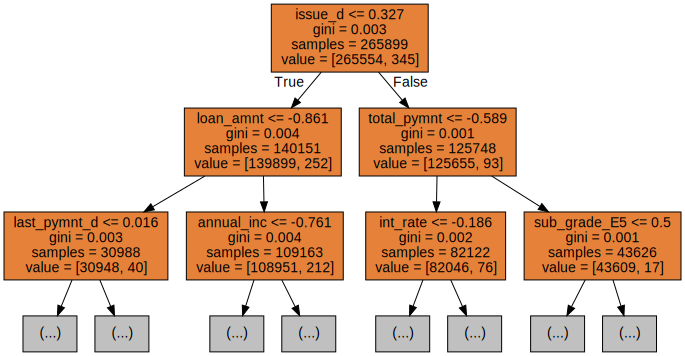

In [ ]:
from evalml.model_understanding.graphs import visualize_decision_tree

visualize_decision_tree(pipeline_dt.estimator, max_depth=2, rotate=False, filled=True, filepath=None)

In [ ]:
y_encoded = y_holdout.ww.map({1:1, 0:0})

In [ ]:
y_encoded.unique()

array([0, 1])

In [ ]:
y_pred_proba = best_pipeline.predict_proba(X_holdout)

#  Explain Predictions

## We can explain why the model made certain predictions with the explain_predictions function. This can use either the Shapley Additive Explanations (SHAP) algorithm or the Local Interpretable Model-agnostic Explanations (LIME) algorithm to identify the top features that explain the predicted value.

## This function can explain both classification and regression models - all you need to do is provide the pipeline, the input features, and a list of rows corresponding to the indices of the input features you want to explain. The function will return a table that you can print summarizing the top 3 most positive and negative contributing features to the predicted value.

## Top 10 Features

###  https://evalml.alteryx.com/en/stable/autoapi/evalml/model_understanding/prediction_explanations/explainers/index.html#evalml.model_understanding.prediction_explanations.explainers.explain_predictions

In [ ]:
Parameters
pipeline (PipelineBase) – Fitted pipeline whose predictions we want to explain with SHAP or LIME.

input_features (pd.DataFrame) – Dataframe of input data to evaluate the pipeline on.

y (pd.Series) – Labels for the input data.

indices_to_explain (list[int]) – List of integer indices to explain.

top_k_features (int) – How many of the highest/lowest contributing feature to include in the table for each data point. Default is 3.

include_explainer_values (bool) – Whether explainer (SHAP or LIME) values should be included in the table. Default is False.

include_expected_value (bool) – Whether the expected value should be included in the table. Default is False.

output_format (str) – Either “text”, “dict”, or “dataframe”. Default is “text”.

training_data (pd.DataFrame, np.ndarray) – Data the pipeline was trained on. Required and only used for time series pipelines.

training_target (pd.Series, np.ndarray) – Targets used to train the pipeline. Required and only used for time series pipelines.

algorithm (str) – Algorithm to use while generating top contributing features, one of “shap” or “lime”. Defaults to “shap”.

In [ ]:
from evalml.model_understanding.prediction_explanations import explain_predictions

table = explain_predictions(pipeline=best_pipeline, input_features=X_holdout, y=None, indices_to_explain=[3],
                           top_k_features=10, include_explainer_values=True)
print(table)


XGBoost Classifier w/ Label Encoder + Imputer + Undersampler

{'Label Encoder': {'positive_label': None}, 'Imputer': {'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Undersampler': {'sampling_ratio': 0.25, 'min_samples': 100, 'min_percentage': 0.1, 'sampling_ratio_dict': None}, 'XGBoost Classifier': {'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'n_jobs': -1, 'eval_metric': 'logloss'}}

	1 of 1

		    Feature Name        Feature Value   Contribution to Prediction   SHAP Value
		    last_pymnt_d            -0.71                   +                   0.61   
		       issue_d              -0.25                   +                   0.19   
		    sub_grade_C1            1.00                    +                   0.16   
		initial_list_status_w       1.00                    -                  -0.12   
		    total_rec_int           -0.77                   -             

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:108: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



In [ ]:
from evalml.model_understanding.prediction_explanations import explain_predictions

report = explain_predictions(pipeline=best_pipeline,
                             input_features=X_holdout, y=y_holdout, indices_to_explain=[0, 4, 9], include_explainer_values=True,
                             output_format='text')
print(report)

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:108: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:108: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



XGBoost Classifier w/ Label Encoder + Imputer + Undersampler

{'Label Encoder': {'positive_label': None}, 'Imputer': {'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Undersampler': {'sampling_ratio': 0.25, 'min_samples': 100, 'min_percentage': 0.1, 'sampling_ratio_dict': None}, 'XGBoost Classifier': {'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'n_jobs': -1, 'eval_metric': 'logloss'}}

	1 of 3

		Feature Name   Feature Value   Contribution to Prediction   SHAP Value
		last_pymnt_d       -0.71                   ++                  1.57   
		 out_prncp         0.20                    +                   0.73   
		  issue_d          0.90                    -                  -0.77   


	2 of 3

		 Feature Name     Feature Value   Contribution to Prediction   SHAP Value
		 last_pymnt_d         -0.71                   +                   0.62   
		last_pymnt_amnt      

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:108: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



In [ ]:
from evalml.model_understanding.prediction_explanations import explain_predictions

table = explain_predictions(pipeline=best_pipeline, input_features=X_holdout, y=None, indices_to_explain=[3],
                           top_k_features=20, include_explainer_values=True, algorithm="lime")
print(table)

XGBoost Classifier w/ Label Encoder + Imputer + Undersampler

{'Label Encoder': {'positive_label': None}, 'Imputer': {'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Undersampler': {'sampling_ratio': 0.25, 'min_samples': 100, 'min_percentage': 0.1, 'sampling_ratio_dict': None}, 'XGBoost Classifier': {'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'n_jobs': -1, 'eval_metric': 'logloss'}}

	1 of 1

		     Feature Name        Feature Value   Contribution to Prediction   LIME Value
		      out_prncp              -1.08                   +                   0.08   
		       int_rate              -0.14                   +                   0.06   
		    total_rec_int            -0.77                   +                   0.01   
		      revol_bal              -0.12                   +                   0.01   
		     sub_grade_F1            0.00                    +       

In [ ]:
from evalml.model_understanding.prediction_explanations import explain_predictions

report = explain_predictions(pipeline=best_pipeline,
                             input_features=X_holdout, y=None, indices_to_explain=[0, 4, 9], include_explainer_values=True,
                             output_format='text', algorithm="lime")
print(report)

XGBoost Classifier w/ Label Encoder + Imputer + Undersampler

{'Label Encoder': {'positive_label': None}, 'Imputer': {'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Undersampler': {'sampling_ratio': 0.25, 'min_samples': 100, 'min_percentage': 0.1, 'sampling_ratio_dict': None}, 'XGBoost Classifier': {'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'n_jobs': -1, 'eval_metric': 'logloss'}}

	1 of 3

		Feature Name   Feature Value   Contribution to Prediction   LIME Value
		last_pymnt_d       -0.71                   ++                  0.19   
		  int_rate         1.26                    -                  -0.06   
		 out_prncp         0.20                    -                  -0.06   


	2 of 3

		Feature Name   Feature Value   Contribution to Prediction   LIME Value
		 out_prncp         -1.08                   +                   0.07   
		  int_rate         0.12    

In [ ]:
from evalml.model_understanding.prediction_explanations import explain_predictions_best_worst

shap_report = explain_predictions_best_worst(pipeline=best_pipeline, input_features=X_holdout, y_true=y_holdout,
                                        include_explainer_values=True, top_k_features=20, num_to_explain=2)

print(shap_report)

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:108: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:108: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



XGBoost Classifier w/ Label Encoder + Imputer + Undersampler

{'Label Encoder': {'positive_label': None}, 'Imputer': {'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Undersampler': {'sampling_ratio': 0.25, 'min_samples': 100, 'min_percentage': 0.1, 'sampling_ratio_dict': None}, 'XGBoost Classifier': {'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'n_jobs': -1, 'eval_metric': 'logloss'}}

	Best 1 of 2

		Predicted Probabilities: [0: 1.0, 1: 0.0]
		Predicted Value: 0
		Target Value: 0
		Cross Entropy: 0.0
		Index ID: 372055

		      Feature Name         Feature Value       Contribution to        SHAP Value
		                                                  Prediction                    
		    last_pymnt_amnt            -0.36                  +                  0.18   
		      total_pymnt              -0.48                  +                  0.07   
		        open_ac

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:108: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:108: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



In [ ]:
lime_report = explain_predictions_best_worst(pipeline=best_pipeline, input_features=X_holdout,
                                             y_true=y_holdout, include_explainer_values=True,
                                             top_k_features=20, num_to_explain=2, algorithm="lime")

print(lime_report)

XGBoost Classifier w/ Label Encoder + Imputer + Undersampler

{'Label Encoder': {'positive_label': None}, 'Imputer': {'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Undersampler': {'sampling_ratio': 0.25, 'min_samples': 100, 'min_percentage': 0.1, 'sampling_ratio_dict': None}, 'XGBoost Classifier': {'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'n_jobs': -1, 'eval_metric': 'logloss'}}

	Best 1 of 2

		Predicted Probabilities: [0: 1.0, 1: 0.0]
		Predicted Value: 0
		Target Value: 0
		Cross Entropy: 0.0
		Index ID: 372055

		      Feature Name         Feature Value       Contribution to        LIME Value
		                                                  Prediction                    
		       out_prncp               0.22                   +                  0.06   
		        int_rate               -1.09                  +                  0.05   
		          dti  

In [ ]:
report = explain_predictions_best_worst(pipeline=best_pipeline, input_features=X_holdout, y_true=y_holdout,
                                        num_to_explain=1, top_k_features=20,
                                        include_explainer_values=True, output_format="dataframe")
report

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:108: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:108: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



feature_names  feature_values  ... rank  prefix
0                       last_pymnt_amnt       -0.362451  ...    1    best
1                           total_pymnt       -0.482564  ...    1    best
2                              open_acc        0.873372  ...    1    best
3                 initial_list_status_w        0.000000  ...    1    best
4                             out_prncp        0.221510  ...    1    best
5                    last_credit_pull_d        0.366134  ...    1    best
6                             loan_amnt       -0.151742  ...    1    best
7   verification_status_Source Verified        0.000000  ...    1    best
8          verification_status_Verified        0.000000  ...    1    best
9                      earliest_cr_line       -0.463461  ...    1    best
10                            revol_bal       -0.600060  ...    1    best
11                   total_rec_late_fee       -0.085487  ...    1    best
12                                  dti       -0.244315  ...    1    best
13                           annual_inc       -0.270759  ...    1    best
14                            total_acc       -0.618339  ...    1    best
15                           revol_util       -1.140267  ...    1    best
16                          tot_cur_bal        0.076466  ...    1    best
17                              issue_d        0.903244  ...    1    best
18                             int_rate       -1.092168  ...    1    best
19                         last_pymnt_d        0.744570  ...    1    best
20                         last_pymnt_d       -0.711613  ...    1   worst
21                            out_prncp       -0.436866  ...    1   worst
22                   total_rec_late_fee        7.603485  ...    1   worst
23                          total_pymnt       -0.530164  ...    1   worst
24                           annual_inc       -0.833823  ...    1   worst
25                              issue_d       -0.250238  ...    1   worst
26                          tot_cur_bal       -0.801058  ...    1   worst
27                             int_rate        0.942870  ...    1   worst
28                           revol_util        1.770859  ...    1   worst
29                            revol_bal        0.184774  ...    1   worst
30                         sub_grade_D4        1.000000  ...    1   worst
31                         sub_grade_B5        0.000000  ...    1   worst
32                                  dti        0.617071  ...    1   worst
33                      last_pymnt_amnt       -0.340338  ...    1   worst
34                        total_rec_int       -0.282732  ...    1   worst
35                       inq_last_6mths        0.321440  ...    1   worst
36                     earliest_cr_line       -0.675412  ...    1   worst
37                   last_credit_pull_d        0.366134  ...    1   worst
38                   home_ownership_OWN        1.000000  ...    1   worst
39                            total_acc       -1.549994  ...    1   worst

[40 rows x 14 columns]

In [ ]:
report[report['prefix']  == 'best']

feature_names  feature_values  ... rank  prefix
0                       last_pymnt_amnt       -0.362451  ...    1    best
1                           total_pymnt       -0.482564  ...    1    best
2                              open_acc        0.873372  ...    1    best
3                 initial_list_status_w        0.000000  ...    1    best
4                             out_prncp        0.221510  ...    1    best
5                    last_credit_pull_d        0.366134  ...    1    best
6                             loan_amnt       -0.151742  ...    1    best
7   verification_status_Source Verified        0.000000  ...    1    best
8          verification_status_Verified        0.000000  ...    1    best
9                      earliest_cr_line       -0.463461  ...    1    best
10                            revol_bal       -0.600060  ...    1    best
11                   total_rec_late_fee       -0.085487  ...    1    best
12                                  dti       -0.244315  ...    1    best
13                           annual_inc       -0.270759  ...    1    best
14                            total_acc       -0.618339  ...    1    best
15                           revol_util       -1.140267  ...    1    best
16                          tot_cur_bal        0.076466  ...    1    best
17                              issue_d        0.903244  ...    1    best
18                             int_rate       -1.092168  ...    1    best
19                         last_pymnt_d        0.744570  ...    1    best

[20 rows x 14 columns]

In [ ]:
report[report['prefix']  == 'best'].feature_names

0                         last_pymnt_amnt
1                             total_pymnt
2                                open_acc
3                   initial_list_status_w
4                               out_prncp
5                      last_credit_pull_d
6                               loan_amnt
7     verification_status_Source Verified
8            verification_status_Verified
9                        earliest_cr_line
10                              revol_bal
11                     total_rec_late_fee
12                                    dti
13                             annual_inc
14                              total_acc
15                             revol_util
16                            tot_cur_bal
17                                issue_d
18                               int_rate
19                           last_pymnt_d
Name: feature_names, dtype: object

In [ ]:
names = list(report[report['prefix']  == 'best'].feature_names)
names

['last_pymnt_amnt',
 'total_pymnt',
 'open_acc',
 'initial_list_status_w',
 'out_prncp',
 'last_credit_pull_d',
 'loan_amnt',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'earliest_cr_line',
 'revol_bal',
 'total_rec_late_fee',
 'dti',
 'annual_inc',
 'total_acc',
 'revol_util',
 'tot_cur_bal',
 'issue_d',
 'int_rate',
 'last_pymnt_d']

#  Force Plots
Force plots can be generated to predict single or multiple rows for binary, multiclass and regression problem types. These use the SHAP algorithm. Here’s an example of predicting a single row on a binary classification dataset. The force plots show the predictive power of each of the features in making the negative (“Class: 0”) prediction and the positive (“Class: 1”) prediction.

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:108: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



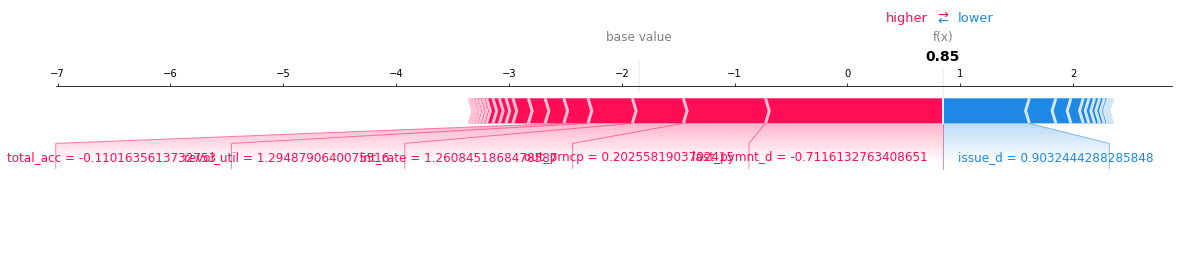

Class: 1


None

In [ ]:
import shap

from evalml.model_understanding.force_plots import graph_force_plot

rows_to_explain = [0] # Should be a list of integer indices of the rows to explain.

results = graph_force_plot(best_pipeline, rows_to_explain=rows_to_explain,
                           training_data=X_holdout, y=y_holdout, matplotlib=True)

for result in results:
    for cls in result:
        print("Class:", cls)
        display(result[cls]["plot"])

In [ ]:
from evalml.model_understanding import find_confusion_matrix_per_thresholds

df, objective_thresholds = find_confusion_matrix_per_thresholds(best_pipeline, X, y, n_bins=10)
df

true_pos_count  ...                              data_in_bins
0.100000               2  ...   [305322, 189146, 389526, 103950, 44701]
0.200000               1  ...     [359996, 5005, 42097, 359121, 404382]
0.300000               4  ...    [114142, 359517, 325120, 9095, 356166]
0.400000               7  ...  [240462, 402141, 300960, 288871, 401915]
0.500000               7  ...  [369127, 375546, 102335, 385179, 272892]
0.600000              17  ...   [327883, 211872, 204035, 274765, 95971]
0.700000              13  ...   [58511, 182330, 292395, 280035, 114831]
0.800000              61  ...     [82356, 147836, 91469, 15215, 194489]
0.898047             138  ...  [145677, 401187, 308045, 351924, 172095]
0.900000               2  ...  [114745, 181818, 103485, 148329, 316594]
1.000000             179  ...      [2044, 96127, 136042, 214871, 98427]

[11 rows x 7 columns]

In [ ]:
single_prediction_report = explain_predictions(pipeline=best_pipeline, input_features=X_holdout,
                                               indices_to_explain=[3],
                                               y=y_holdout, top_k_features=20, include_explainer_values=True,
                                               output_format="dataframe")
single_prediction_report

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:108: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



feature_names  feature_values  ... class_name  prediction_number
0                   last_pymnt_d       -0.711613  ...          1                  0
1                        issue_d       -0.250238  ...          1                  0
2                   sub_grade_C1        1.000000  ...          1                  0
3               earliest_cr_line        0.172391  ...          1                  0
4                      revol_bal       -0.119514  ...          1                  0
5                 inq_last_6mths       -0.701592  ...          1                  0
6                      total_acc        0.990883  ...          1                  0
7                           term       -0.696868  ...          1                  0
8                   sub_grade_B5        0.000000  ...          1                  0
9             last_credit_pull_d        0.366134  ...          1                  0
10            total_rec_late_fee       -0.085487  ...          1                  0
11                           dti       -0.362165  ...          1                  0
12  verification_status_Verified        0.000000  ...          1                  0
13         initial_list_status_w        1.000000  ...          1                  0
14                 total_rec_int       -0.769940  ...          1                  0
15                    revol_util        0.308921  ...          1                  0
16                   total_pymnt        0.251894  ...          1                  0
17                      int_rate       -0.135973  ...          1                  0
18               last_pymnt_amnt        1.461909  ...          1                  0
19                     out_prncp       -1.076743  ...          1                  0

[20 rows x 6 columns]

#  Cost-Benefit Matrix

## Although the confusion matrix is an incredibly useful visual for understanding our model, each prediction that is correctly or incorrectly classified is treated equally. For example, for detecting breast cancer, the confusion matrix does not take into consideration that it could be much more costly to incorrectly classify a malignant tumor as benign than it is to incorrectly classify a benign tumor as malignant. 

## This is where the cost-benefit matrix shines: it uses the cost of each of the four possible outcomes to weigh each outcome differently. By scoring using the cost-benefit matrix, we can measure the score of the model by a concrete unit that is more closely related to the goal of the model. In the below example, we will show how the cost-benefit matrix objective can be used, and how it can give us better real-world impact when compared to using other standard machine learning objectives.



### In this example, let’s say that correctly identifying customers who will default (true positive case) will give us a net profit of $400, because it allows us to intervene, incentivize the customer to stay, and sign a new contract. 

### Incorrectly classifying customers who were not going to default as customers who will default (false positive case) will cost $100 to represent the marketing and effort used to try to retain the user. 

###  Not identifying customers who will default (false negative case) will cost us $200 to represent the lost in revenue from losing a customer. 

### Finally, correctly identifying customers who will not default (true negative case) will not cost us anything ($0), as nothing needs to be done for that customer.

In [ ]:
from evalml.objectives import CostBenefitMatrix
cost_benefit_matrix = CostBenefitMatrix(true_positive=400,
                                        true_negative=0,
                                        false_positive=-100,
                                        false_negative=-200)

In [ ]:
cost_benefit_matrix

In [ ]:
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary', objective=cost_benefit_matrix,
                      max_iterations=5, verbose=True)
automl.search()

cbm_pipeline = automl.best_pipeline

Generating pipelines to search over...
8 pipelines ready for search.

*****************************
* Beginning pipeline search *
*****************************

Optimizing for Cost Benefit Matrix. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 5 pipelines. 
Allowed model families: linear_model, linear_model, xgboost, lightgbm, catboost, random_forest, decision_tree, extra_trees



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean Cost Benefit Matrix: -0.267

*****************************
* Evaluating Batch Number 1 *
*****************************

Elastic Net Classifier w/ Label Encoder + Imputer + Undersampler + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Cost Benefit Matrix: -0.271
Logistic Regression Classifier w/ Label Encoder + Imputer + Undersampler + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Cost Benefit Matrix: -0.274
XGBoost Classifier w/ Label Encoder + Imputer + Undersampler:
	Starting cross validation
	Finished cross validation - mean Cost Benefit Matrix: -0.272
LightGBM Classifier w/ Label Encoder + Imputer + Undersampler:
	Starting cross validation
	Finished cross validation - mean Cost Benefit Matrix: -0.281

Search finished after 01:05            


In [ ]:
from evalml import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary', objective='log loss binary',
                      max_iterations=5, verbose=True)
automl.search()

ll_pipeline = automl.best_pipeline
ll_pipeline.score(X_holdout, y_holdout, ['log loss binary'])

Generating pipelines to search over...
8 pipelines ready for search.

*****************************
* Beginning pipeline search *
*****************************

Optimizing for Log Loss Binary. 
Lower score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 5 pipelines. 
Allowed model families: linear_model, linear_model, xgboost, lightgbm, catboost, random_forest, decision_tree, extra_trees



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.046

*****************************
* Evaluating Batch Number 1 *
*****************************

Elastic Net Classifier w/ Label Encoder + Imputer + Undersampler + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.012
Logistic Regression Classifier w/ Label Encoder + Imputer + Undersampler + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.010
XGBoost Classifier w/ Label Encoder + Imputer + Undersampler:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.008
LightGBM Classifier w/ Label Encoder + Imputer + Undersampler:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.019

Search finished after 01:05            
Best pipeline: XGBoost Cl

OrderedDict([('Log Loss Binary', 0.15983090171867823)])

In [ ]:
automl.__dict__

In [ ]:
ll_pipeline_score = ll_pipeline.score(X_holdout, y_holdout, [cost_benefit_matrix])
print (ll_pipeline_score)

OrderedDict([('Cost Benefit Matrix', -1.4998119593832269)])


In [ ]:
cbm_pipeline_score = cbm_pipeline.score(X_holdout, y_holdout, [cost_benefit_matrix])
print (cbm_pipeline_score)

OrderedDict([('Cost Benefit Matrix', -0.2587438886799549)])


In [ ]:
# Calculate total profit across all customers using pipeline optimized for CostBenefitMatrix
total_profit_cbm = cbm_pipeline_score['Cost Benefit Matrix'] * len(X)
print (total_profit_cbm)

-85999.74125611133


In [ ]:
# Calculate total profit across all customers using pipeline optimized for Log Loss
total_profit_ll = ll_pipeline_score['Cost Benefit Matrix'] * len(X)
print (total_profit_ll)

-498498.50018804066


In [ ]:
# Calculate difference in profit made using both pipelines
profit_diff = total_profit_cbm - total_profit_ll
print (profit_diff)

412498.75893192936


In [ ]:
from evalml.model_understanding.graphs import graph_confusion_matrix

# pipeline trained with log loss
y_pred = ll_pipeline.predict(X_holdout)
graph_confusion_matrix(y_holdout, y_pred)

In [ ]:
# pipeline trained with cost-benefit matrix
y_pred = cbm_pipeline.predict(X_holdout)
graph_confusion_matrix(y_holdout, y_pred)

In [ ]:
single_prediction_report

feature_names  feature_values  ... class_name  prediction_number
0                   last_pymnt_d       -0.711613  ...          1                  0
1                        issue_d       -0.250238  ...          1                  0
2                   sub_grade_C1        1.000000  ...          1                  0
3               earliest_cr_line        0.172391  ...          1                  0
4                      revol_bal       -0.119514  ...          1                  0
5                 inq_last_6mths       -0.701592  ...          1                  0
6                      total_acc        0.990883  ...          1                  0
7                           term       -0.696868  ...          1                  0
8                   sub_grade_B5        0.000000  ...          1                  0
9             last_credit_pull_d        0.366134  ...          1                  0
10            total_rec_late_fee       -0.085487  ...          1                  0
11                           dti       -0.362165  ...          1                  0
12  verification_status_Verified        0.000000  ...          1                  0
13         initial_list_status_w        1.000000  ...          1                  0
14                 total_rec_int       -0.769940  ...          1                  0
15                    revol_util        0.308921  ...          1                  0
16                   total_pymnt        0.251894  ...          1                  0
17                      int_rate       -0.135973  ...          1                  0
18               last_pymnt_amnt        1.461909  ...          1                  0
19                     out_prncp       -1.076743  ...          1                  0

[20 rows x 6 columns]

In [ ]:
single_prediction_report.feature_names

0                     last_pymnt_d
1                          issue_d
2                     sub_grade_C1
3                 earliest_cr_line
4                        revol_bal
5                   inq_last_6mths
6                        total_acc
7                             term
8                     sub_grade_B5
9               last_credit_pull_d
10              total_rec_late_fee
11                             dti
12    verification_status_Verified
13           initial_list_status_w
14                   total_rec_int
15                      revol_util
16                     total_pymnt
17                        int_rate
18                 last_pymnt_amnt
19                       out_prncp
Name: feature_names, dtype: object

In [ ]:
features = list(single_prediction_report.feature_names)
features

['last_pymnt_d',
 'issue_d',
 'sub_grade_C1',
 'earliest_cr_line',
 'revol_bal',
 'inq_last_6mths',
 'total_acc',
 'term',
 'sub_grade_B5',
 'last_credit_pull_d',
 'total_rec_late_fee',
 'dti',
 'verification_status_Verified',
 'initial_list_status_w',
 'total_rec_int',
 'revol_util',
 'total_pymnt',
 'int_rate',
 'last_pymnt_amnt',
 'out_prncp']

In [ ]:
machine_df

purpose_credit_card  ...  TARGET
0                         0  ...       0
1                         0  ...       0
2                         0  ...       0
3                         0  ...       0
4                         0  ...       0
...                     ...  ...     ...
415462                    0  ...       0
415463                    0  ...       0
415464                    1  ...       0
415465                    1  ...       0
415466                    0  ...       0

[415467 rows x 82 columns]

In [ ]:
machine_df.columns

Index(['purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5',
       'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4',
       'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3',
       'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2',
       'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1',
       'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5',
       'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4',
       'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3',
       'sub_grade_G4', 'sub_grade_G5', 'application_type_JOINT',
       'verif

In [ ]:
diff = set(machine_df.columns) - set(features)
diff

{'TARGET',
 'acc_now_delinq',
 'annual_inc',
 'application_type_JOINT',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'loan_amnt',
 'open_acc',
 'pub_rec',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_other',
 'purpose_renewable_energy',
 'purpose_small_business',
 'purpose_vacation',
 'purpose_wedding',
 'pymnt_plan_y',
 'recoveries',
 'sub_grade_A2',
 'sub_grade_A3',
 'sub_grade_A4',
 'sub_grade_A5',
 'sub_grade_B1',
 'sub_grade_B2',
 'sub_grade_B3',
 'sub_grade_B4',
 'sub_grade_C2',
 'sub_grade_C3',
 'sub_grade_C4',
 'sub_grade_C5',
 'sub_grade_D1',
 'sub_grade_D2',
 'sub_grade_D3',
 'sub_grade_D4',
 'sub_grade_D5',
 'sub_grade_E1',
 'sub_grade_E2',
 'sub_grade_E3',
 'sub_grade_E4',
 'sub_grade_E5',
 'sub_grade_F1',
 'sub_grade_F2',
 'sub_grade_F3',
 'sub_

In [ ]:
machine  = machine_df[features]
machine =  machine.join(target)
machine

last_pymnt_d   issue_d  ...  out_prncp  TARGET
0           0.744570 -1.403721  ...   0.045859       0
1           0.744570 -1.403721  ...  -0.598675       0
2          -0.711613 -1.403721  ...  -1.076743       0
3           0.744570 -1.403721  ...  -0.466161       0
4           0.744570 -1.403721  ...  -0.574155       0
...              ...       ...  ...        ...     ...
415462      0.744570  0.903244  ...   0.182712       0
415463      0.744570  0.903244  ...  -0.490489       0
415464      0.744570  0.903244  ...  -0.128078       0
415465      0.744570  0.903244  ...  -0.147131       0
415466      0.744570  0.903244  ...   0.820603       0

[415467 rows x 21 columns]

In [ ]:
machine_X  = machine.drop('TARGET', axis=1)
machine_X

last_pymnt_d   issue_d  ...  last_pymnt_amnt  out_prncp
0           0.744570 -1.403721  ...        -0.282507   0.045859
1           0.744570 -1.403721  ...        -0.382304  -0.598675
2          -0.711613 -1.403721  ...        -0.430422  -1.076743
3           0.744570 -1.403721  ...        -0.361486  -0.466161
4           0.744570 -1.403721  ...        -0.376500  -0.574155
...              ...       ...  ...              ...        ...
415462      0.744570  0.903244  ...        -0.393052   0.182712
415463      0.744570  0.903244  ...        -0.407056  -0.490489
415464      0.744570  0.903244  ...        -0.376500  -0.128078
415465      0.744570  0.903244  ...        -0.375324  -0.147131
415466      0.744570  0.903244  ...        -0.299576   0.820603

[415467 rows x 20 columns]

In [ ]:
y =  machine.TARGET

In [ ]:
# split data into training and testing data sets
# holdout is also known as testing data
X_train_v2, X_holdout_v2, y_train_v2, y_holdout_v2 = split_data(machine_X, y, problem_type='binary', test_size=0.2)

In [ ]:
# use autoML to search for the best model
automl = AutoMLSearch(X_train = X_train_v2, y_train = y_train_v2,
                      problem_type='binary',
                      max_batches=1,
                      optimize_thresholds=True)

In [ ]:
automl.search()

In [ ]:
optimal_pipe = automl.best_pipeline
optimal_pipe

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'Undersampler': ['Undersampler', 'Imputer.x', 'Label Encoder.y'], 'XGBoost Classifier': ['XGBoost Classifier', 'Undersampler.x', 'Undersampler.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Undersampler':{'sampling_ratio': 0.25, 'min_samples': 100, 'min_percentage': 0.1, 'sampling_ratio_dict': None}, 'XGBoost Classifier':{'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'n_jobs': -1, 'eval_metric': 'logloss'}}, random_seed=0)

In [ ]:
optimal_pipe.feature_importance

feature  importance
0                   last_pymnt_d    0.413462
1                      out_prncp    0.127263
2                        issue_d    0.105809
3             last_credit_pull_d    0.038539
4                       int_rate    0.037787
5                    total_pymnt    0.029707
6                      revol_bal    0.028192
7               earliest_cr_line    0.027062
8                last_pymnt_amnt    0.026525
9                  total_rec_int    0.025629
10                     total_acc    0.022767
11  verification_status_Verified    0.022318
12                           dti    0.021901
13                inq_last_6mths    0.021157
14                    revol_util    0.021072
15            total_rec_late_fee    0.018001
16         initial_list_status_w    0.011452
17                          term    0.001357
18                  sub_grade_C1    0.000000
19                  sub_grade_B5    0.000000

In [ ]:
import shap

from evalml.model_understanding.force_plots import graph_force_plot

rows_to_explain = [0] # Should be a list of integer indices of the rows to explain.

results = graph_force_plot(optimal_pipe, rows_to_explain=rows_to_explain,
                           training_data=X_holdout_v2, y=y_holdout_v2, matplotlib=False)

for result in results:
    for cls in result:
        print("Class:", cls)
        display(result[cls]["plot"])

Class: 1


/usr/local/lib/python3.7/dist-packages/xgboost/core.py:108: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



In [ ]:
prod_list =  list(optimal_pipe.feature_importance.feature)
prod_list

['last_pymnt_d',
 'out_prncp',
 'issue_d',
 'last_credit_pull_d',
 'int_rate',
 'total_pymnt',
 'revol_bal',
 'earliest_cr_line',
 'last_pymnt_amnt',
 'total_rec_int',
 'total_acc',
 'verification_status_Verified',
 'dti',
 'inq_last_6mths',
 'revol_util',
 'total_rec_late_fee',
 'initial_list_status_w',
 'term',
 'sub_grade_C1',
 'sub_grade_B5']

In [ ]:
prod_list = ['last_pymnt_d',
 'out_prncp',
 'issue_d',
 'last_credit_pull_d',
 'int_rate',
 'total_pymnt',
 'revol_bal',
 'earliest_cr_line',
 'last_pymnt_amnt',
 'total_rec_int',
 'total_acc',
 'verification_status_Verified',
 'dti',
 'inq_last_6mths',
 'revol_util',
 'total_rec_late_fee',
 'initial_list_status_w',
 'term']

In [ ]:
machine_prod = machine_df[prod_list]
machine_prod = machine_prod.join(target)
machine_prod

last_pymnt_d  out_prncp  ...      term  TARGET
0           0.744570   0.045859  ... -0.696868       0
1           0.744570  -0.598675  ... -0.696868       0
2          -0.711613  -1.076743  ... -0.696868       0
3           0.744570  -0.466161  ... -0.696868       0
4           0.744570  -0.574155  ... -0.696868       0
...              ...        ...  ...       ...     ...
415462      0.744570   0.182712  ...  1.434992       0
415463      0.744570  -0.490489  ... -0.696868       0
415464      0.744570  -0.128078  ... -0.696868       0
415465      0.744570  -0.147131  ... -0.696868       0
415466      0.744570   0.820603  ... -0.696868       0

[415467 rows x 19 columns]

In [ ]:
machine_prod.to_csv('/content/drive/MyDrive/lending_club_machine_prod.csv')

In [ ]:
df_v9 =  pd.read_csv('/content/drive/MyDrive/lending_club_v9.csv')
df_v9

purpose  last_credit_pull_d  ...  delinq_2yrs total_rec_late_fee
0       debt_consolidation                2015  ...          0.0                0.0
1       debt_consolidation                2016  ...          0.0                0.0
2       debt_consolidation                2016  ...          0.0                0.0
3       debt_consolidation                2016  ...          0.0                0.0
4       debt_consolidation                2016  ...          0.0                0.0
...                    ...                 ...  ...          ...                ...
415462      major_purchase                2015  ...          0.0                0.0
415463  debt_consolidation                2016  ...          0.0                0.0
415464         credit_card                2016  ...          1.0                0.0
415465         credit_card                2016  ...          0.0                0.0
415466    home_improvement                2016  ...          0.0                0.0

[415467 rows x 34 columns]

In [ ]:
machine_prod.columns

Index(['last_pymnt_d', 'out_prncp', 'issue_d', 'last_credit_pull_d',
       'int_rate', 'total_pymnt', 'revol_bal', 'earliest_cr_line',
       'last_pymnt_amnt', 'total_rec_int', 'total_acc',
       'verification_status_Verified', 'dti', 'inq_last_6mths', 'revol_util',
       'total_rec_late_fee', 'initial_list_status_w', 'term'],
      dtype='object')

In [ ]:
data = df_v9[['last_pymnt_d', 'out_prncp', 'issue_d', 'last_credit_pull_d',
       'int_rate', 'total_pymnt', 'revol_bal', 'earliest_cr_line',
       'last_pymnt_amnt', 'total_rec_int', 'total_acc',
       'dti', 'inq_last_6mths', 'revol_util',
       'total_rec_late_fee', 'term']]

In [ ]:
data

last_pymnt_d  out_prncp  issue_d  ...  revol_util  total_rec_late_fee  term
0               2016   10018.90     2013  ...        61.2                 0.0    36
1               2016    4266.62     2013  ...        21.6                 0.0    36
2               2015       0.00     2013  ...        68.8                 0.0    36
3               2016    5449.27     2013  ...        74.2                 0.0    36
4               2016    4485.45     2013  ...        67.0                 0.0    36
...              ...        ...      ...  ...         ...                 ...   ...
415462          2016   11240.27     2015  ...         3.2                 0.0    60
415463          2016    5232.15     2015  ...        43.9                 0.0    36
415464          2016    8466.56     2015  ...        69.7                 0.0    36
415465          2016    8296.52     2015  ...        65.0                 0.0    36
415466          2016   16933.26     2015  ...        84.5                 0.0    36

[415467 rows x 16 columns]

In [ ]:
dropped = ['verification_status_Verified', 'initial_list_status_w']

In [ ]:
data_from_machine_prod = machine_prod[dropped]
data_from_machine_prod

verification_status_Verified  initial_list_status_w
0                                  1                      1
1                                  0                      1
2                                  0                      1
3                                  0                      1
4                                  0                      0
...                              ...                    ...
415462                             1                      1
415463                             1                      0
415464                             1                      0
415465                             1                      0
415466                             1                      0

[415467 rows x 2 columns]

In [ ]:
data['verification_status_Verified'] = data_from_machine_prod.verification_status_Verified

In [ ]:
data['initial_list_status_w'] = data_from_machine_prod.initial_list_status_w

In [ ]:
data

last_pymnt_d  ...  initial_list_status_w
0               2016  ...                      1
1               2016  ...                      1
2               2015  ...                      1
3               2016  ...                      1
4               2016  ...                      0
...              ...  ...                    ...
415462          2016  ...                      1
415463          2016  ...                      0
415464          2016  ...                      0
415465          2016  ...                      0
415466          2016  ...                      0

[415467 rows x 18 columns]

In [ ]:
data = data.join(target)

In [ ]:
data

last_pymnt_d  out_prncp  ...  initial_list_status_w  TARGET
0               2016   10018.90  ...                      1       0
1               2016    4266.62  ...                      1       0
2               2015       0.00  ...                      1       0
3               2016    5449.27  ...                      1       0
4               2016    4485.45  ...                      0       0
...              ...        ...  ...                    ...     ...
415462          2016   11240.27  ...                      1       0
415463          2016    5232.15  ...                      0       0
415464          2016    8466.56  ...                      0       0
415465          2016    8296.52  ...                      0       0
415466          2016   16933.26  ...                      0       0

[415467 rows x 19 columns]

In [ ]:
data.to_csv('/content/drive/MyDrive/lending_club_pure.csv')

In [ ]:
experiment.end()